# Challenge I

Dans le premier challenge, nous devons vérifier que l'algorithme de Métropolis fonctionne.

In [5]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from matplotlib import animation
import matplotlib.cm as cm
from JSAnimation.IPython_display import display_animation

Pour commencer, nous établissons les valeurs pour $\alpha$ et celles du spin sp. Nous reprenons aussi la matrice de spins up et down donnée dans la leçon.

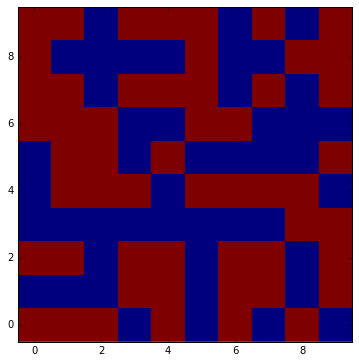

In [6]:
nx=10
ny=10

# Non-dimensional coupling constant J/(kb*T)
alpha = 0.1

# Initial spins at each site
sp = numpy.load('initial_state.npy')

pyplot.figure(figsize=(6,6))
pyplot.imshow(sp,interpolation="none",origin='lower')

Reprise d'une part de la fonction (energy_at_site) permetant de calculer l'énergie de la configuration des états de spin pour des coordonnées (x,y) données et, d'autre part, de l'algorithme (metropolis_at_site) de changement de l'état selon celui de plus basse énergie.

In [7]:
def energy_at_site(sp,alpha,sigma,ix,iy):
  
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy

In [8]:
def metropolis_at_site(sp,alpha,ix,iy):

    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)
    
    # Flip the site with Metropolis probability
    # Condition is always satisifed if dE < 0
    if (numpy.random.random_sample()<numpy.exp(-(energy_if_site_flipped \
                                               -energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]

Ici bas, nous effectuons l'algorithme pour différentes positions, dans l'ordre: (5,4) et (1,4).

L'état en (5,4) possède 3 voisins down et 1 up. Il est lui même en état up. Nous nous attendons donc à ce qu'il change d'état.

In [9]:
print(energy_at_site(sp,alpha,1,4,5))

0.2


In [10]:
print(energy_at_site(sp,alpha,-1,4,5))

-0.2


$$
\frac{p({\rm up})}{p({\rm downs})} = e^{-\Delta E}=e^{0.4}\approx 1.49
$$

In [11]:
NMC = 100000
states = numpy.empty(NMC+1)
states[0]=sp[4,5]

for n in range(0,NMC):
    metropolis_at_site(sp,alpha,4,5)
    states[n]=sp[4,5]
    
ups = numpy.extract(states==-1, states).size
downs = NMC - ups
print(ups/downs)

1.491342584518797


Les valeur du ratio calculé par la formule fournie et celle déduite de l'algorithme concordent bien pour l'état en (5,4).

Nous recommencons la procédure pour l'état en (1,4) dont les voisins sont à moitiés up & down.

In [12]:
print(energy_at_site(sp,alpha,1,4,1))

-0.0


In [13]:
print(energy_at_site(sp,alpha,-1,4,1))

0.0


In [83]:
NMC = 100000
states = numpy.empty(NMC+1)
states[0]=sp[4,1]

for n in range(0,NMC):
    metropolis_at_site(sp,alpha,4,1)
    states[n]=sp[4,1]
    
ups = numpy.extract(states==1, states).size
downs = NMC - ups
print(ups/downs)

1.0


$$
\frac{p({\rm up})}{p({\rm downs})} = e^{-\Delta E}=e^{0}=1
$$

# Challenge II

Pour commencer, nous choisissons différentes valeurs pour $\alpha$ de manière à observer, sur le graphique situé plus bas, où se situera la transition de phase.

In [24]:
nx = 100
ny = 100

sp = numpy.ones([nx,ny])

In [25]:
def ising_model_metropolis(sp, NMC, nx, ny, alpha):

    states = numpy.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=numpy.random.randint(0,nx-1)
            iy=numpy.random.randint(0,ny-1)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()
    return states

In [38]:
NMC=100
alpha=0.2

states_0_2 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [27]:
NMC=100
sp = numpy.ones([nx,ny])
alpha=0.3
states_0_3 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [28]:
NMC=100
sp = numpy.ones([nx,ny])
alpha=0.4
states_0_4 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [29]:
NMC=100
sp = numpy.ones([nx,ny])
alpha=0.5
states_0_5 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [35]:
NMC=100
sp = numpy.ones([nx,ny])
alpha=0.6
states_0_6 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

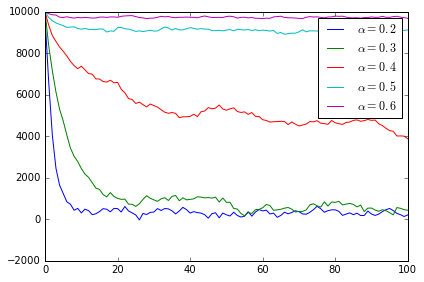

In [39]:
pyplot.figure()
pyplot.plot(states_0_2.sum(axis=(1,2)),label=r'$\alpha=0.2$')
pyplot.plot(states_0_3.sum(axis=(1,2)),label=r'$\alpha=0.3$')
pyplot.plot(states_0_4.sum(axis=(1,2)),label=r'$\alpha=0.4$')
pyplot.plot(states_0_5.sum(axis=(1,2)),label=r'$\alpha=0.5$')
pyplot.plot(states_0_6.sum(axis=(1,2)),label=r'$\alpha=0.6$')
pyplot.legend()
pyplot.tight_layout()

Nous estimons la valeur critique de $\alpha$ quelque part entre 0,3 et 0,5.

Il est difficile d'être plus précis. Nous savons que le système est relativement stable pour des valeurs de $\alpha$ situées aux alentours de 0,5 - 0,6 pour lesquelles il y a en majorité des états up. De l'autre coté, pour des $\alpha$ de 0,2 - 0,3, le système varie fortement avant d'atteindre la stabilité. Il y a à peu près le même nombre d'états up que de down.

Entre ces deux cas se trouvent la valeurs critique.

Maintenant, nous recommencons l'analyse en aillant au préalable modifier les conditions aux bords. Nous avons choisis d'imposer une matrice aléatoire sauf sur les lignes et colonnes extrèmes (où l'état est down).

Les états aléatoires sont déterminés à l'aide de la fonction np.random.choice nous donnant une liste aléatoire de -1 et de +1 équiprobables.

In [41]:
sp = numpy.ones([nx,ny])
for i in range(nx):
    sp[i]=numpy.random.choice(3,100,p=[0.5,0,0.5])-1
    sp[i,0]=-1
    sp[i,-1]=-1
sp[0]=-1
sp[-1]=-1
sp1 = sp.copy()

In [42]:
NMC=100
alpha=0.2
states_0_2 = ising_model_metropolis(sp1, NMC, nx, ny, alpha)

In [43]:
NMC=100
alpha=0.7
sp1 = sp.copy()
states_0_7 = ising_model_metropolis(sp1, NMC, nx, ny, alpha)

In [44]:
NMC=100
alpha=0.9
sp1 = sp.copy()
states_0_9 = ising_model_metropolis(sp1, NMC, nx, ny, alpha)

In [45]:
NMC=100
alpha=0.5
sp1 = sp.copy()
states_0_5 = ising_model_metropolis(sp1, NMC, nx, ny, alpha)


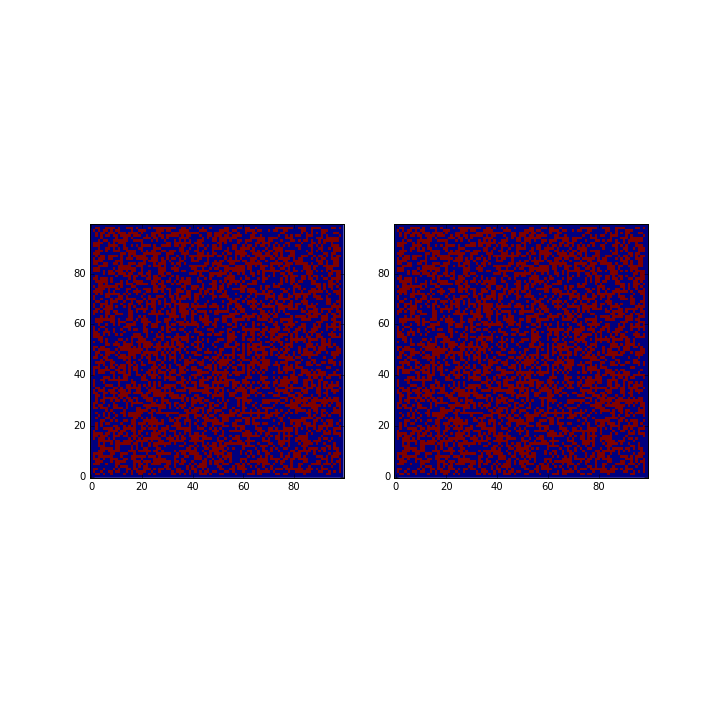
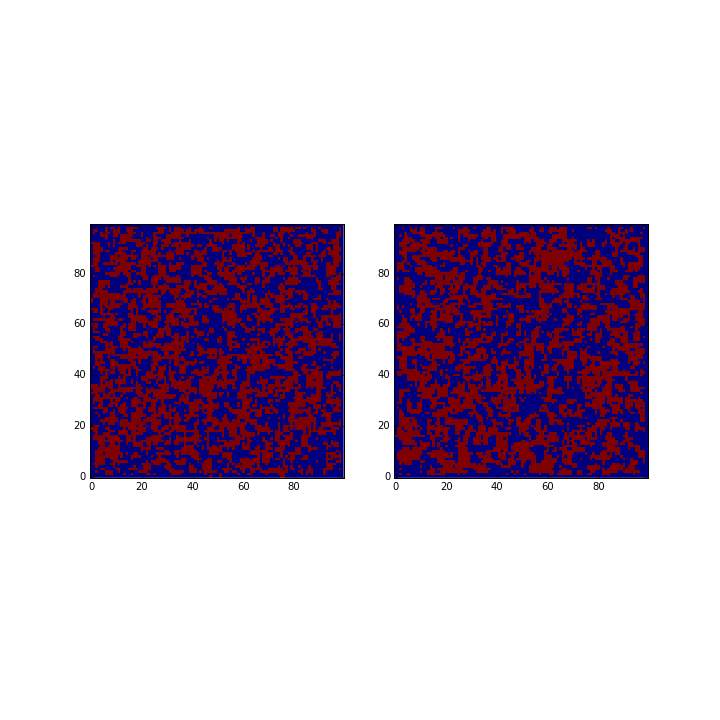
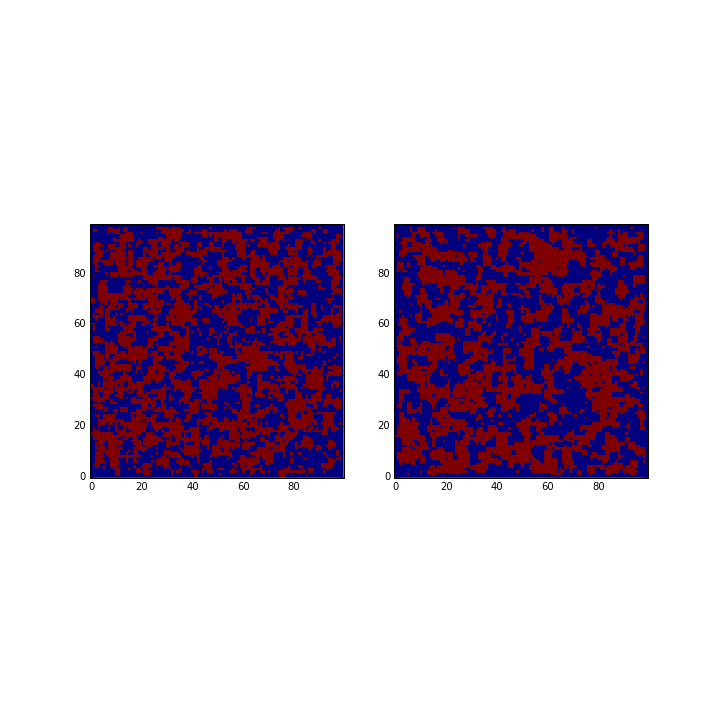
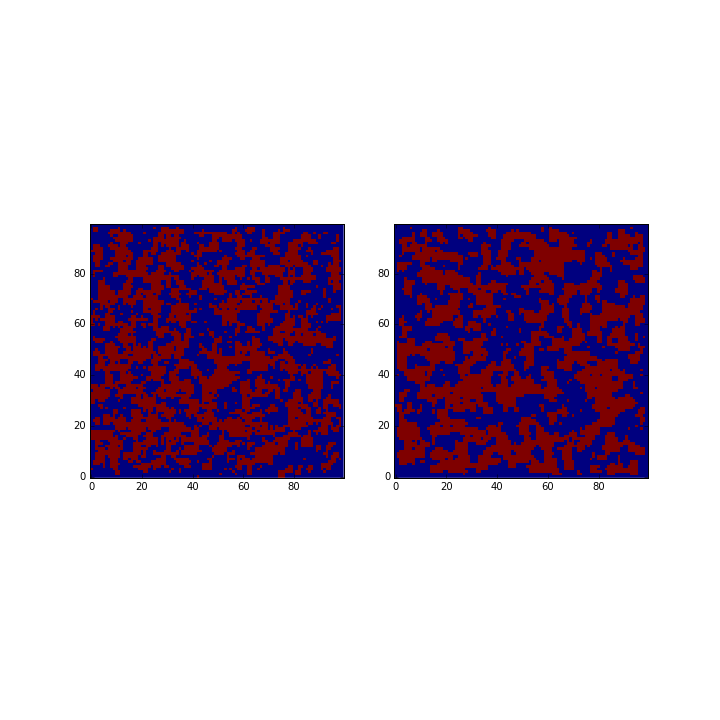
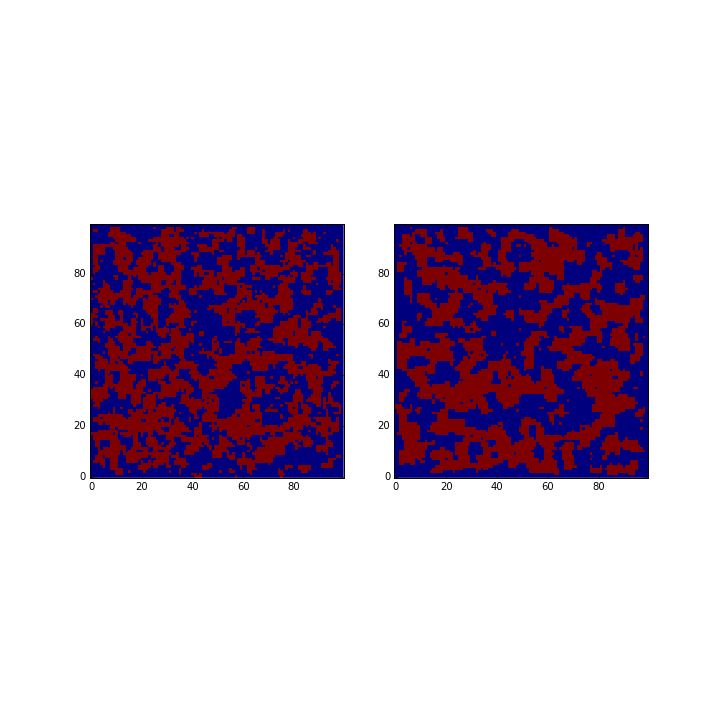
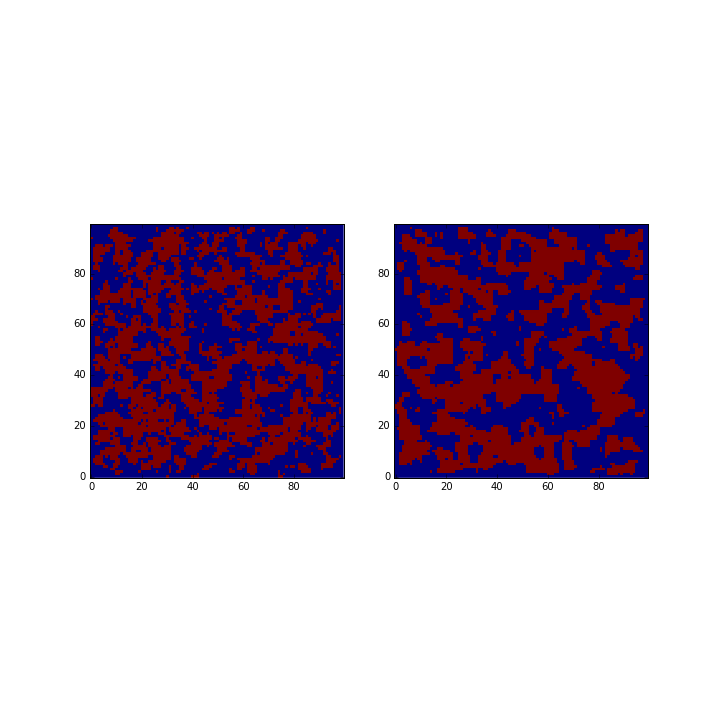
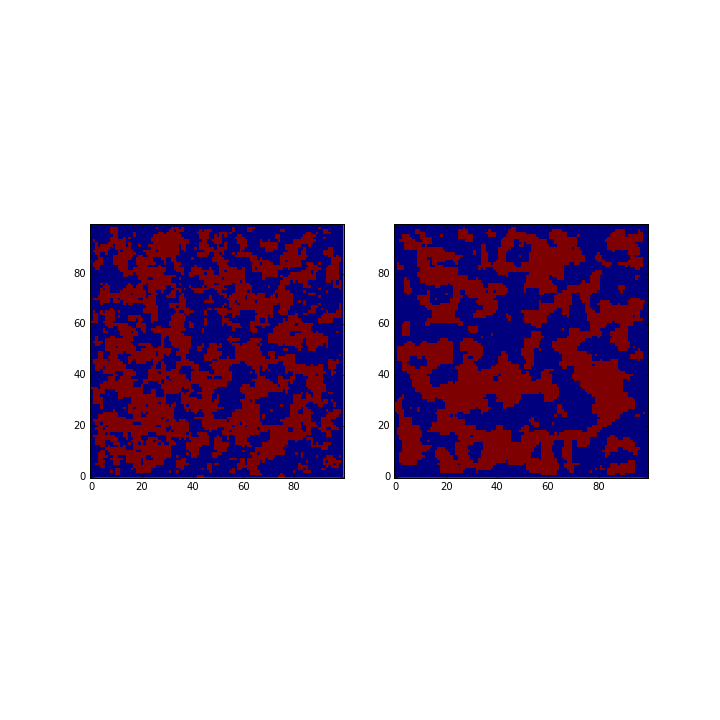
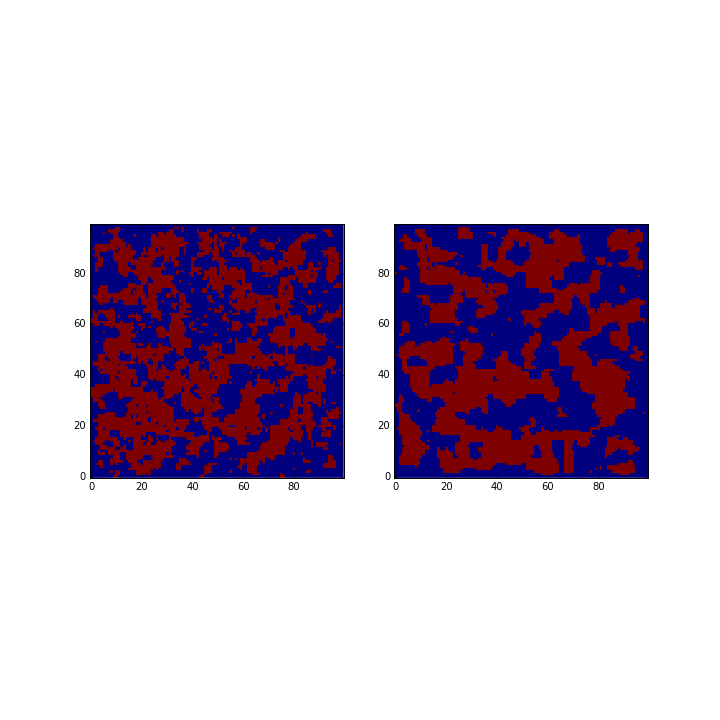
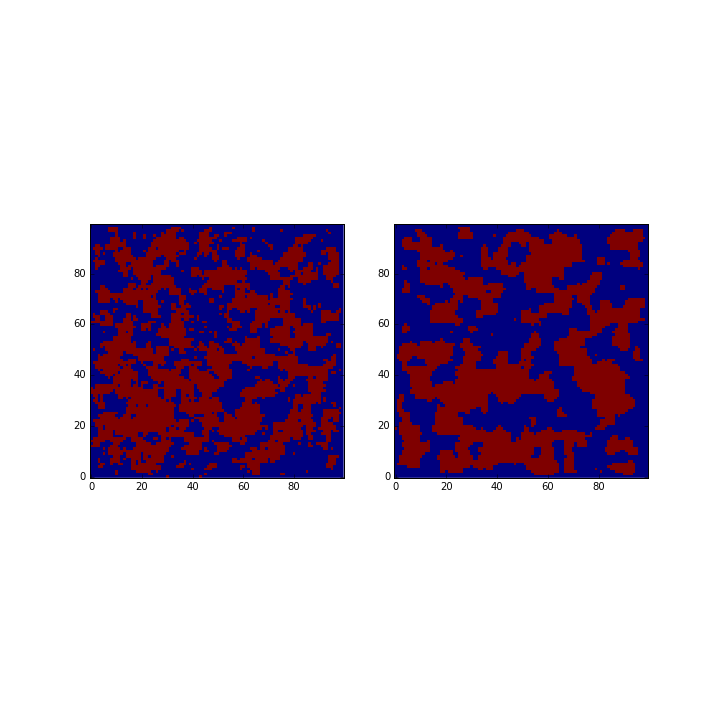
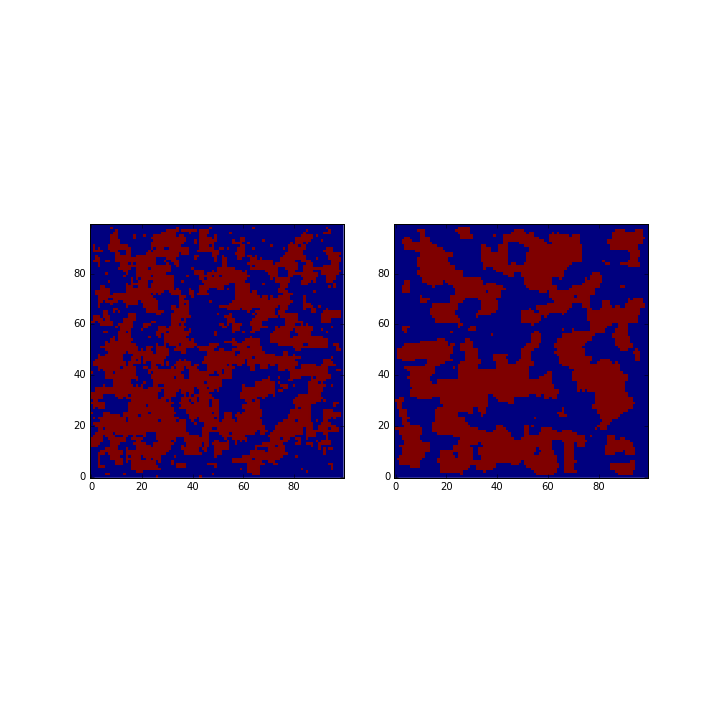
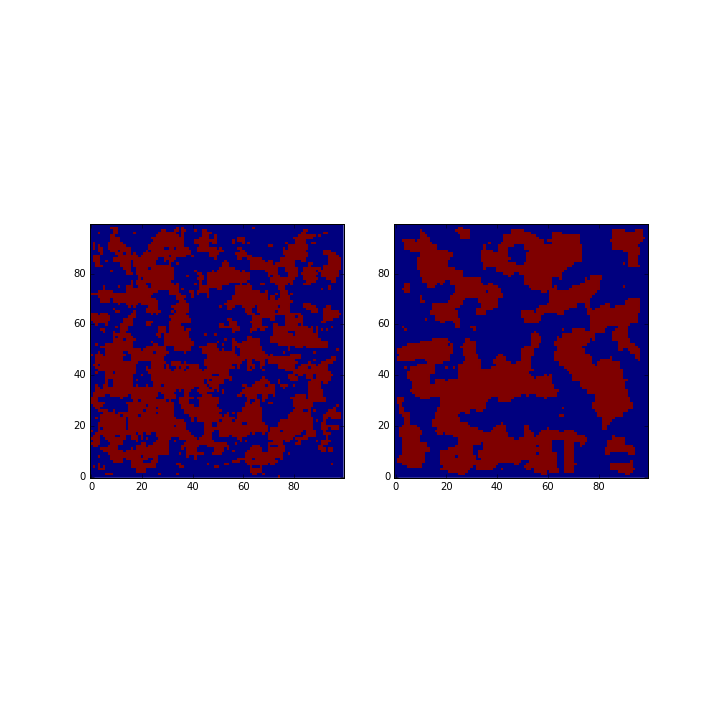
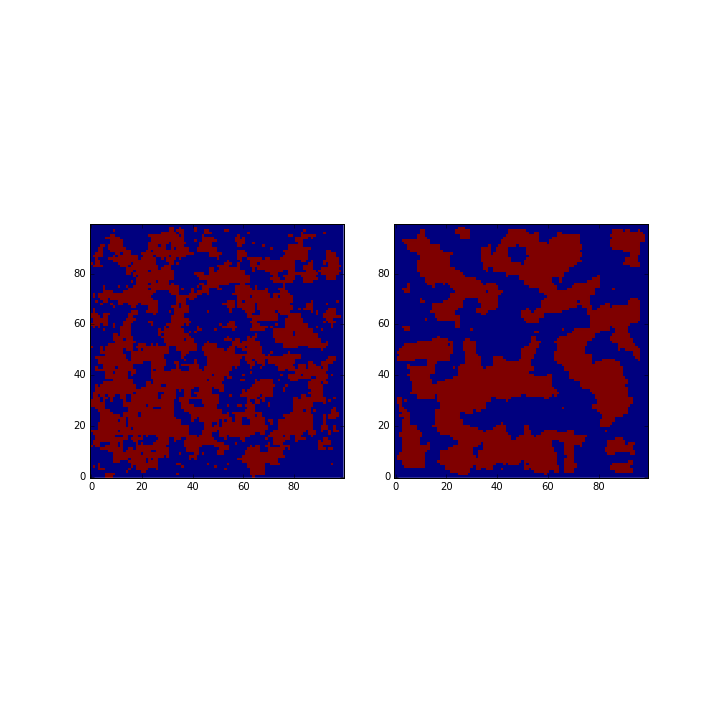
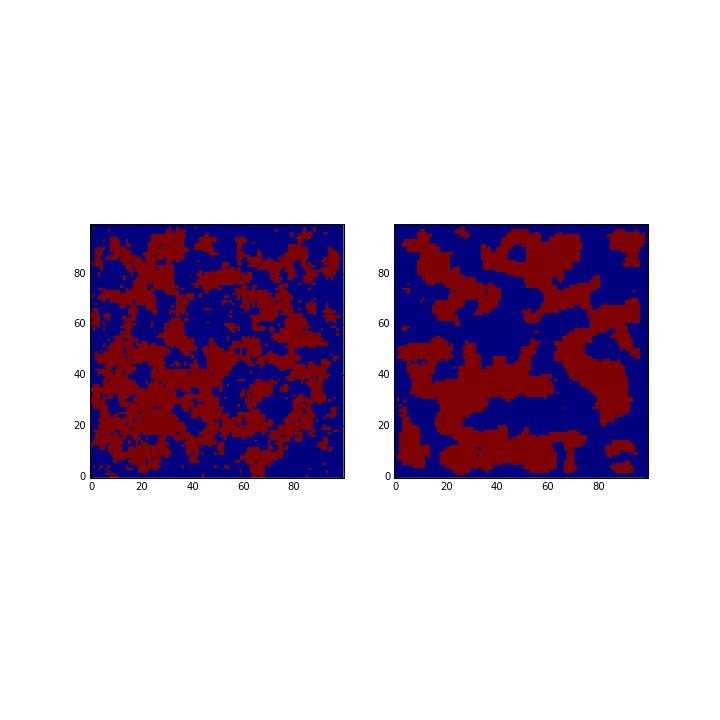
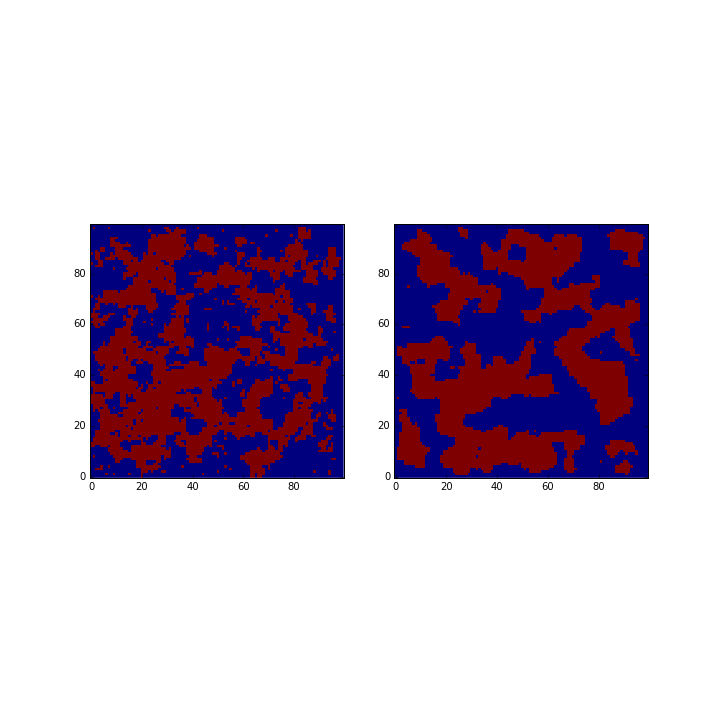
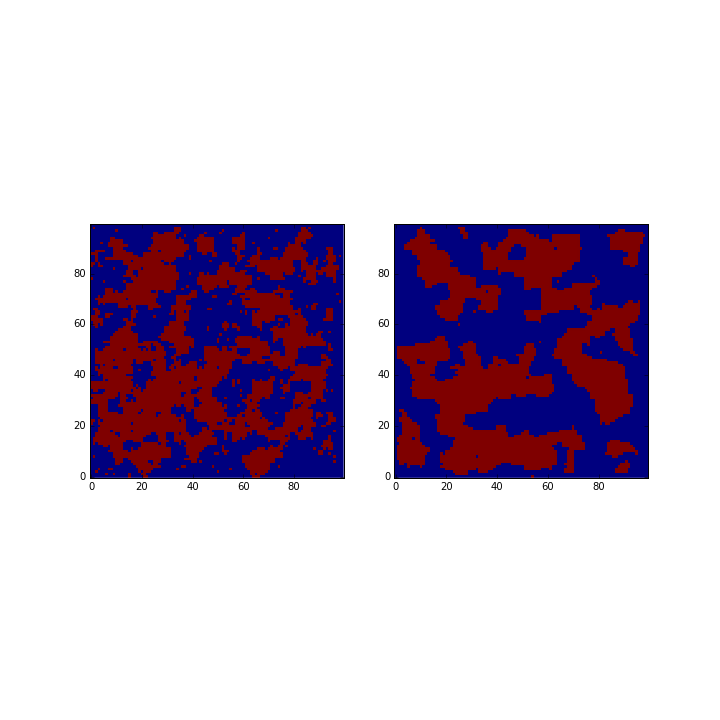
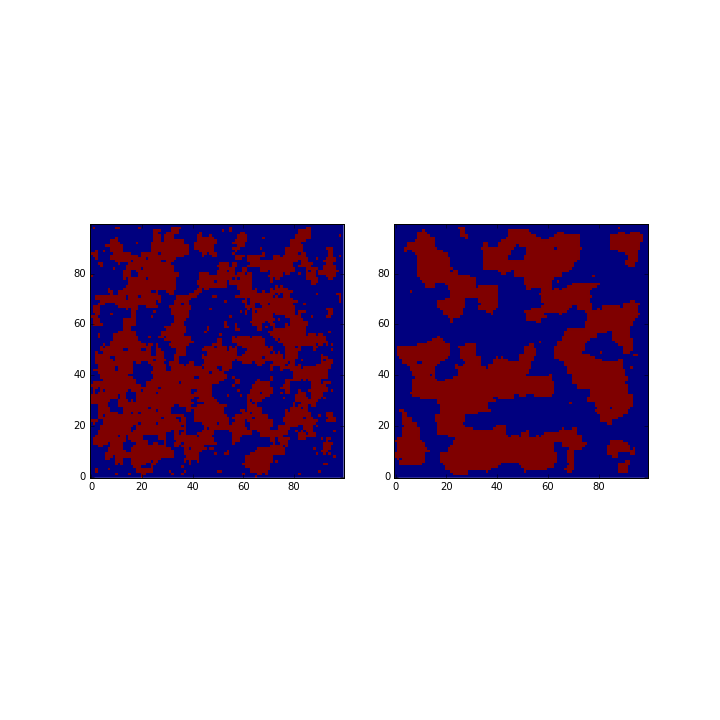
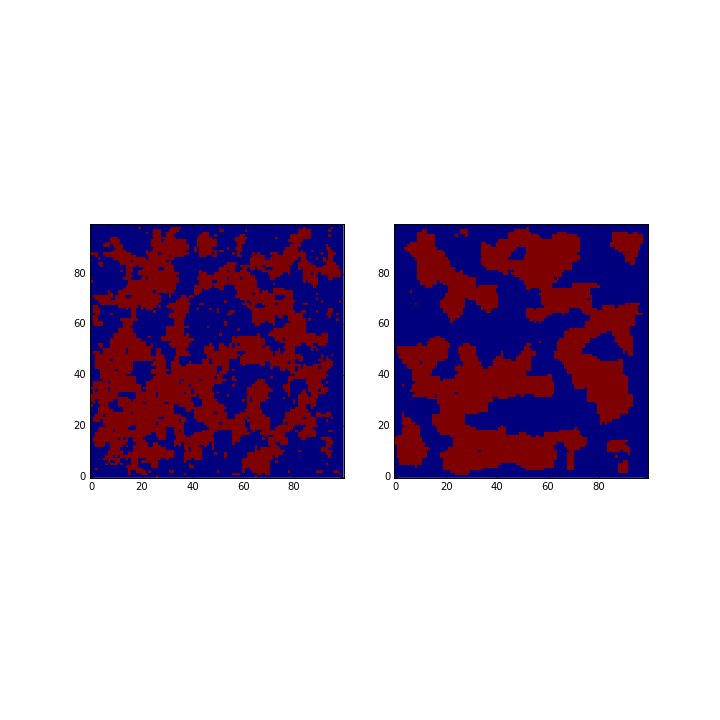
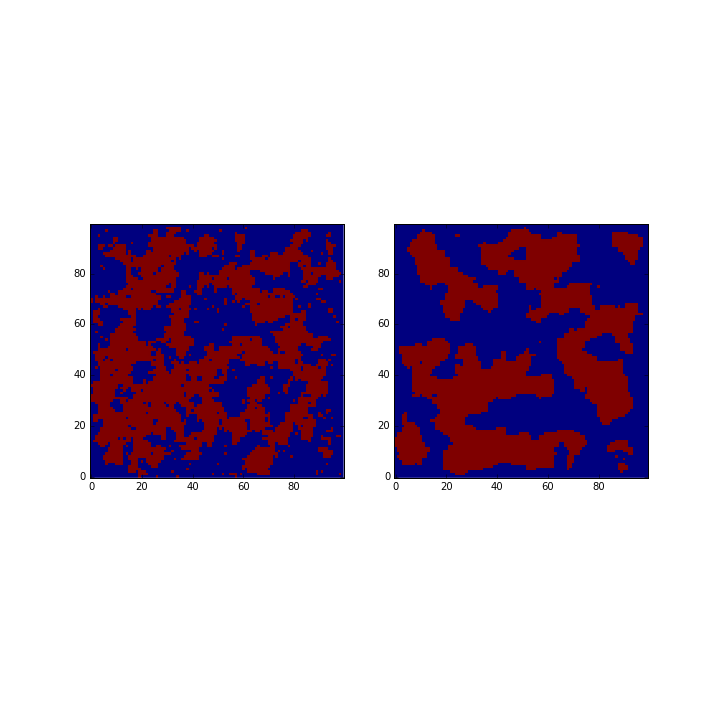
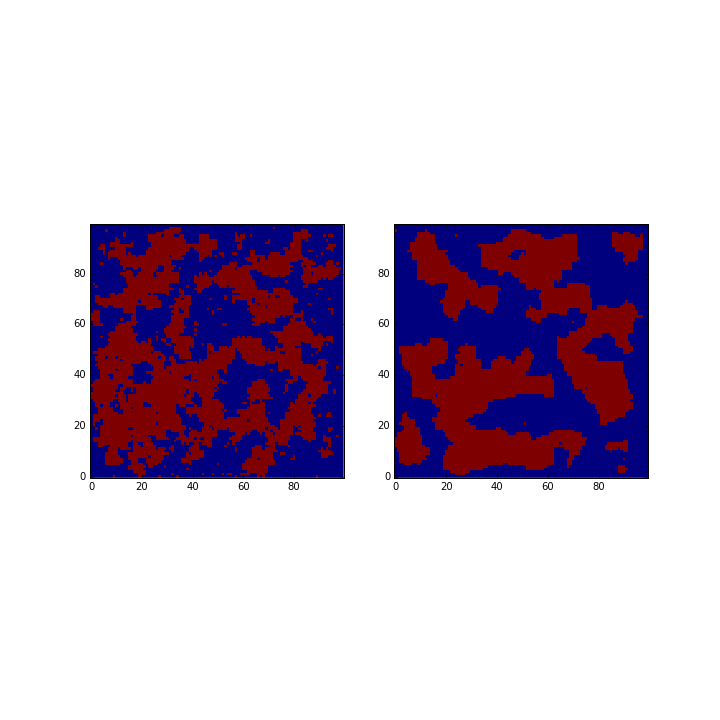
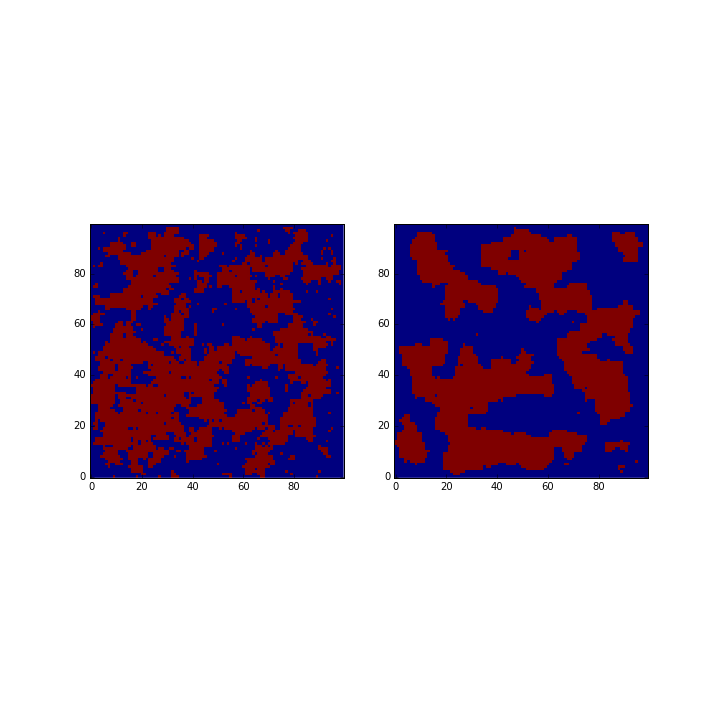
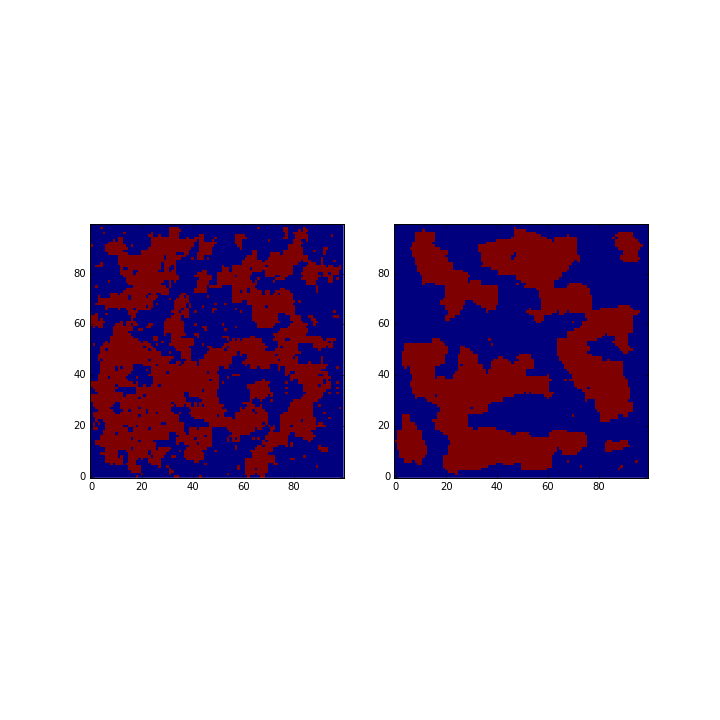
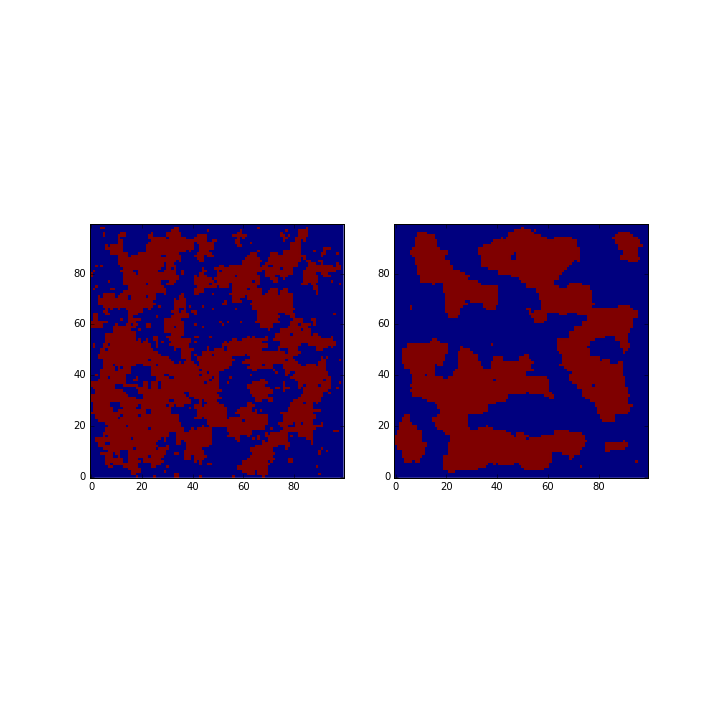
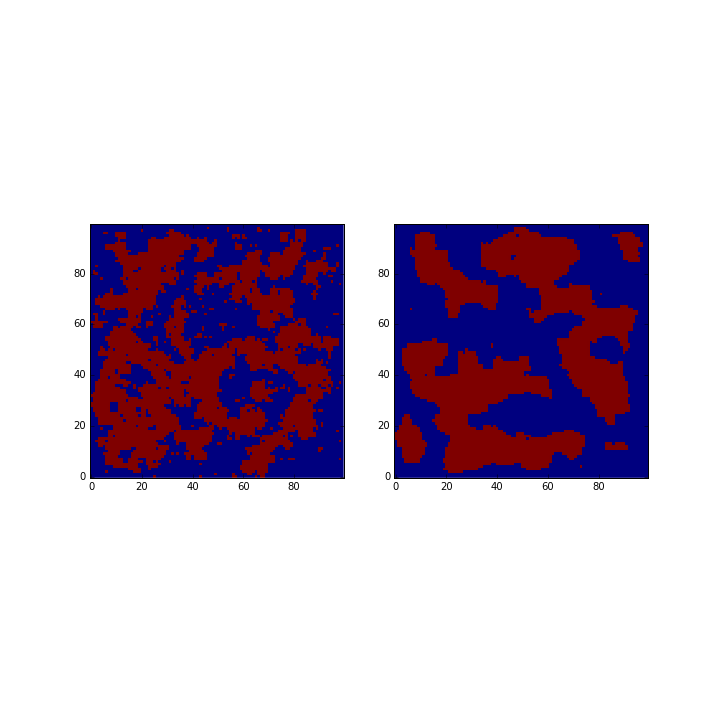
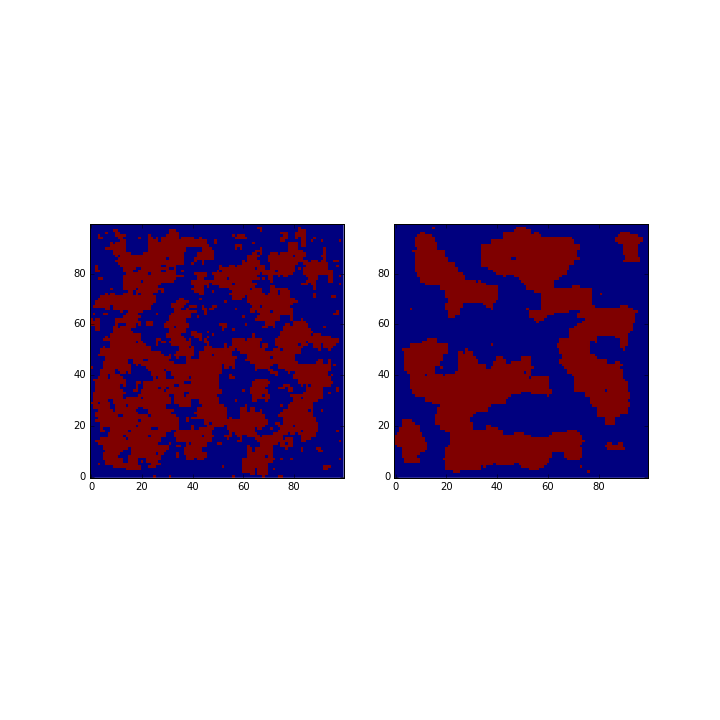
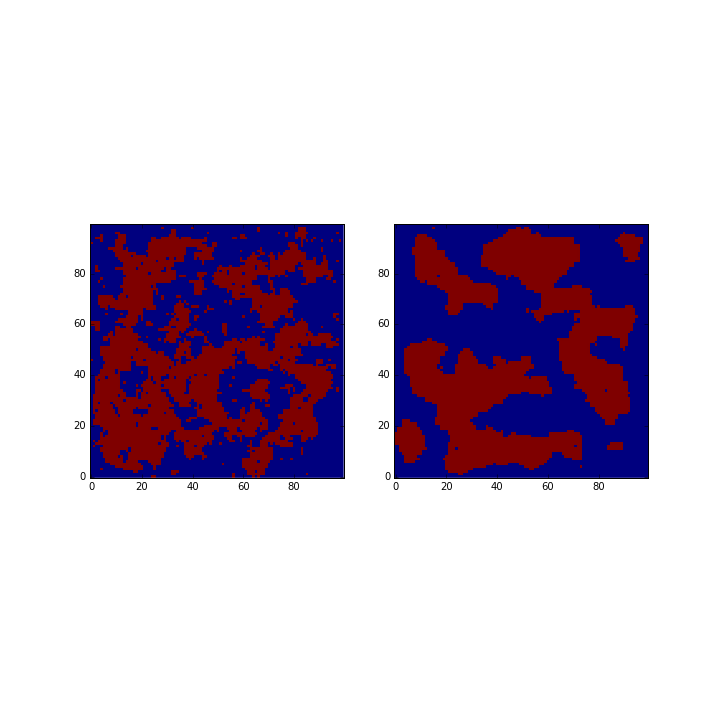
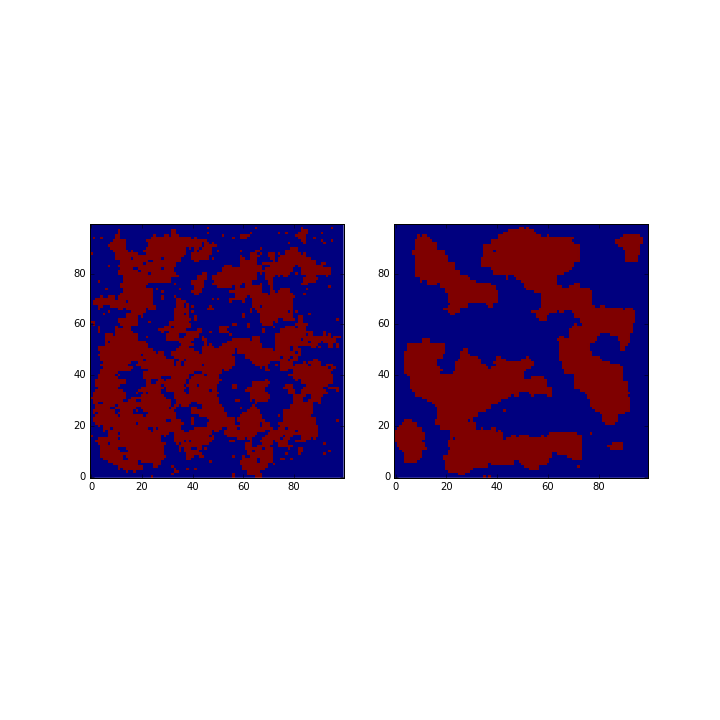
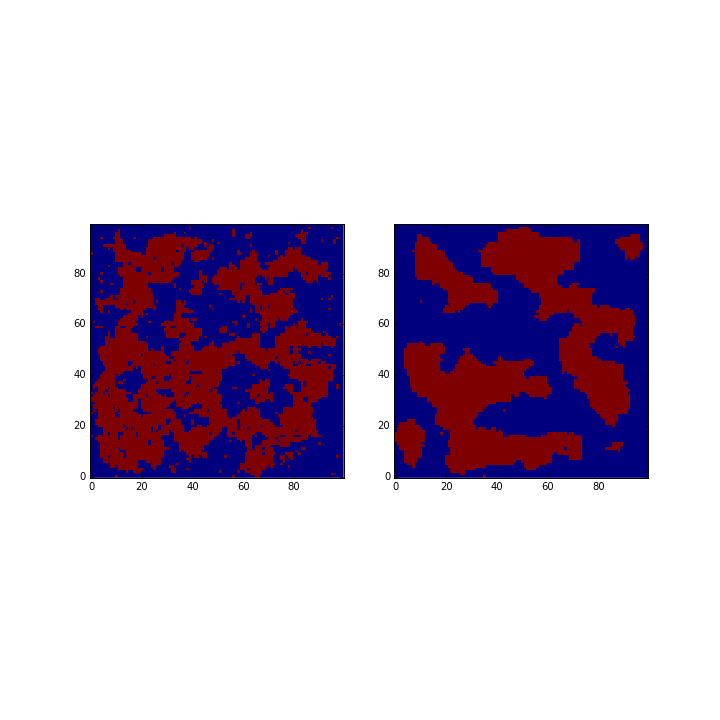
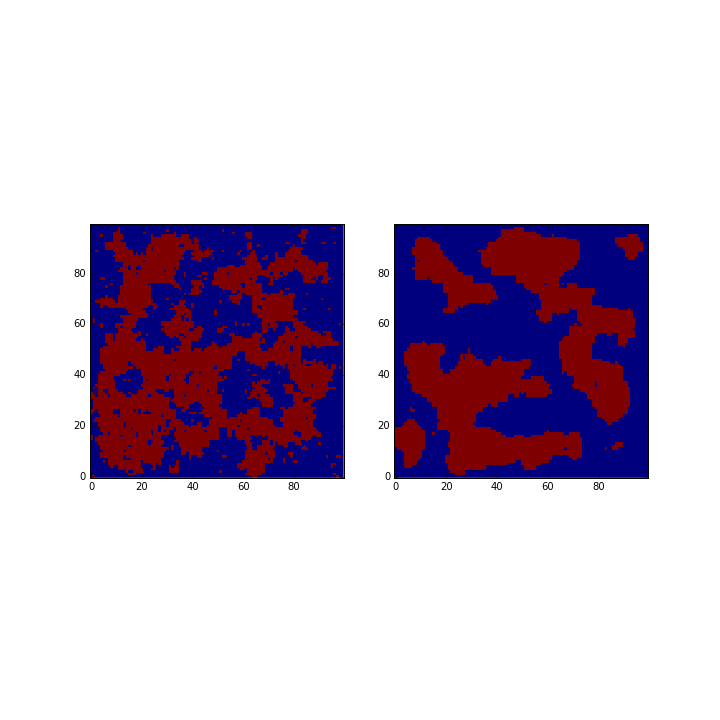
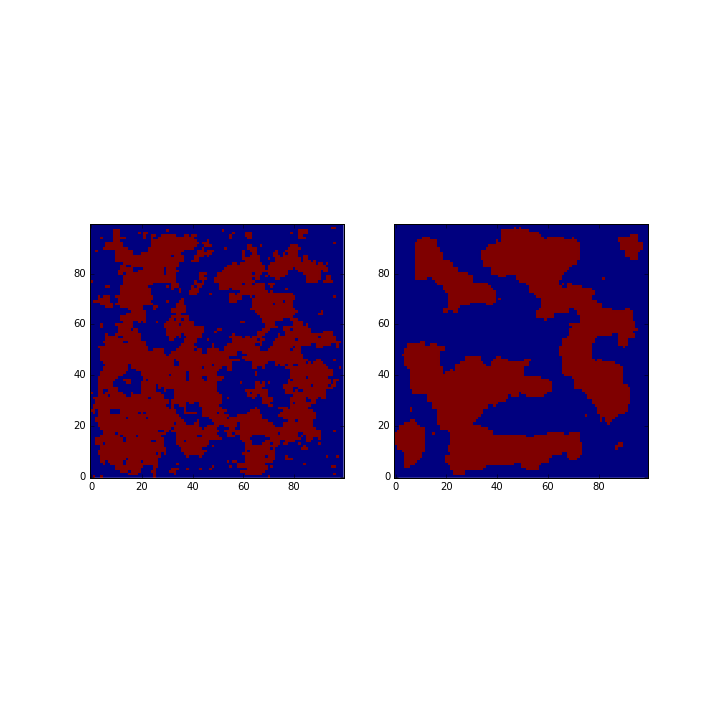
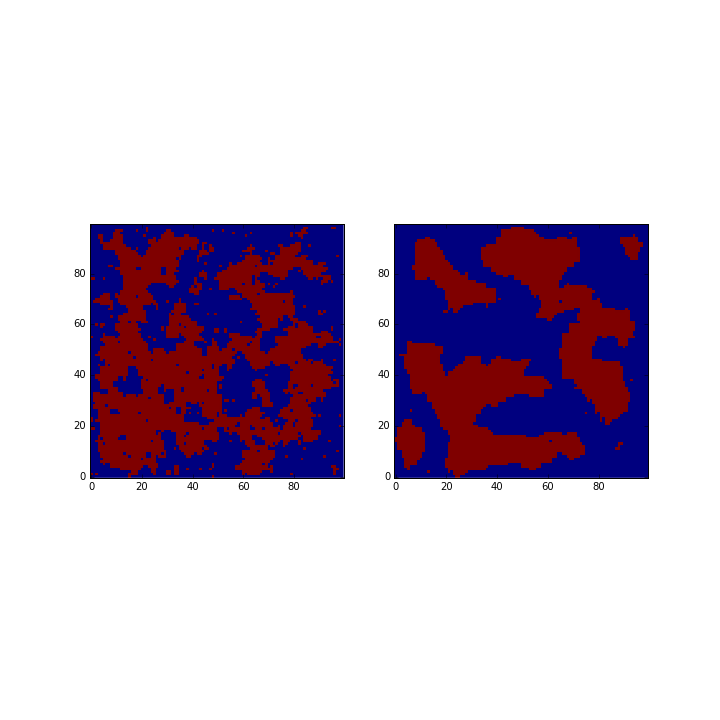
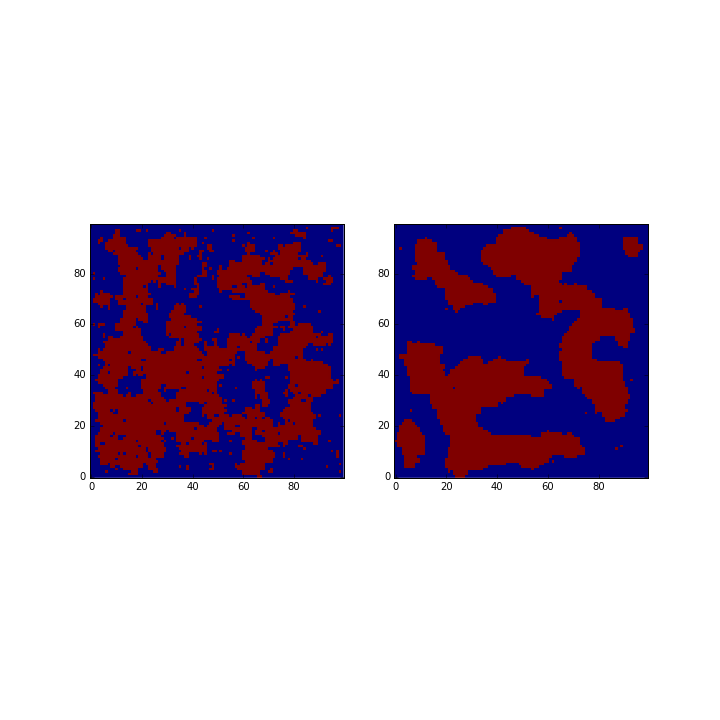
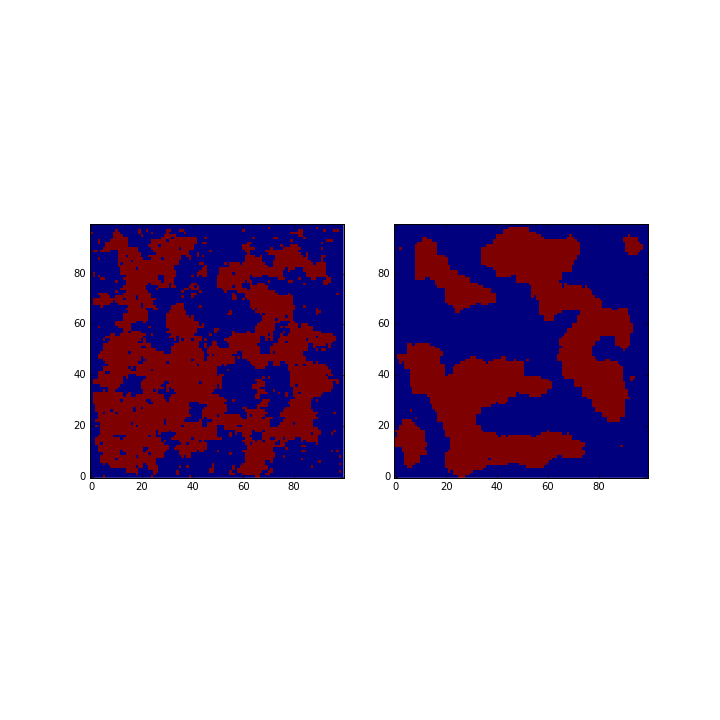
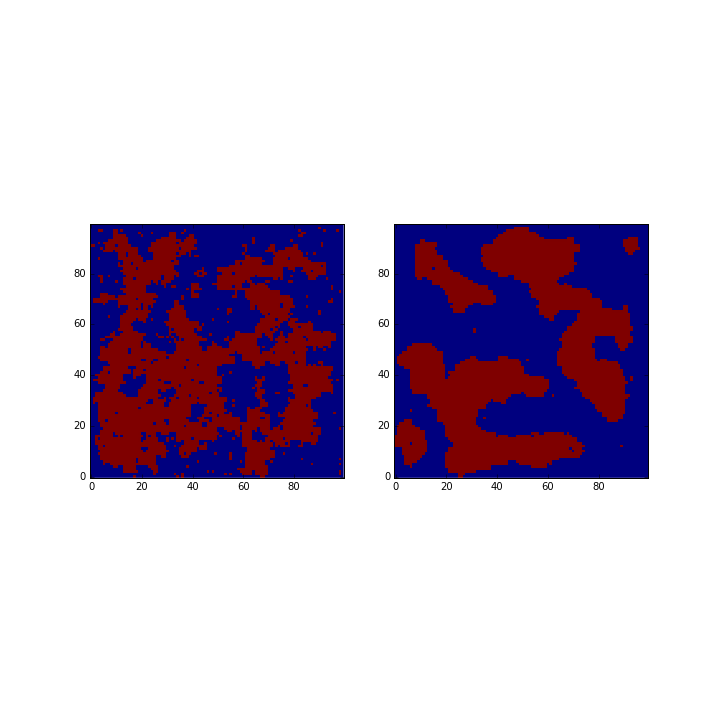
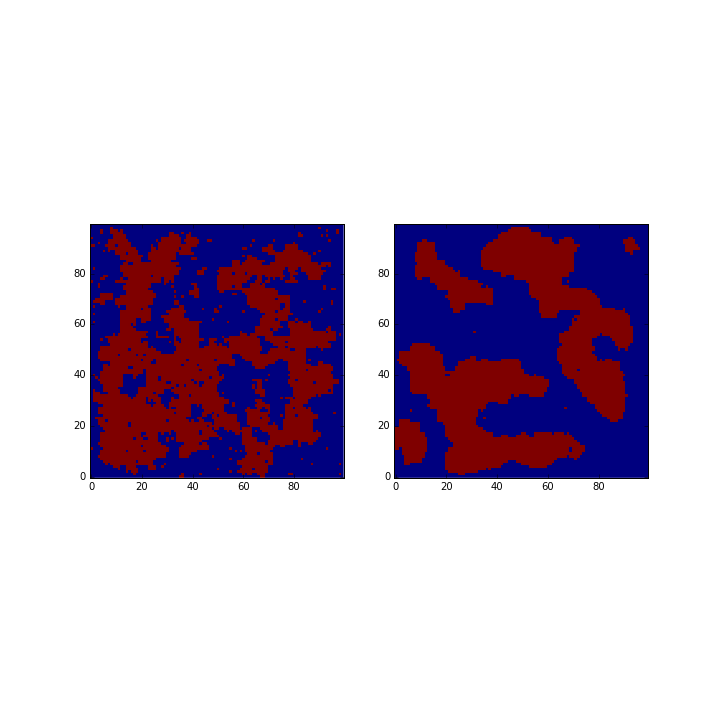
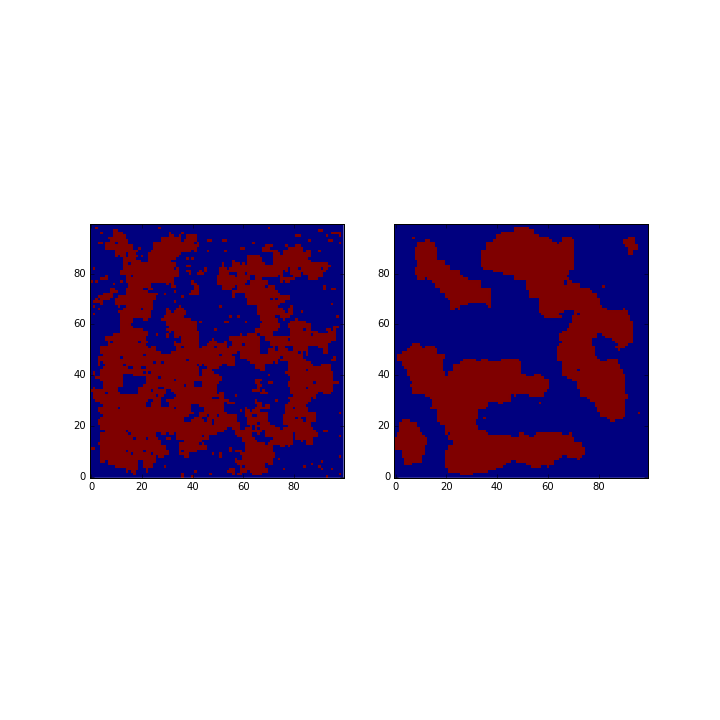
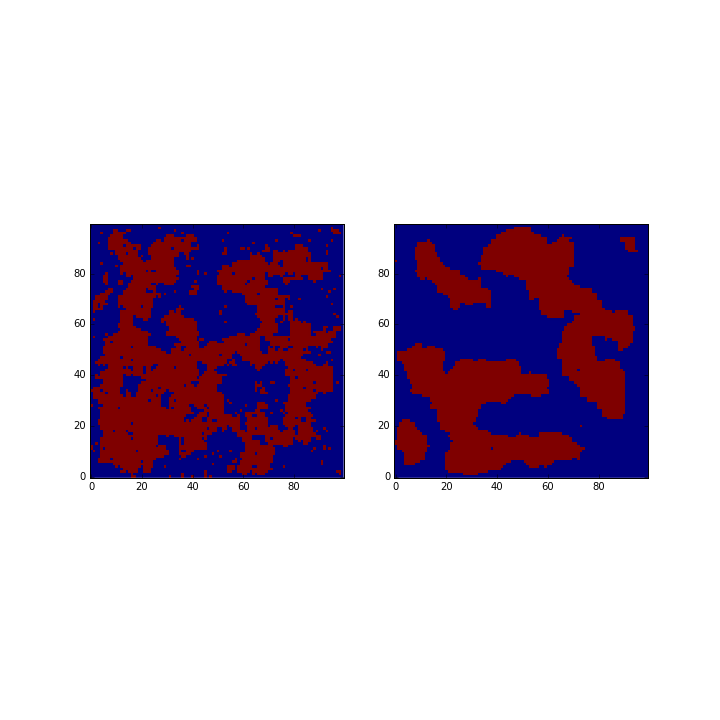
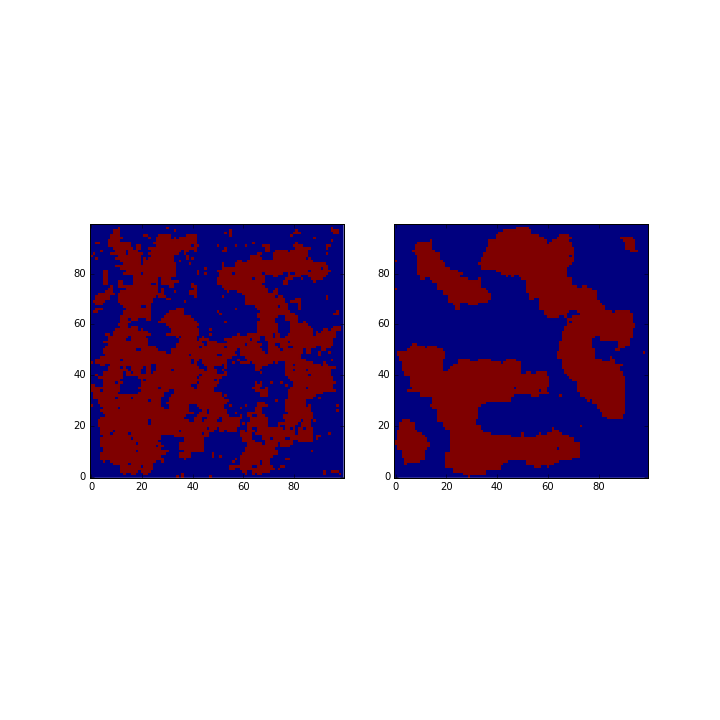
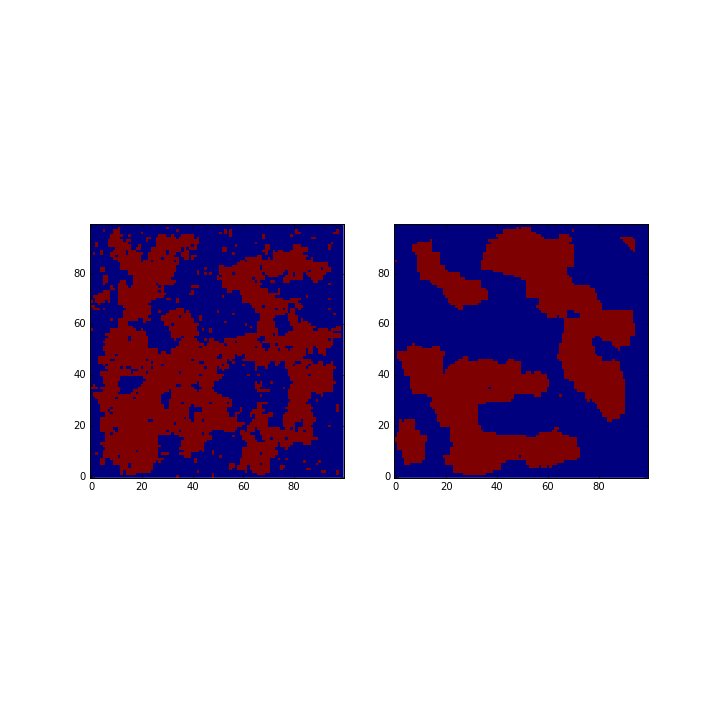
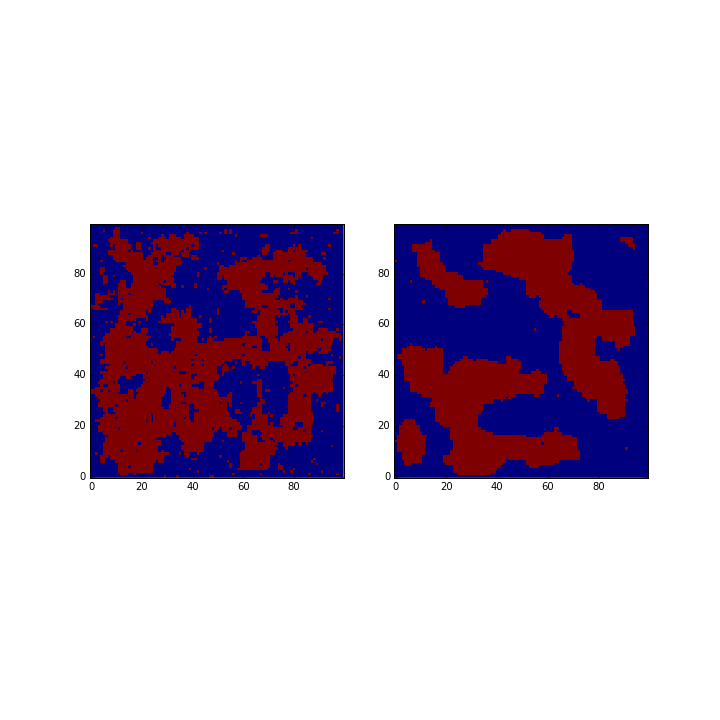
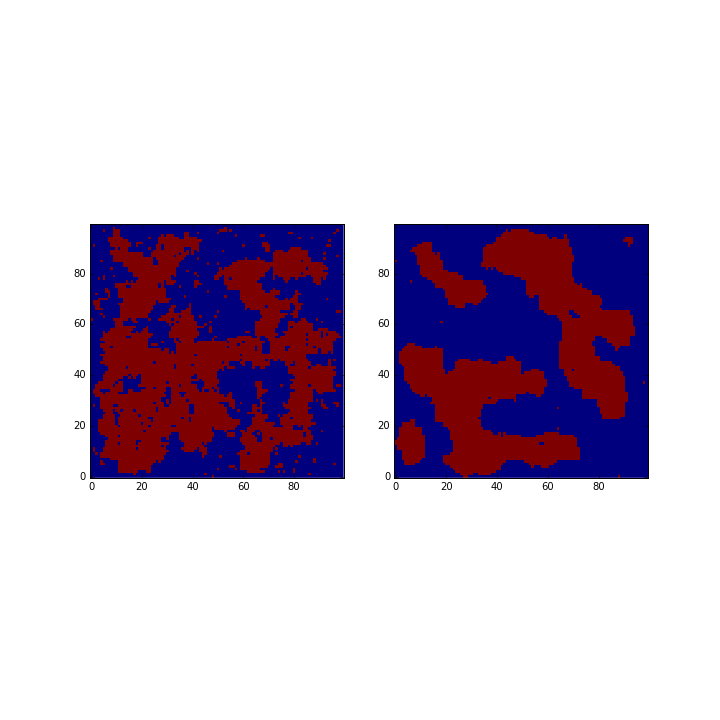
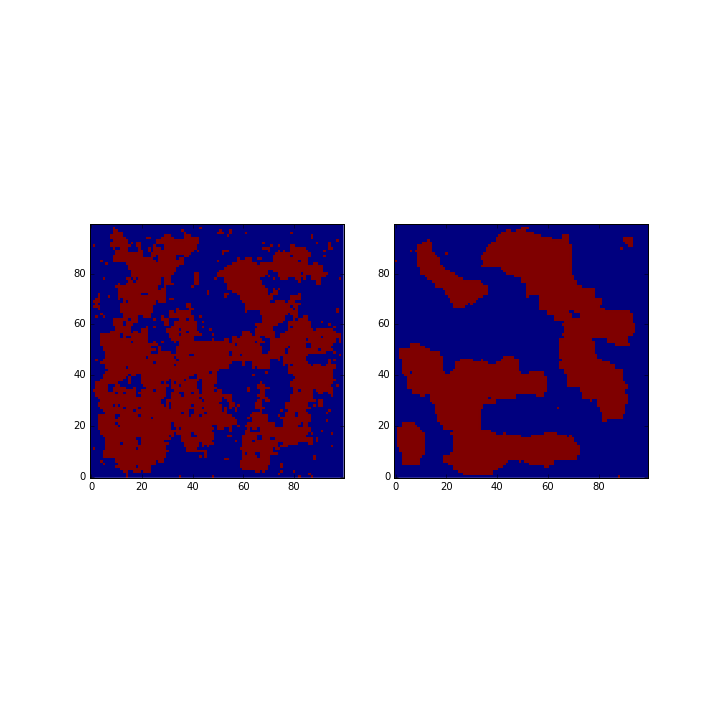
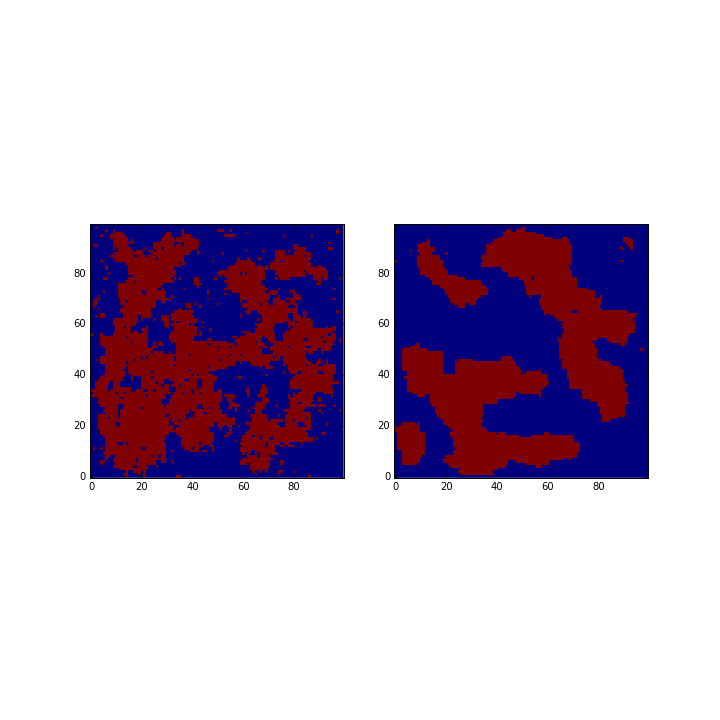
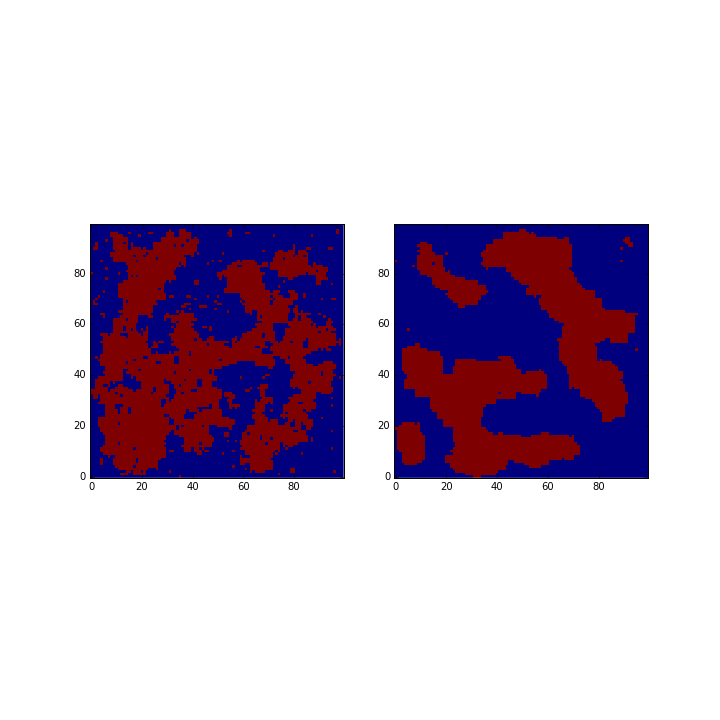
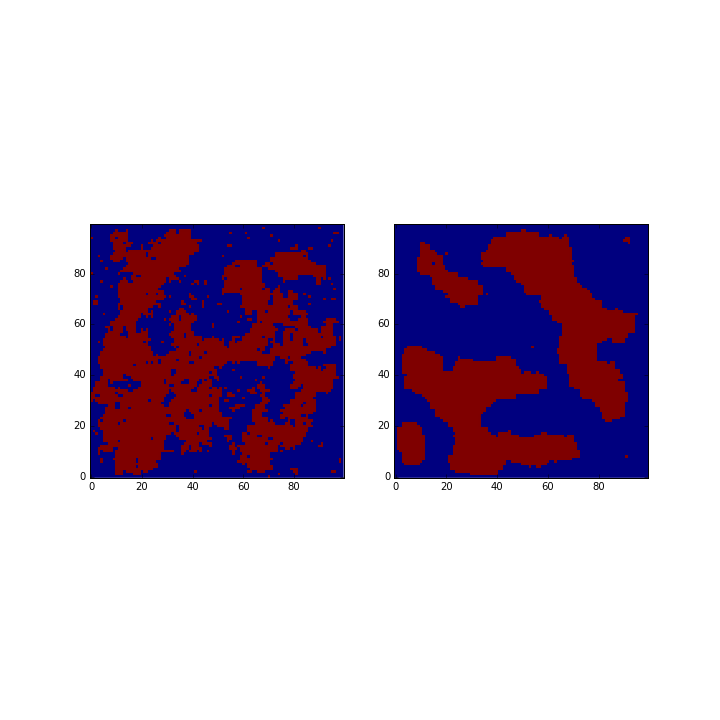
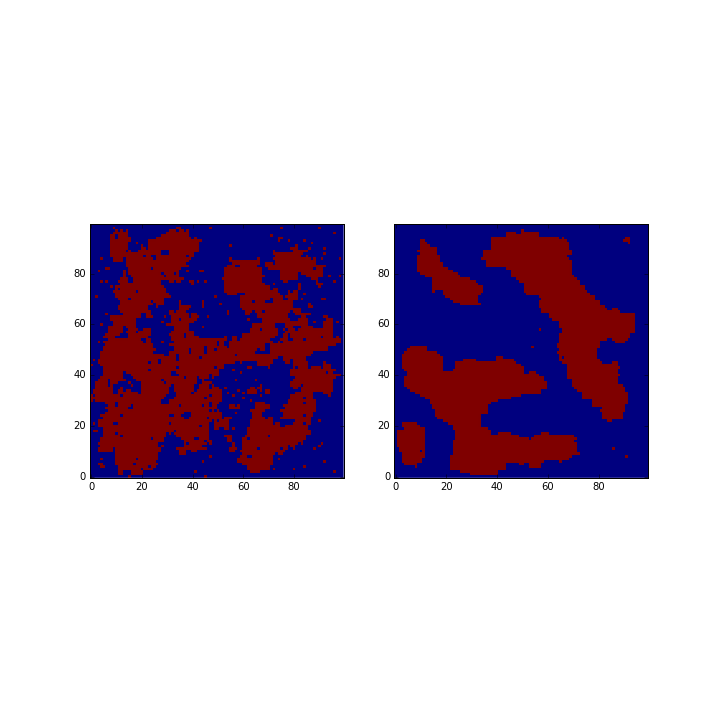
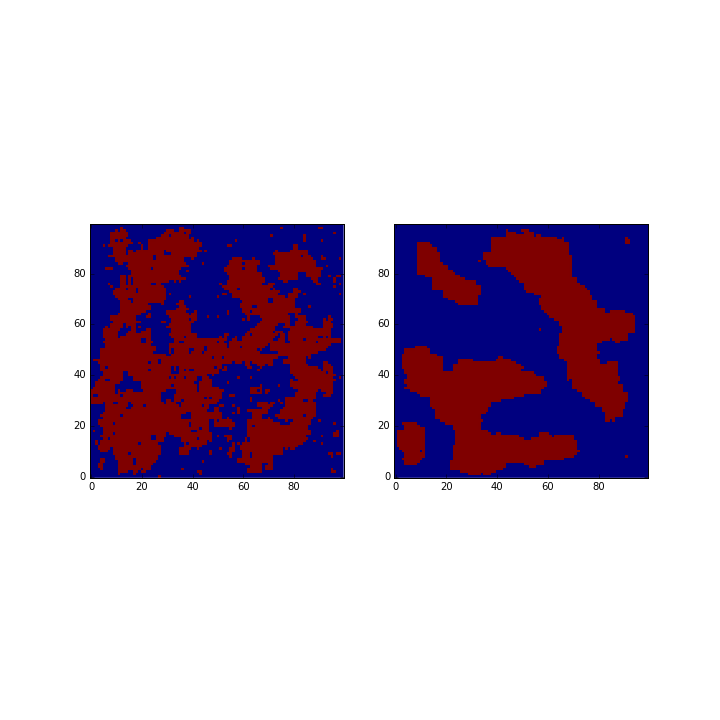
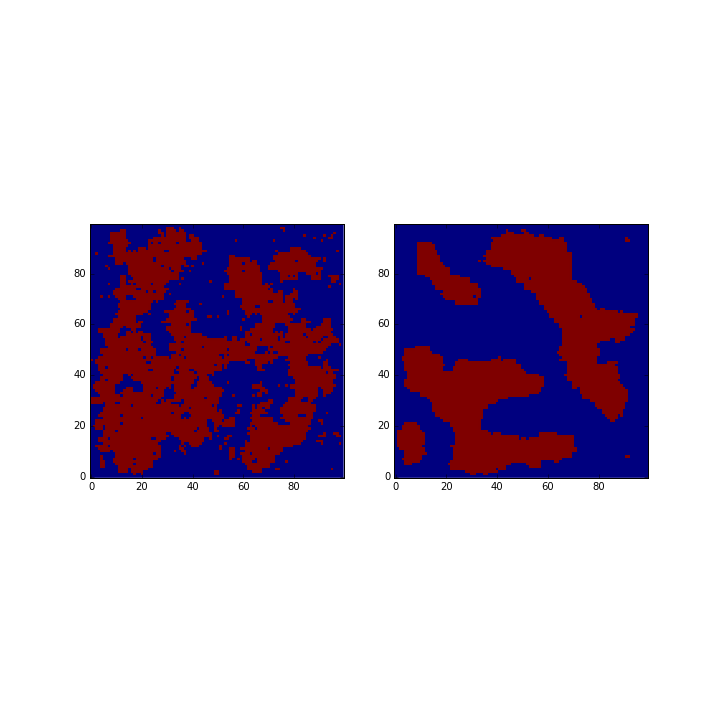
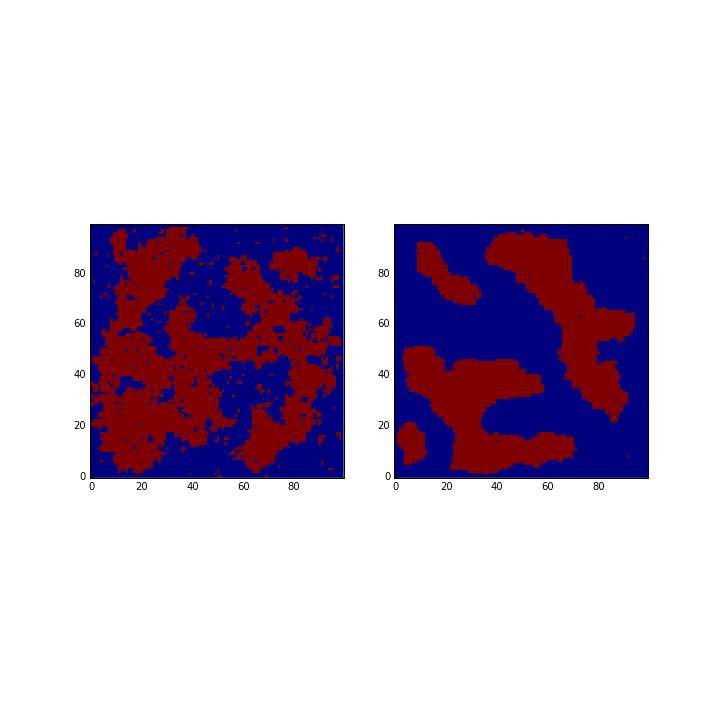
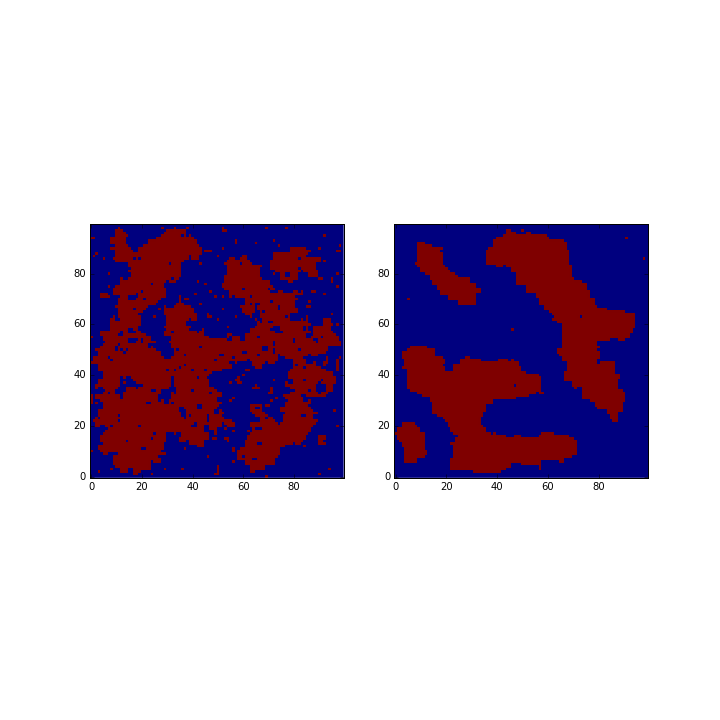
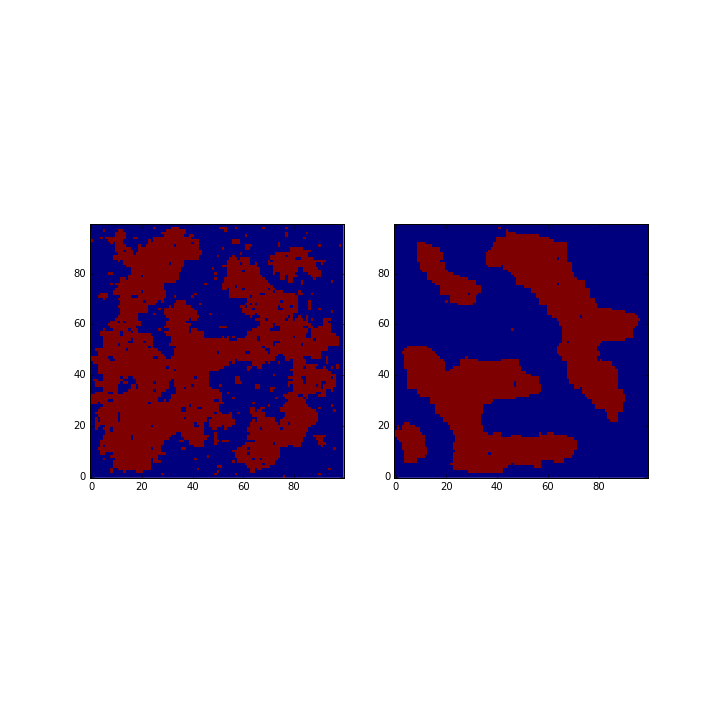
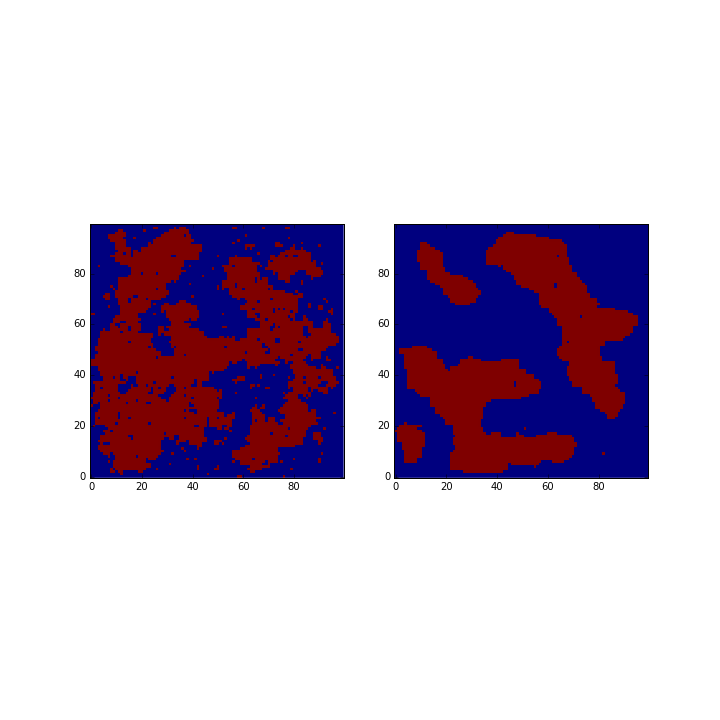
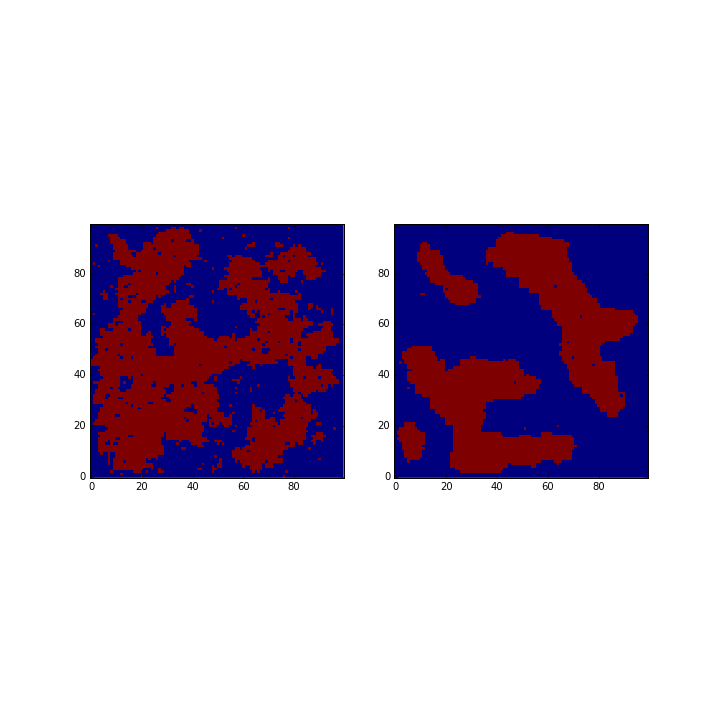
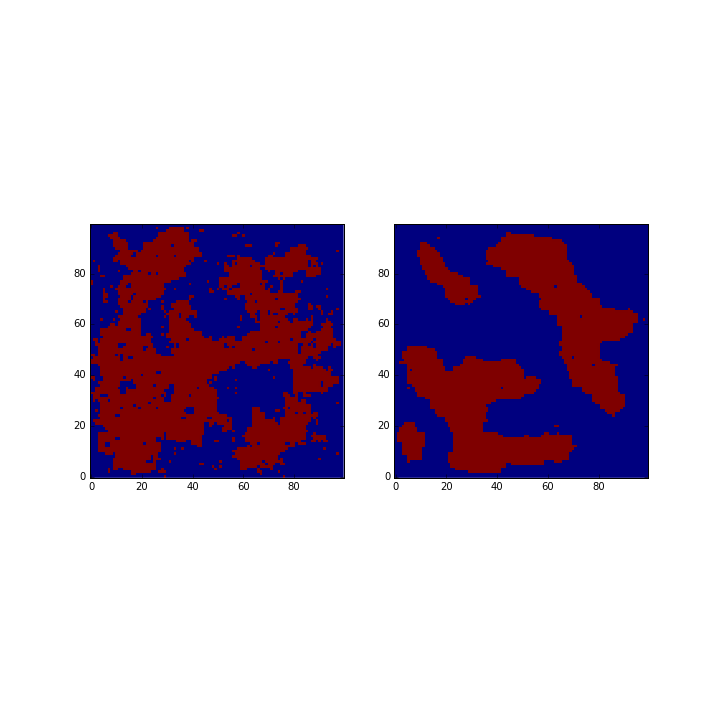
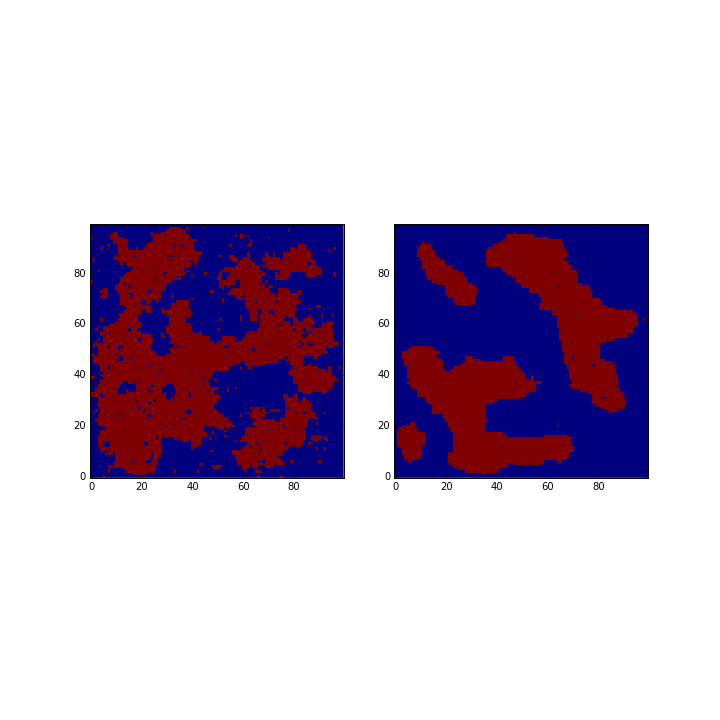
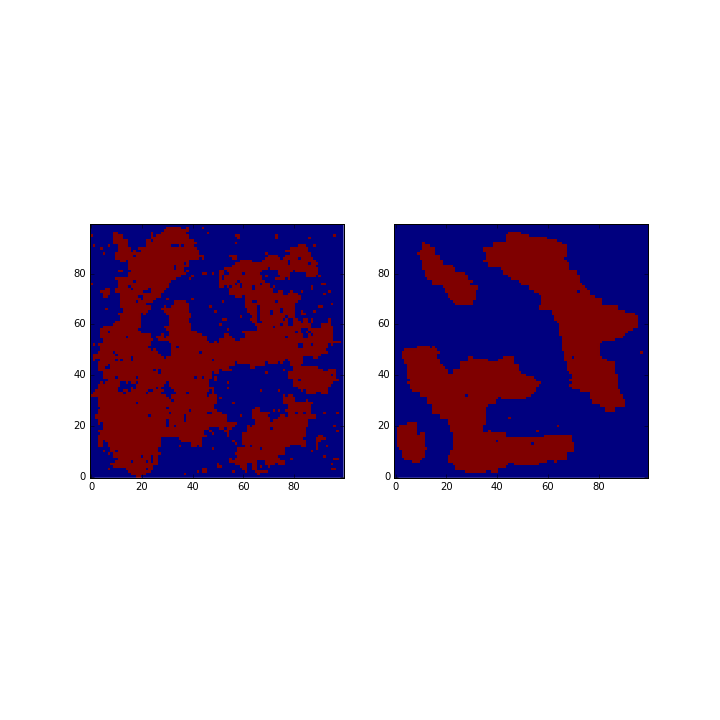
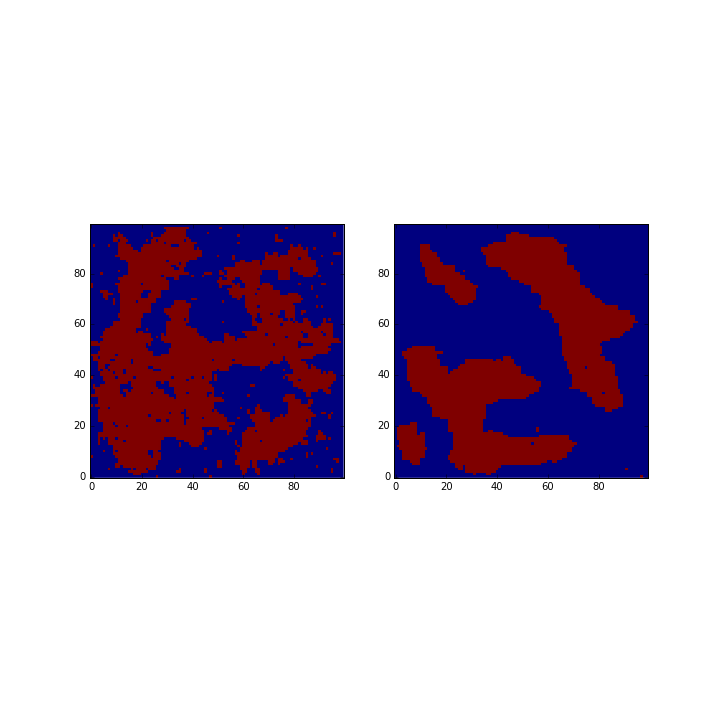
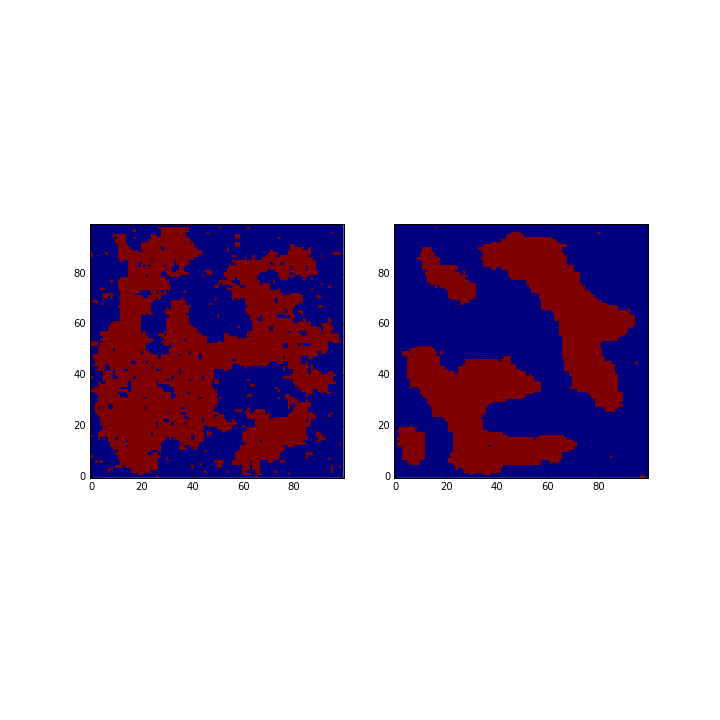
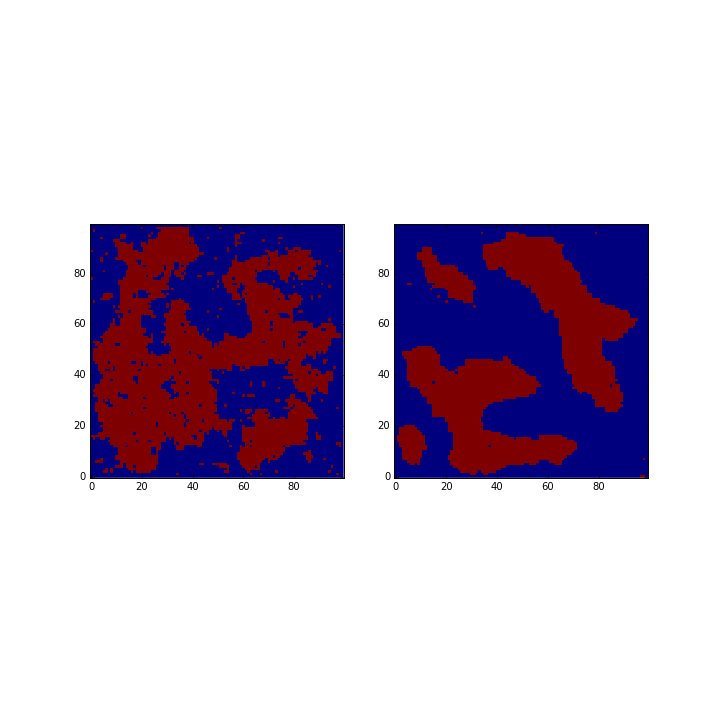
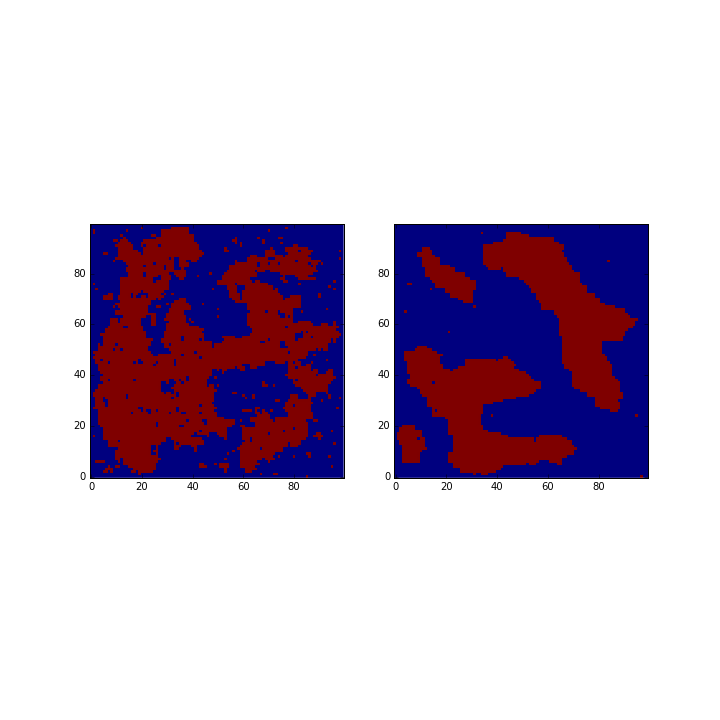
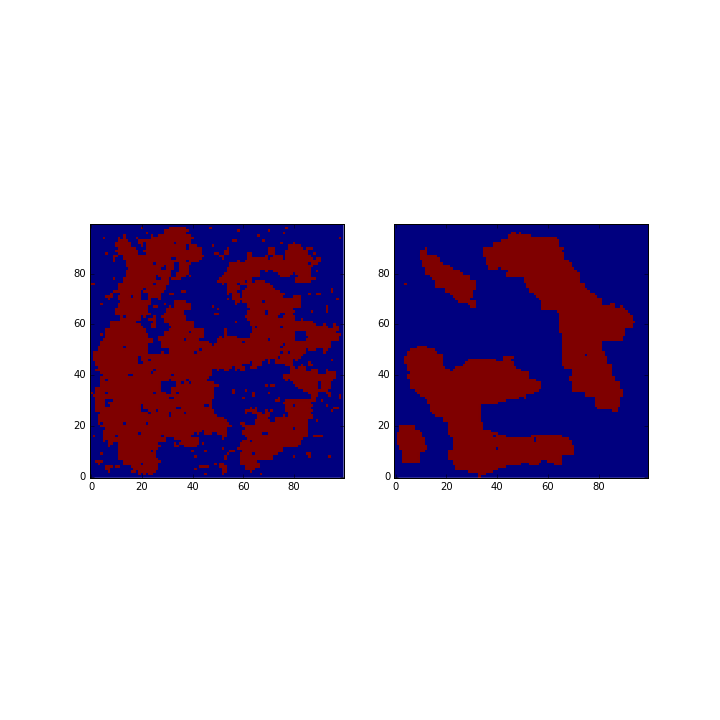
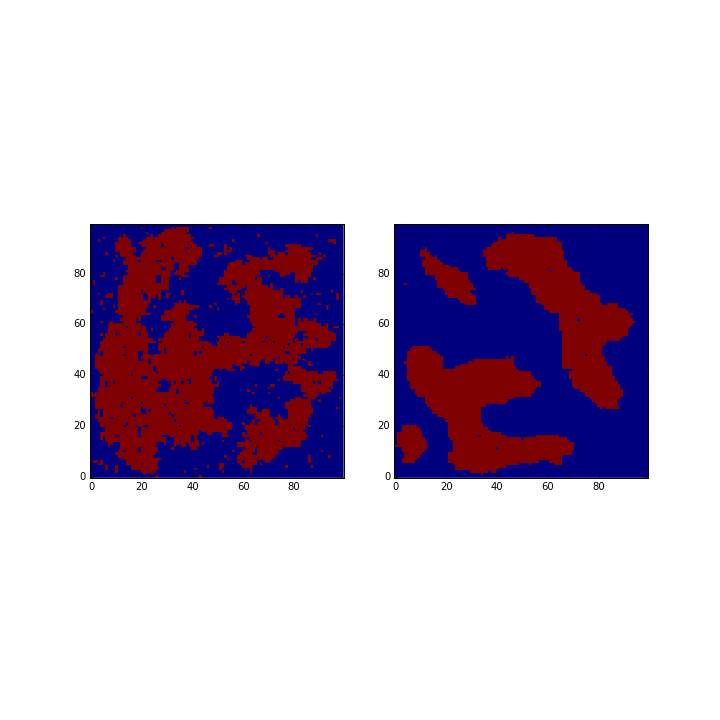
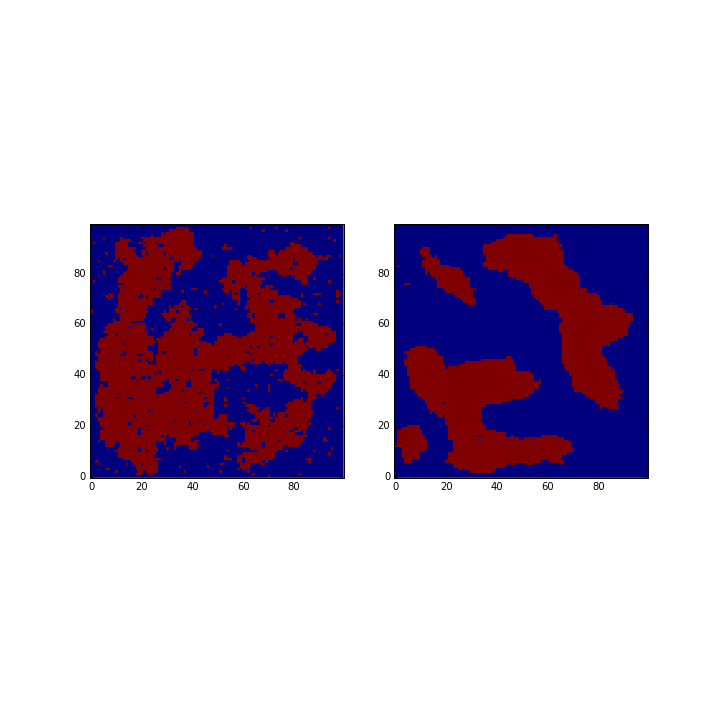
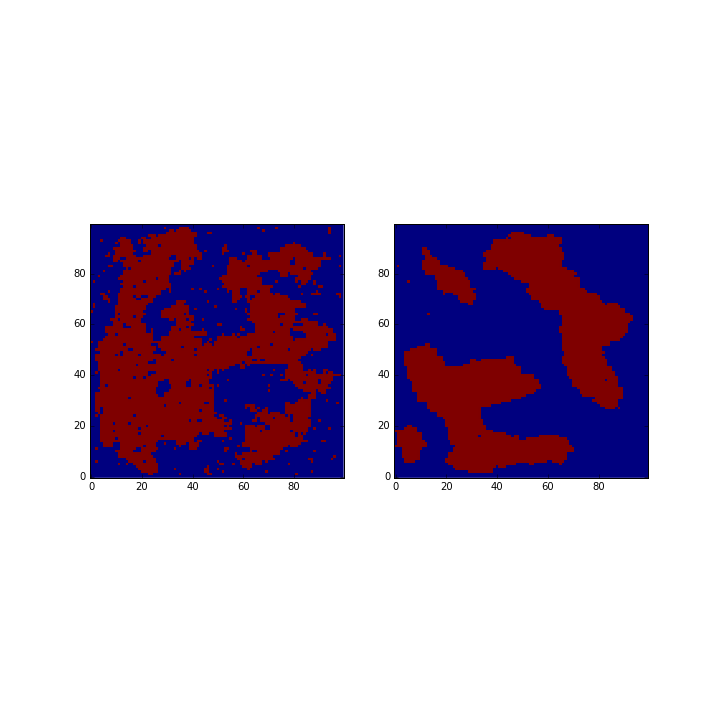
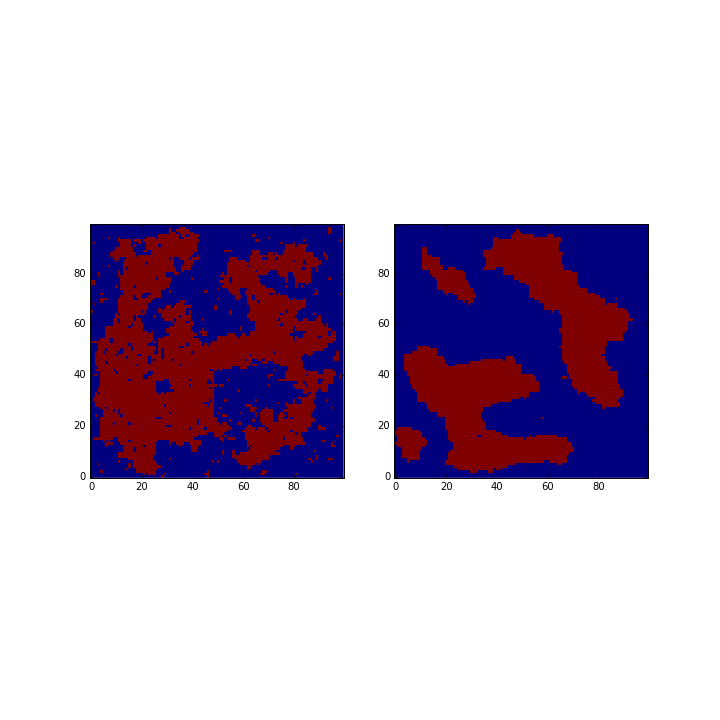
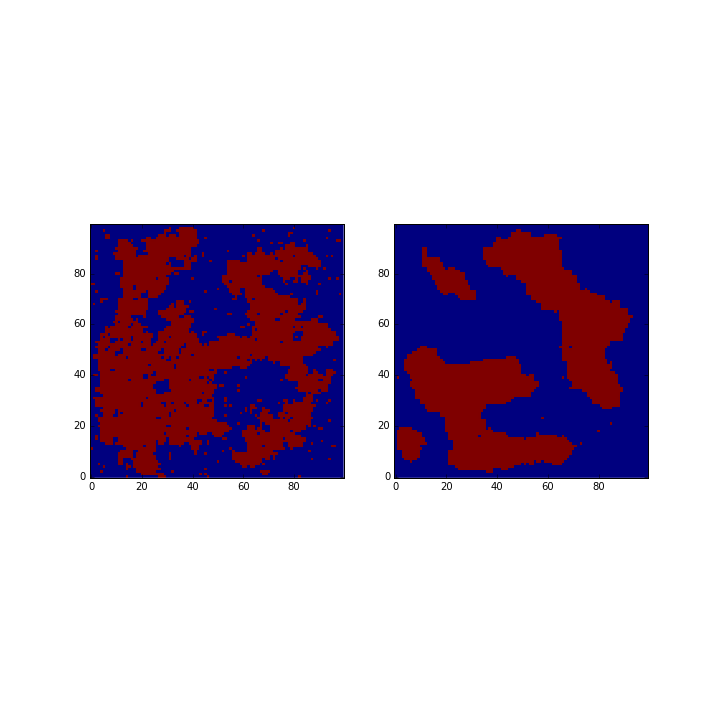
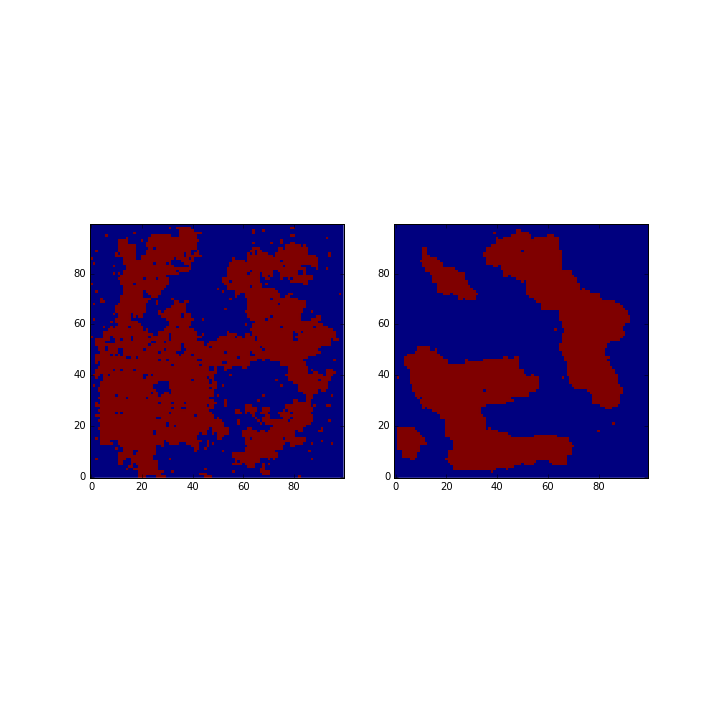
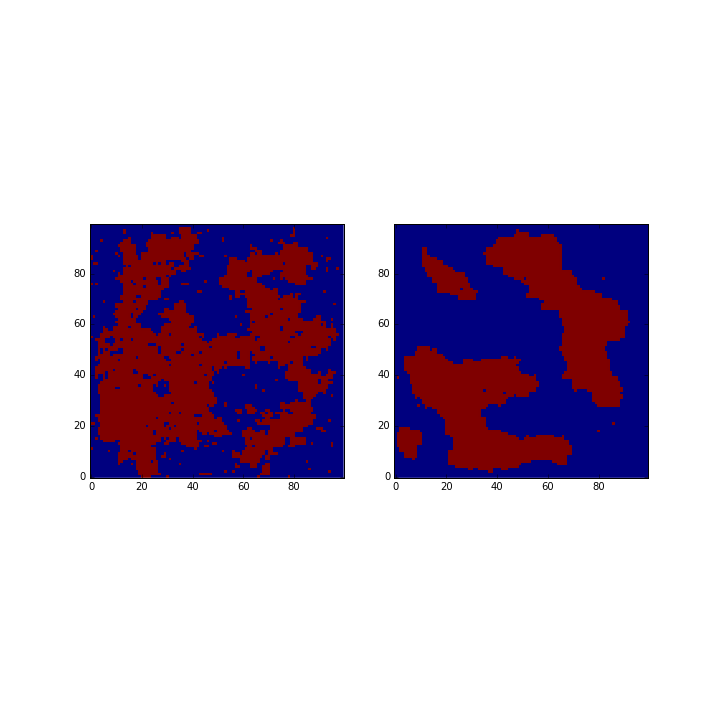
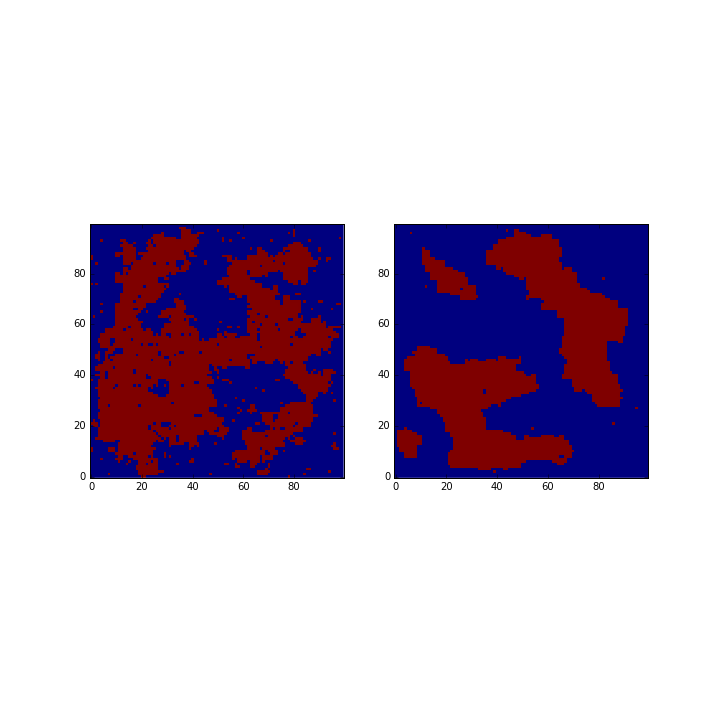
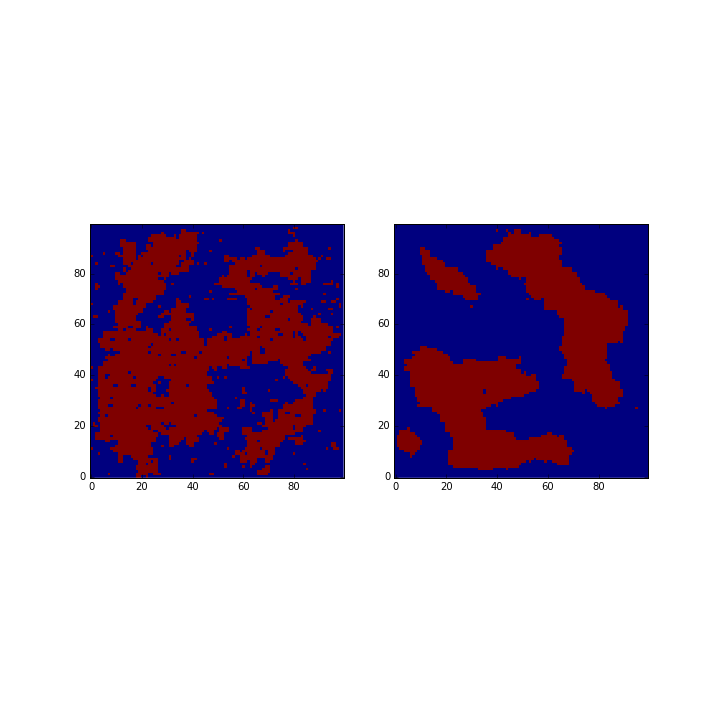
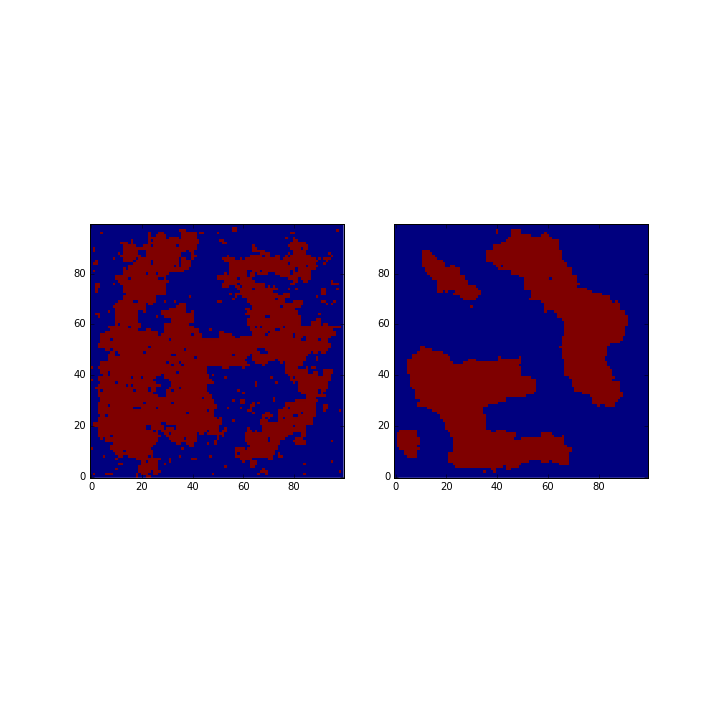
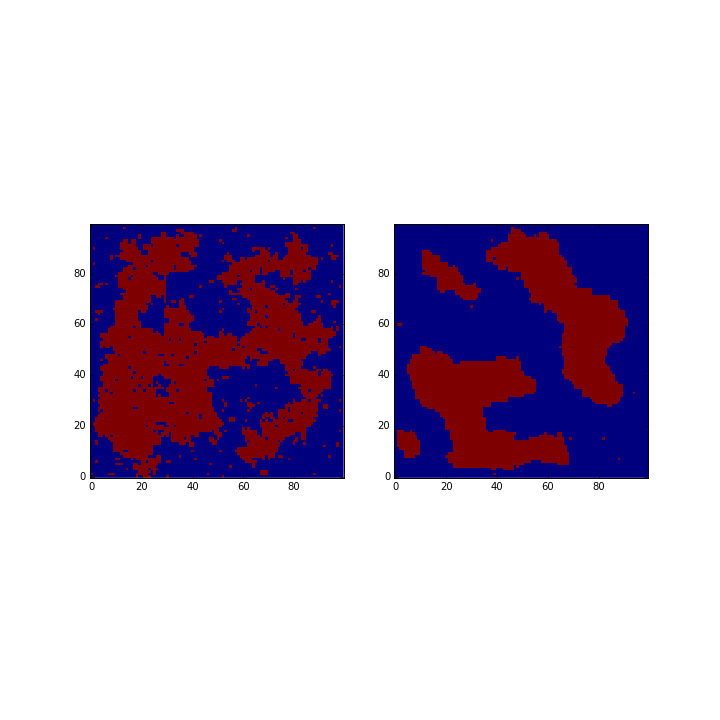
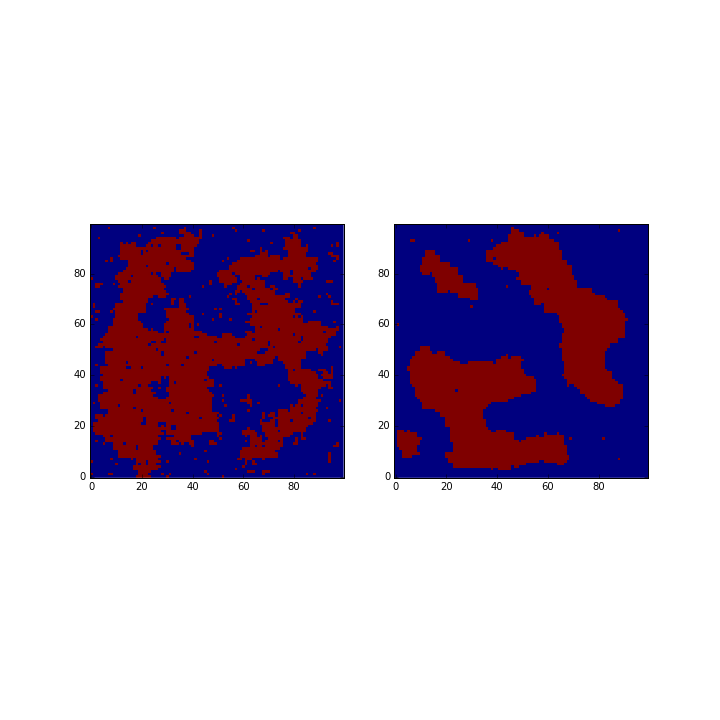
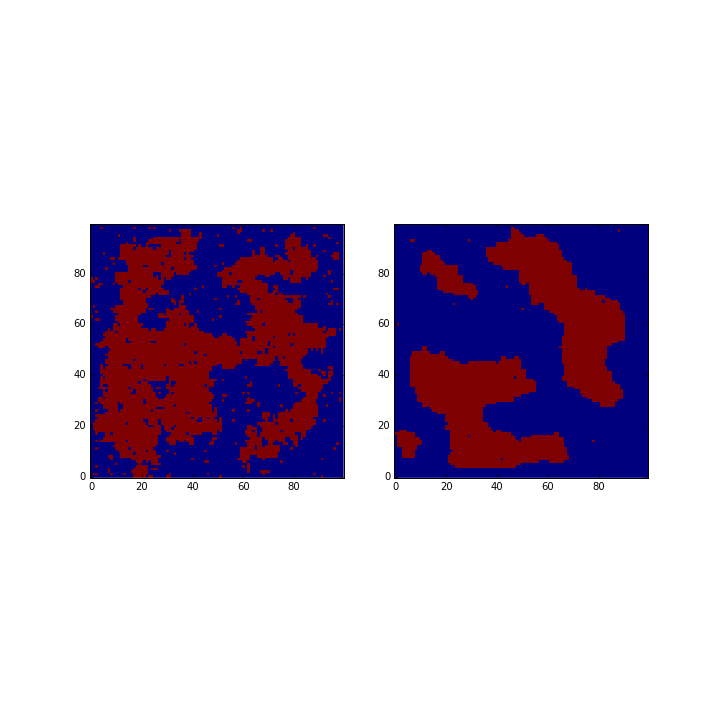
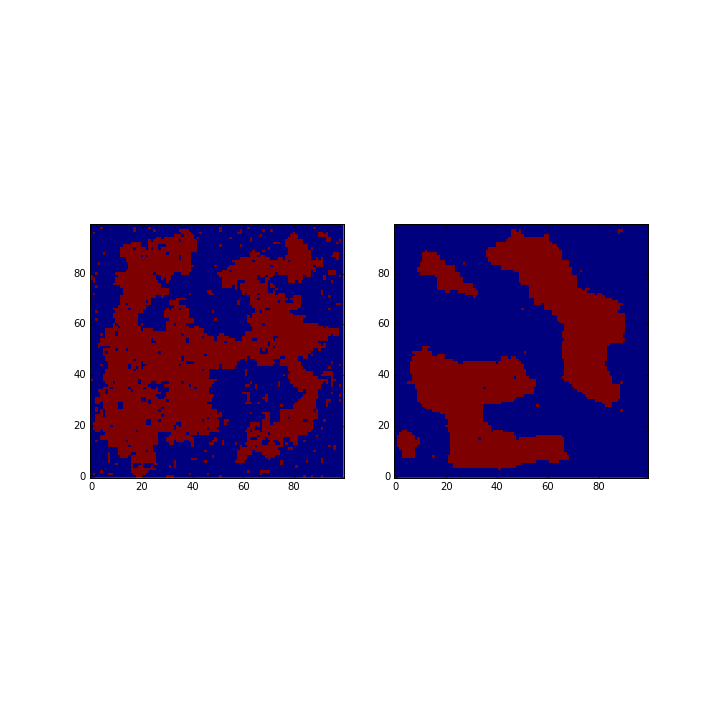
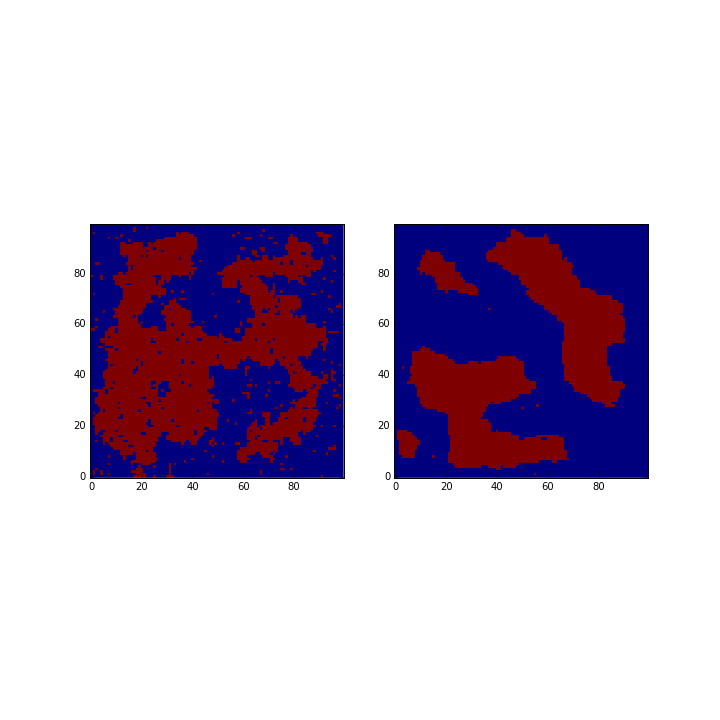
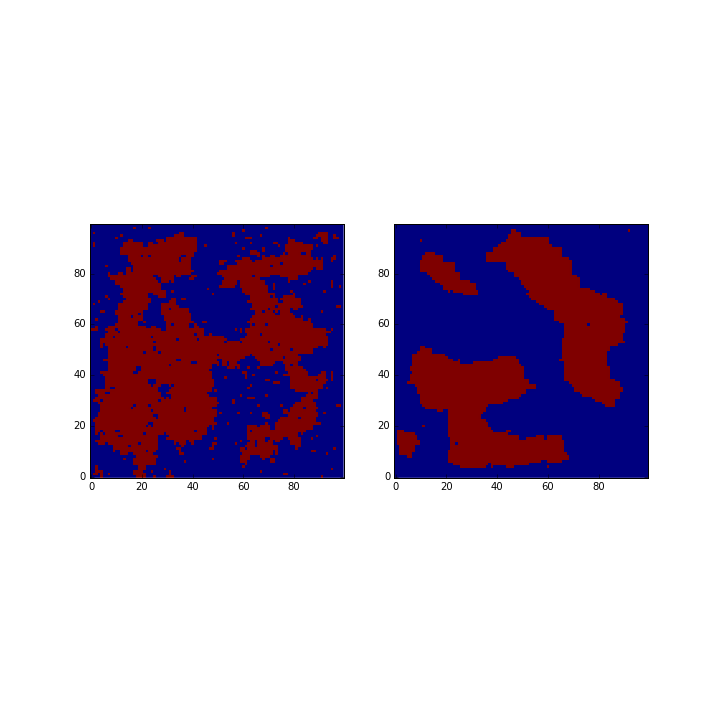
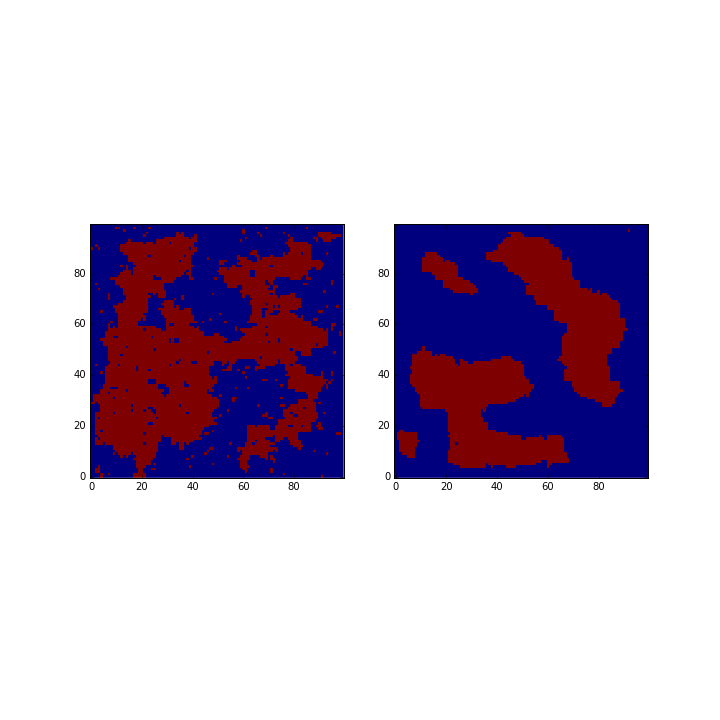
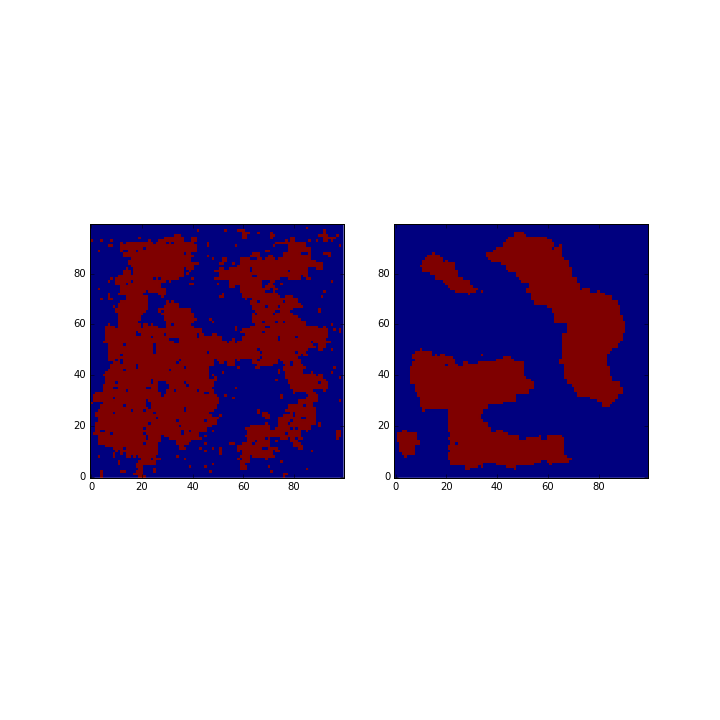
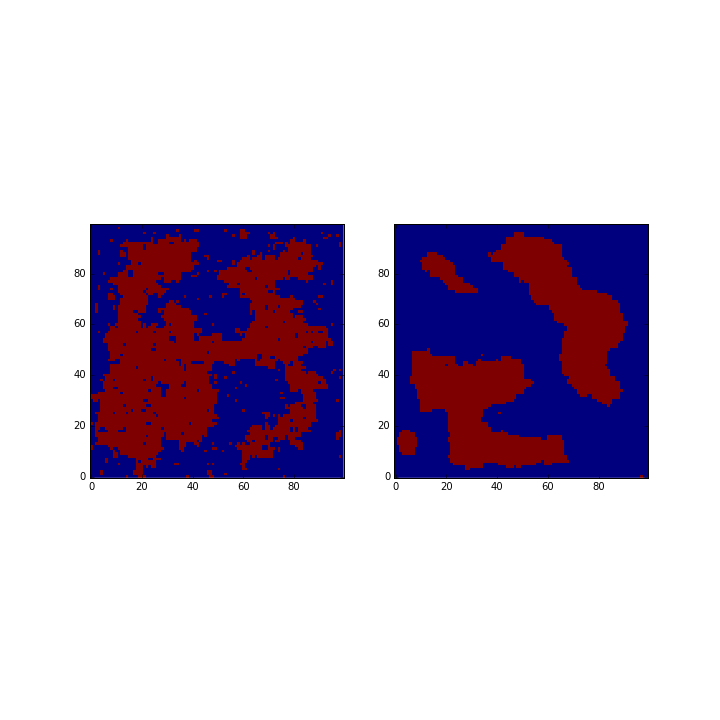
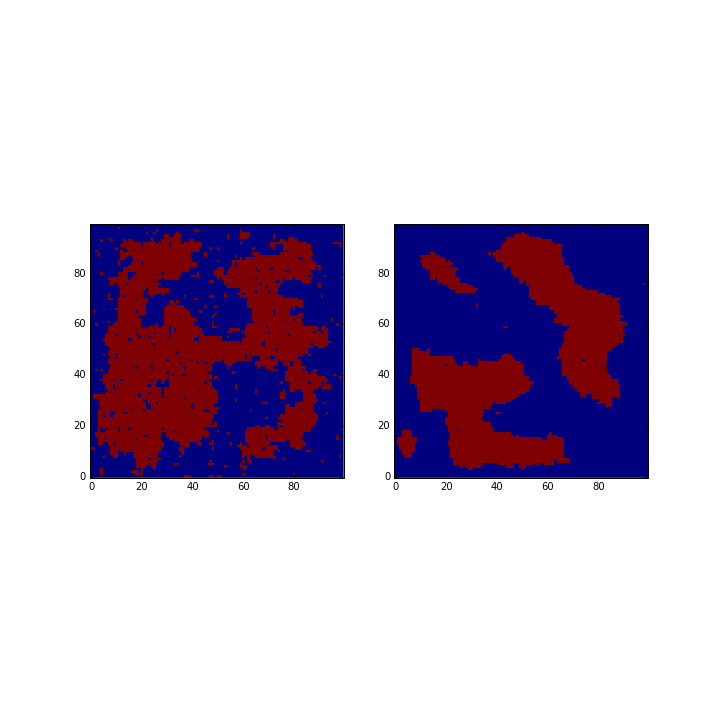
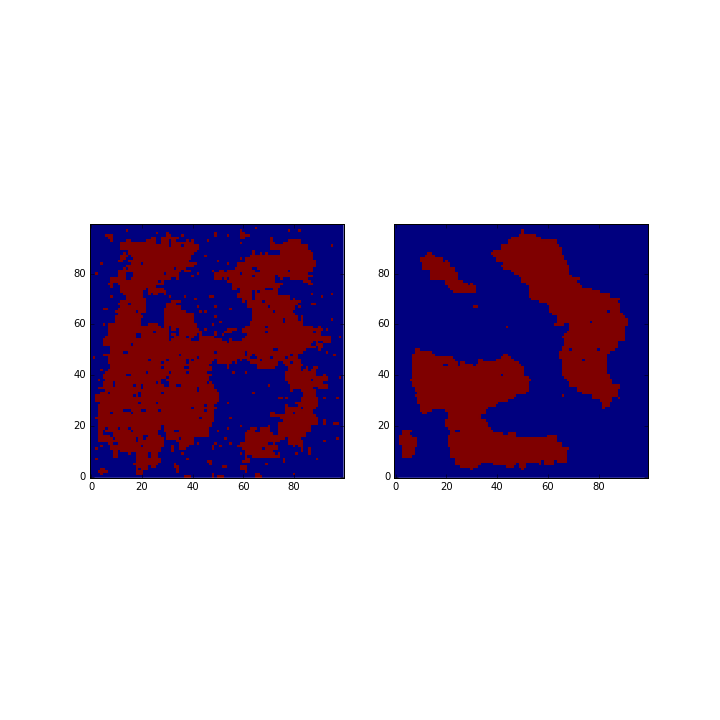
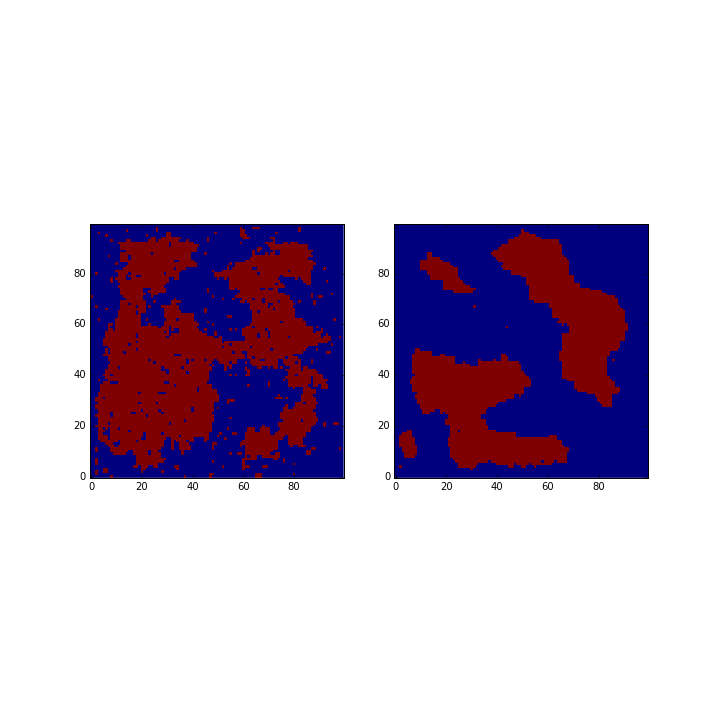
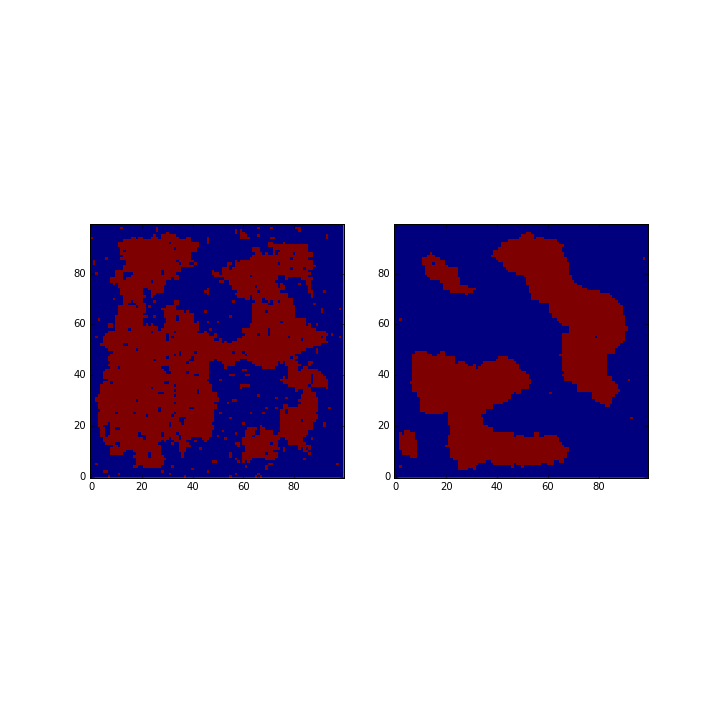
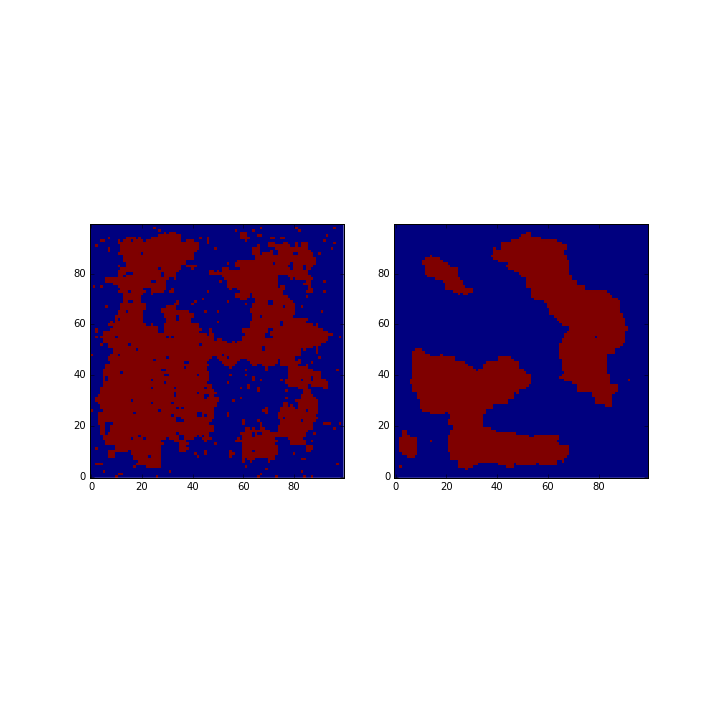
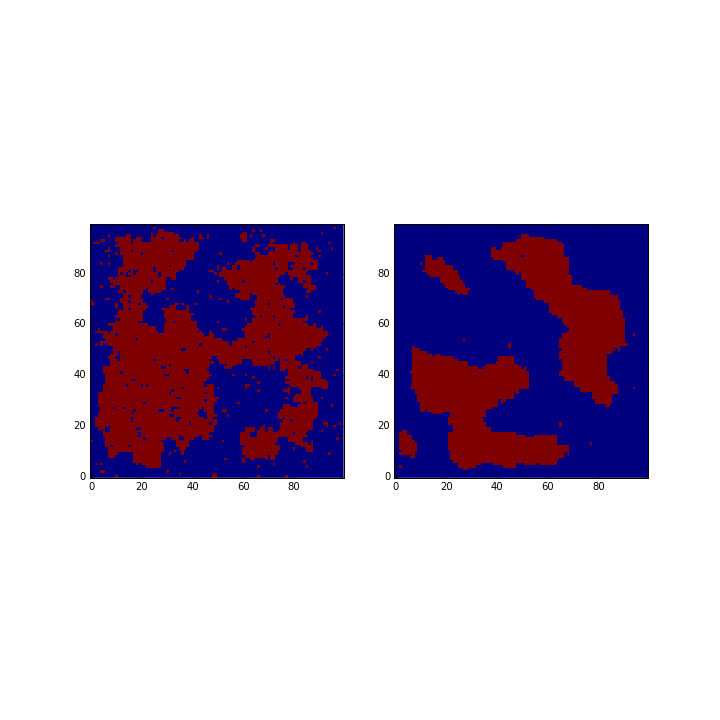
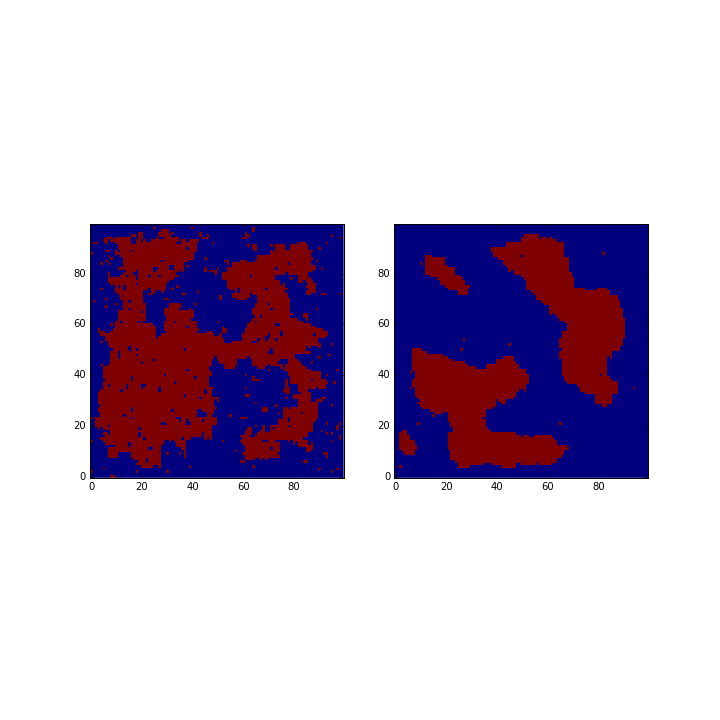
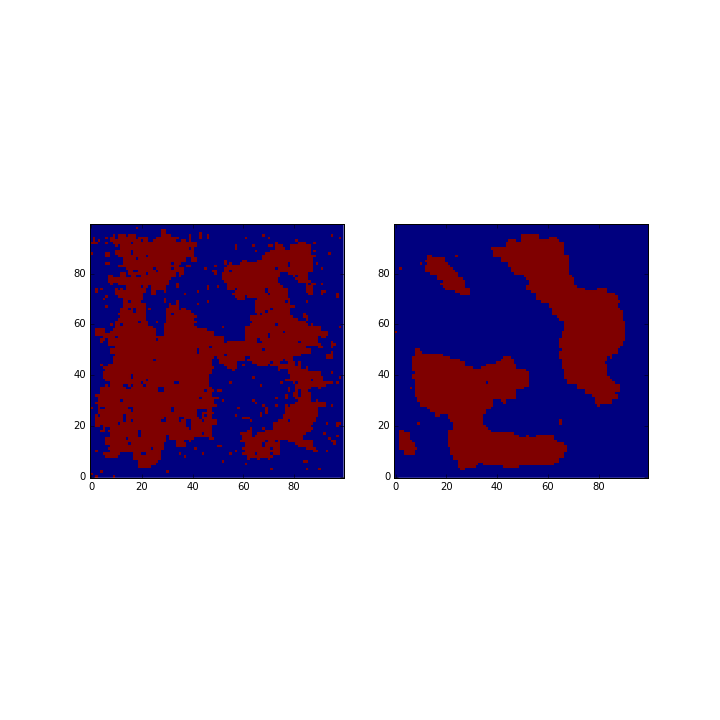
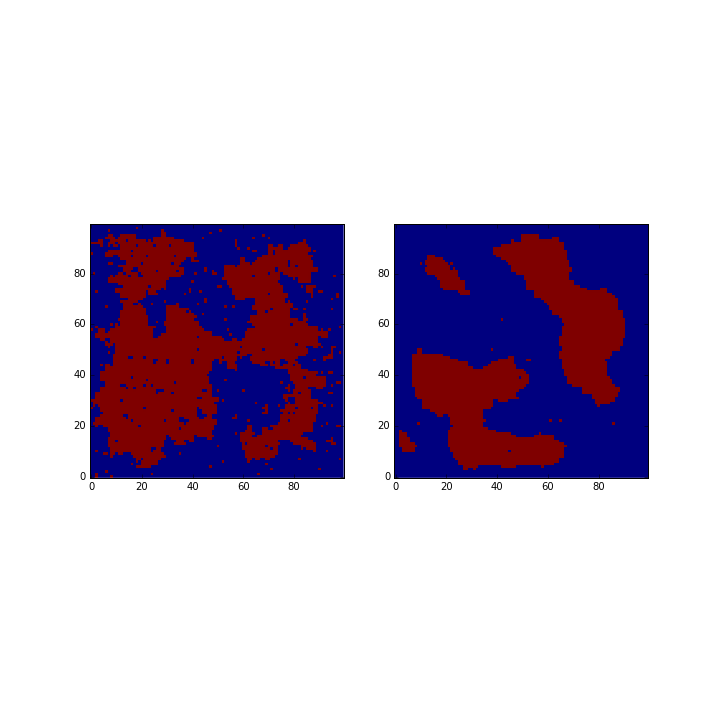
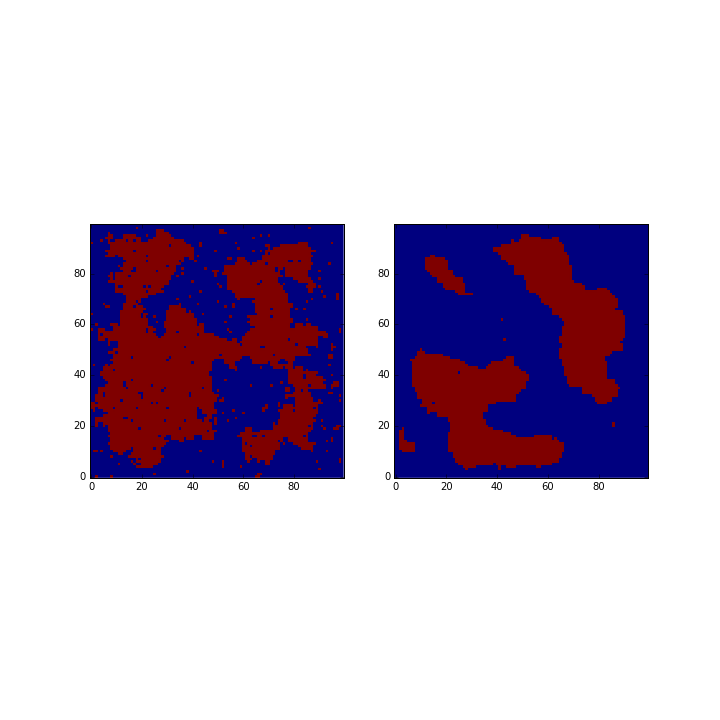
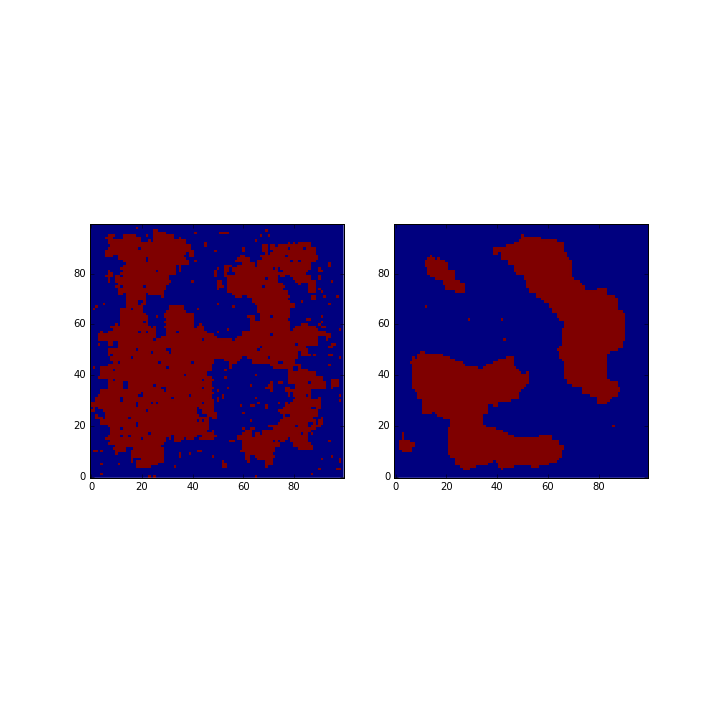
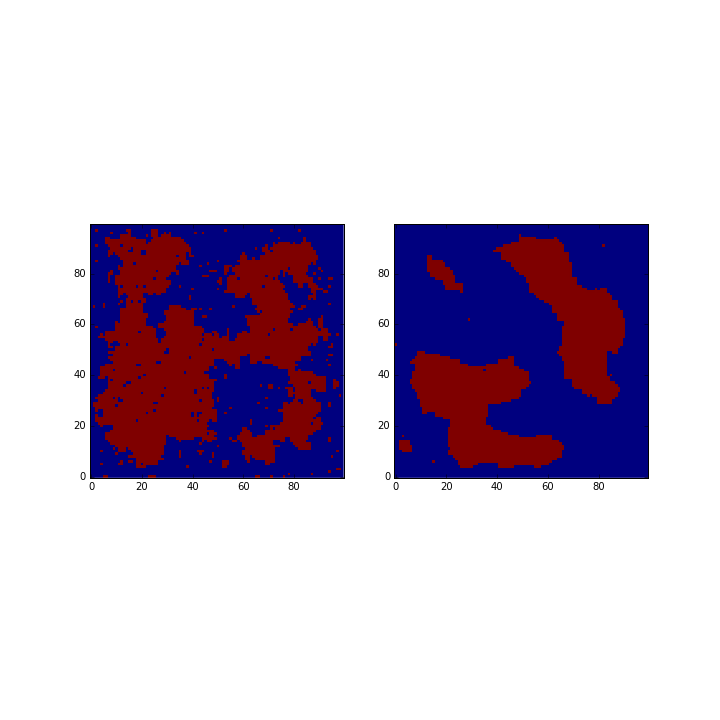
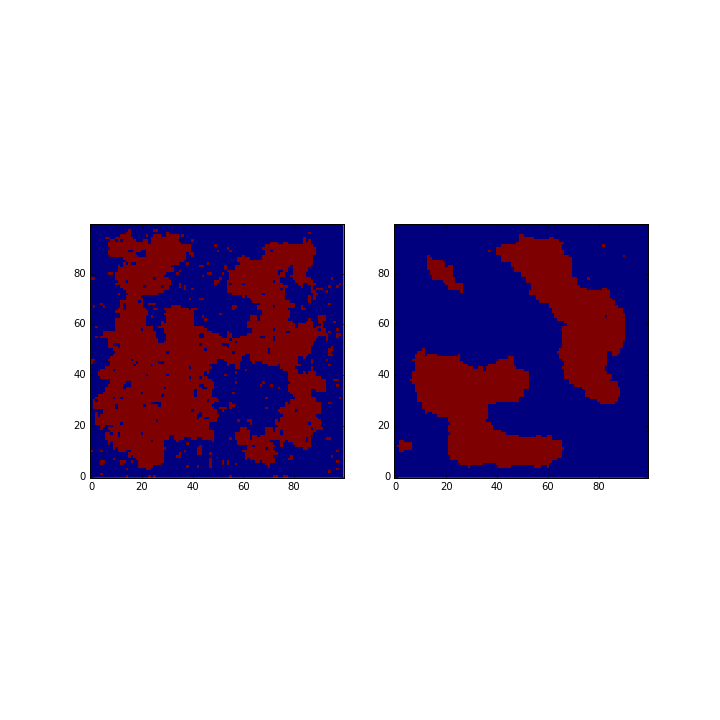
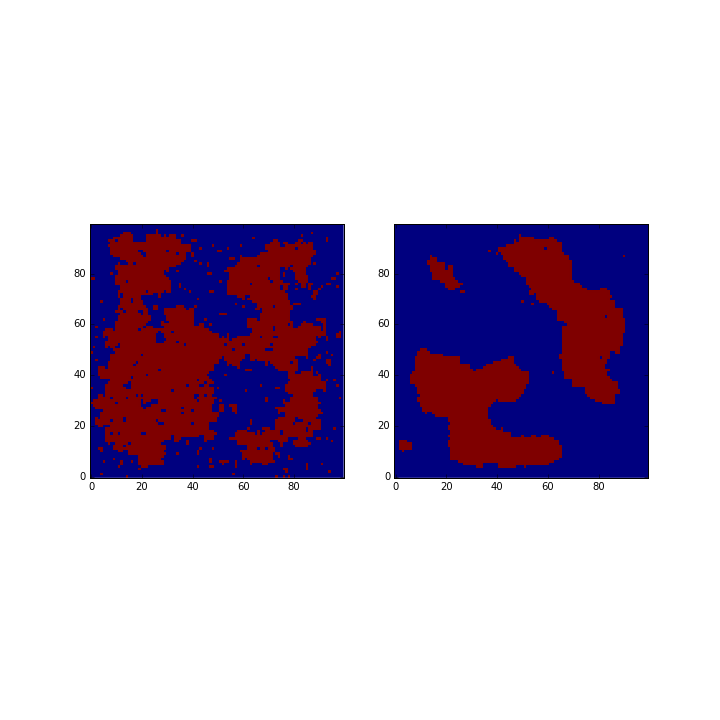
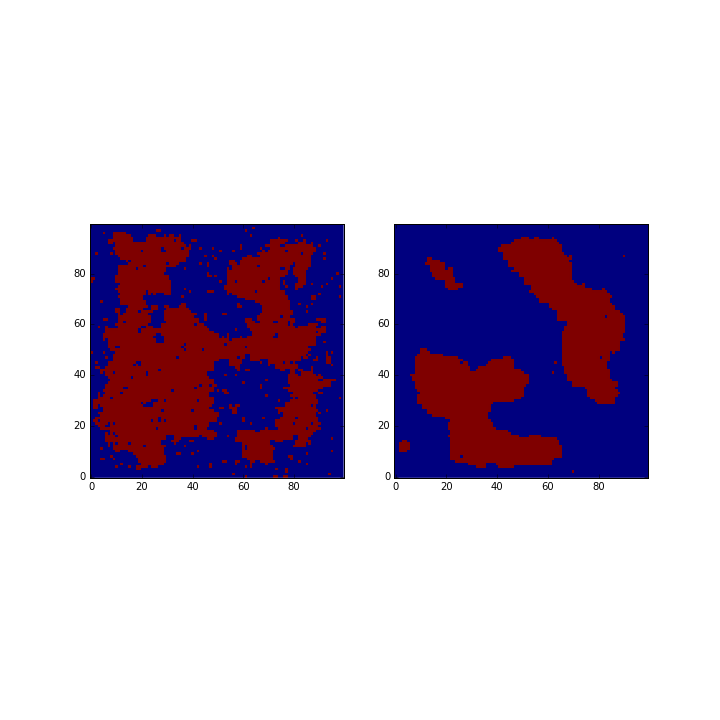
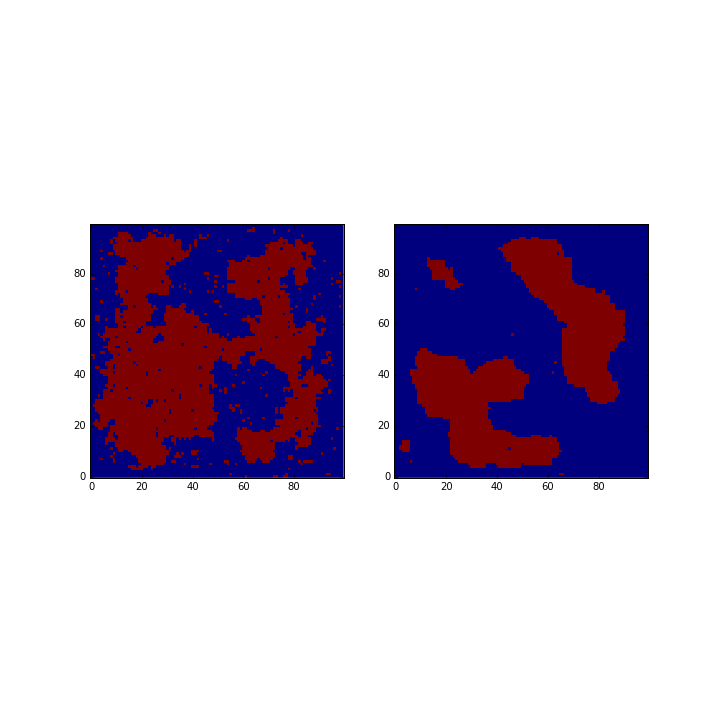
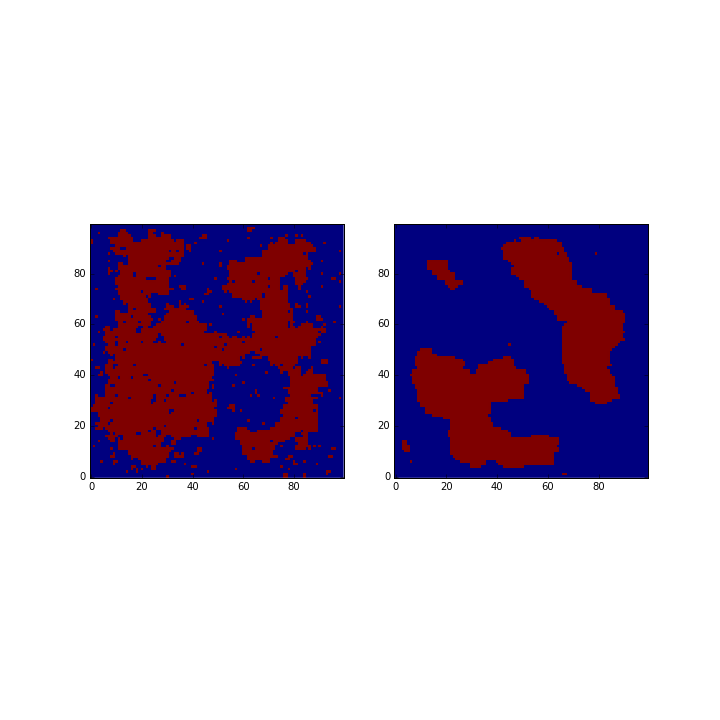
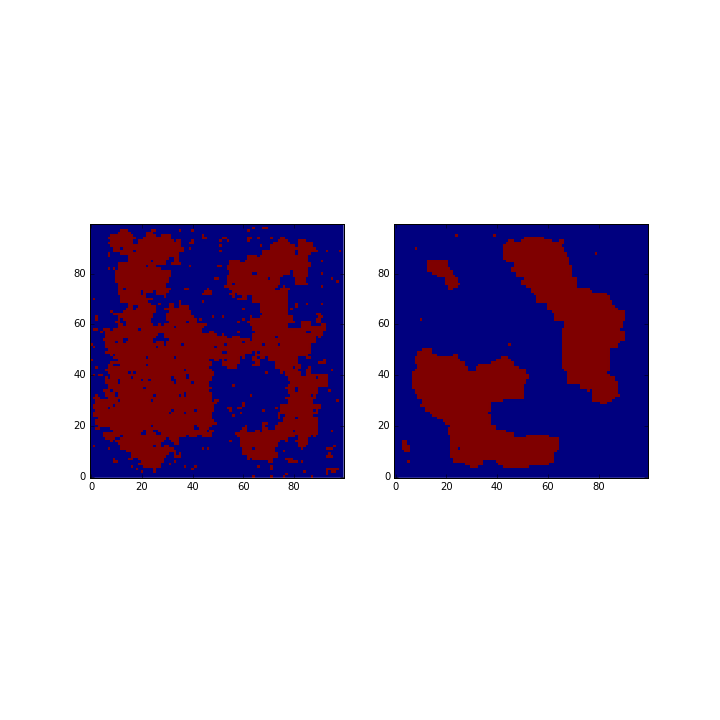
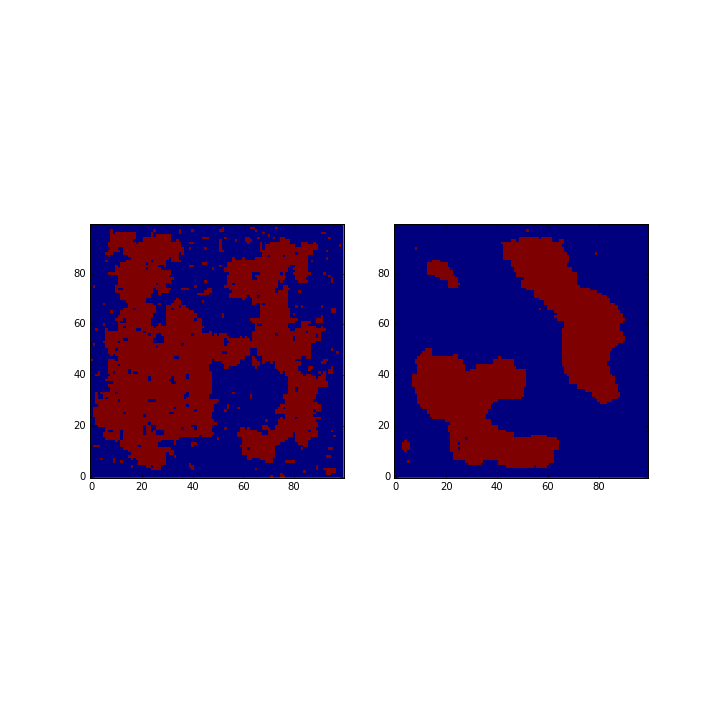
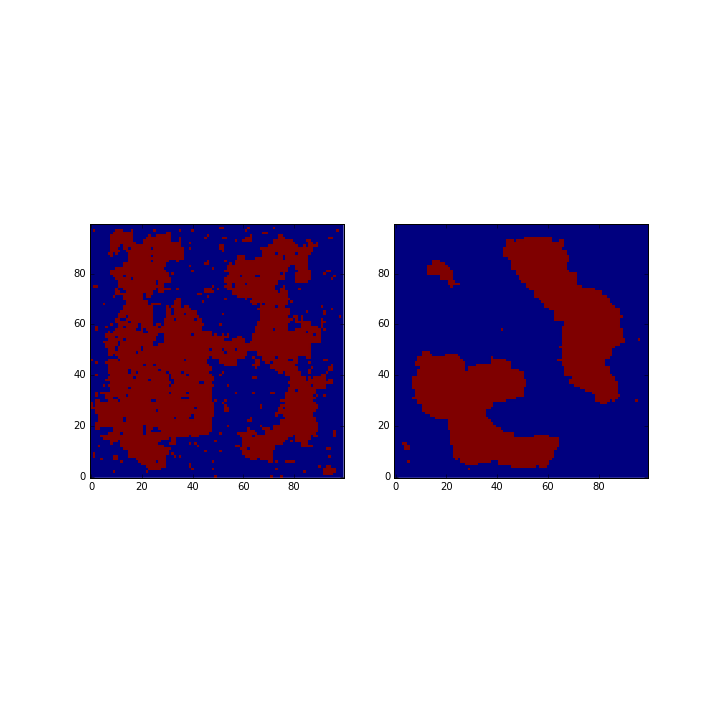
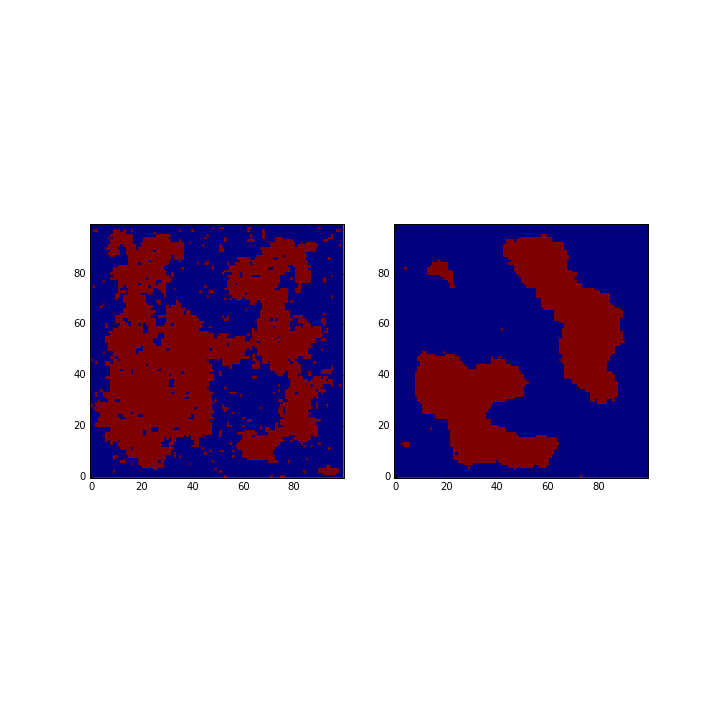

In [47]:
fig = pyplot.figure(figsize=(10,10))
pyplot.subplot(1, 2, 1)
img1 = pyplot.imshow(states_0_5[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

pyplot.subplot(1, 2, 2)
img2 = pyplot.imshow(states_0_9[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

# Animate
def animate(i):
    img1.set_array(states_0_5[i])
    img2.set_array(states_0_9[i])

animation.FuncAnimation(fig, animate, frames=NMC, interval=200)


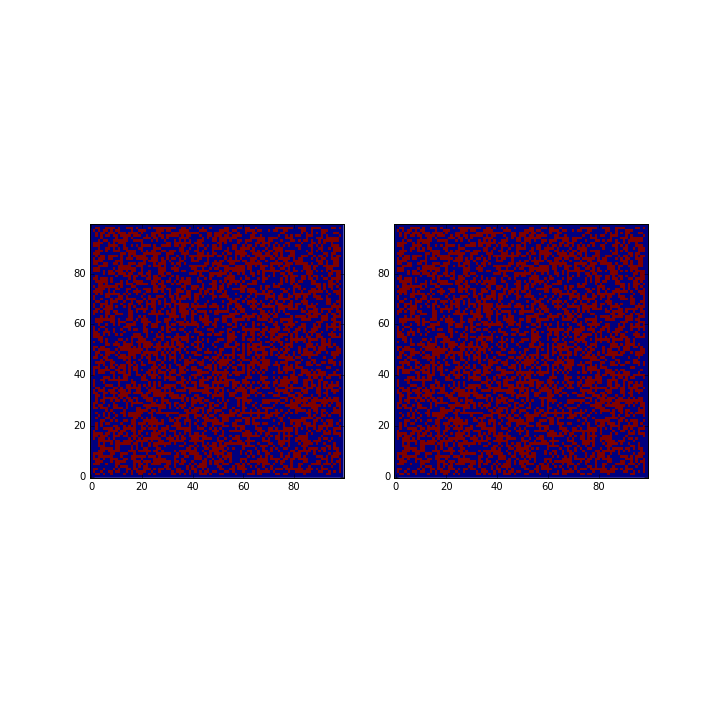
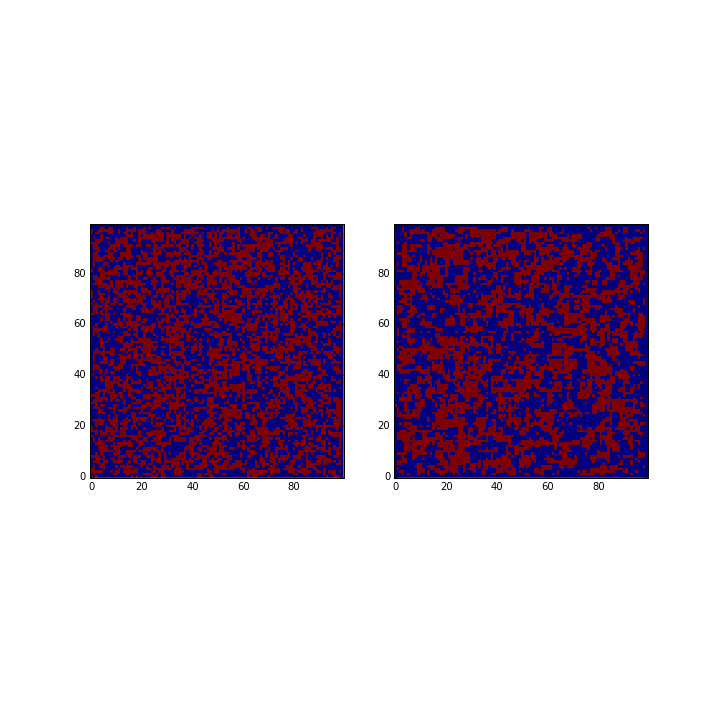
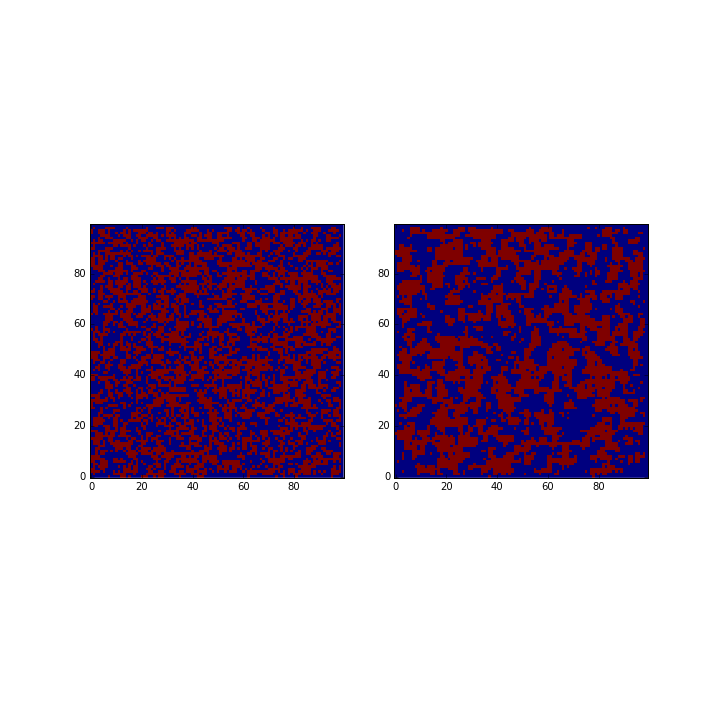
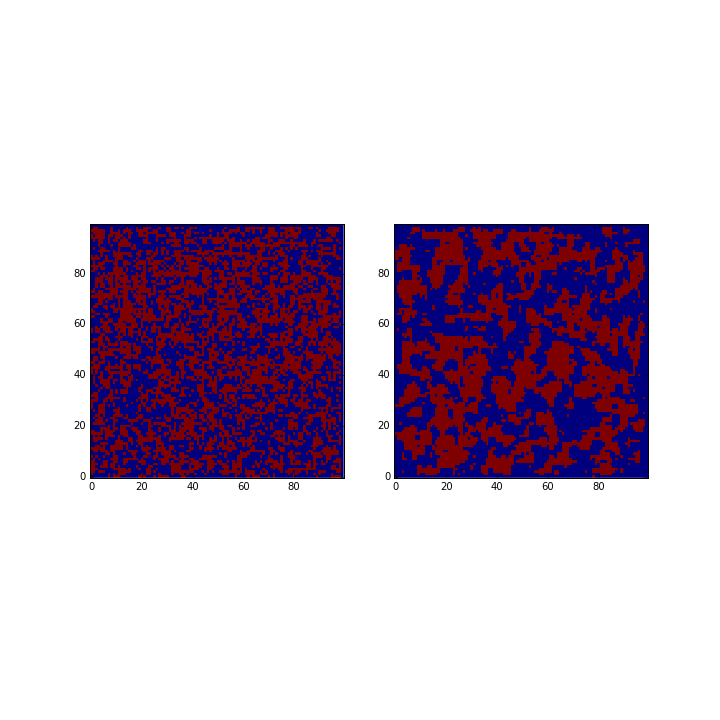
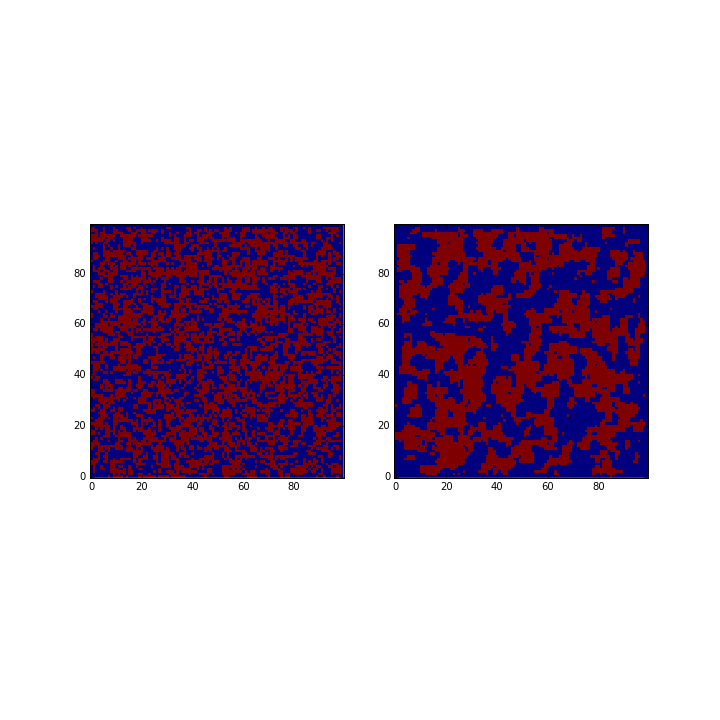
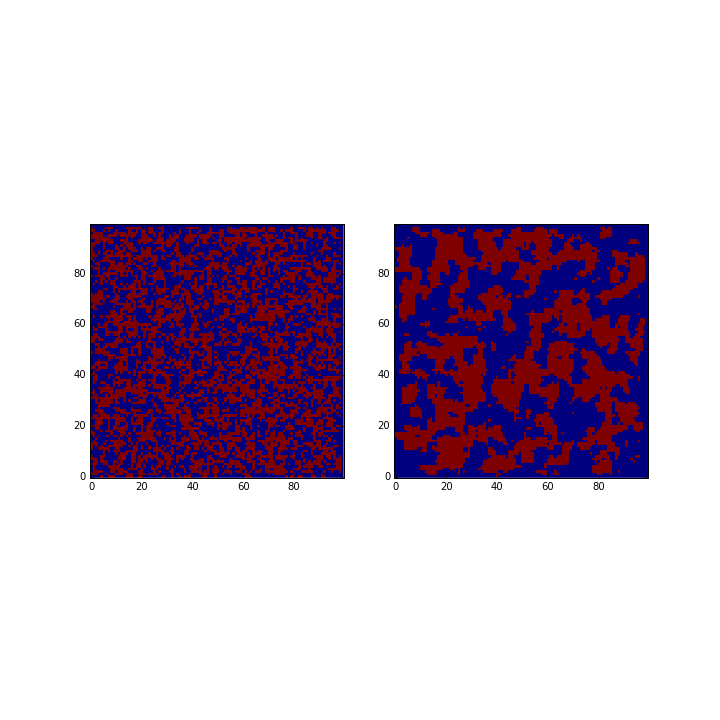
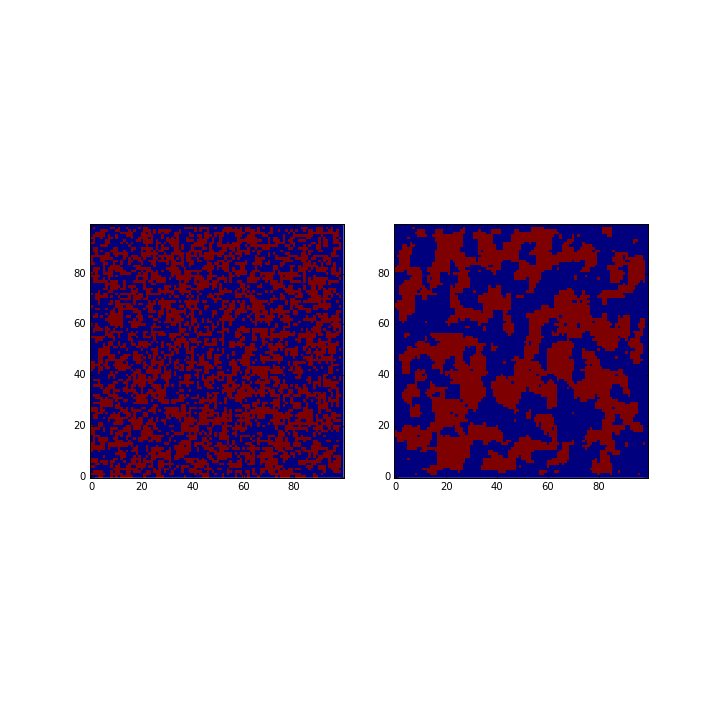
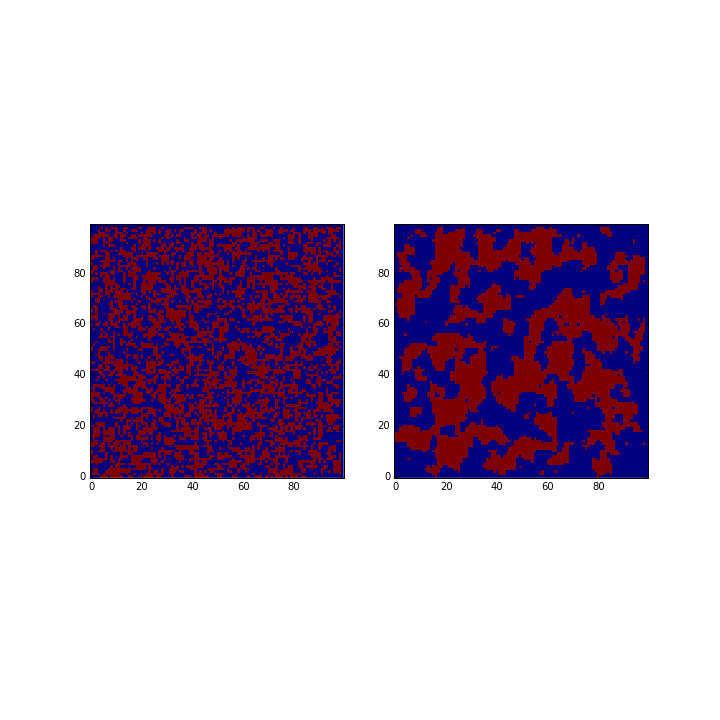
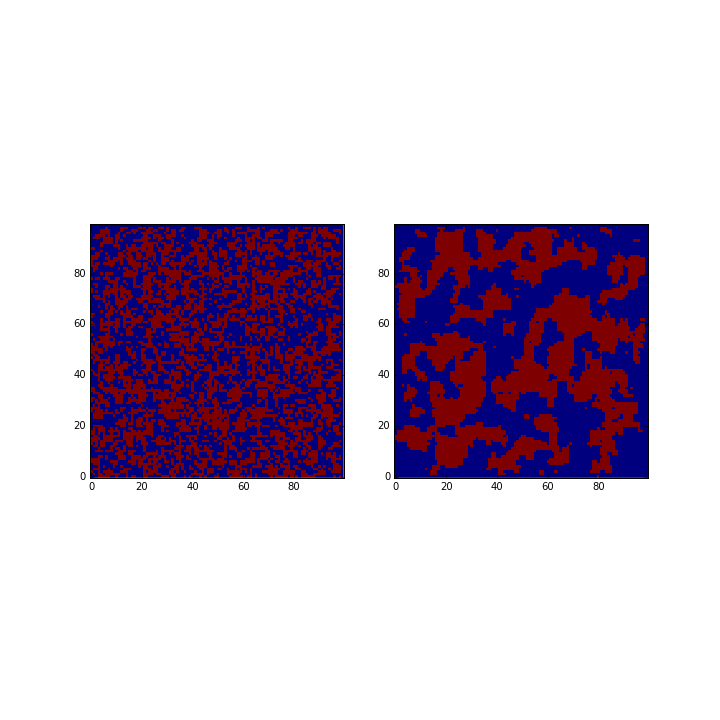
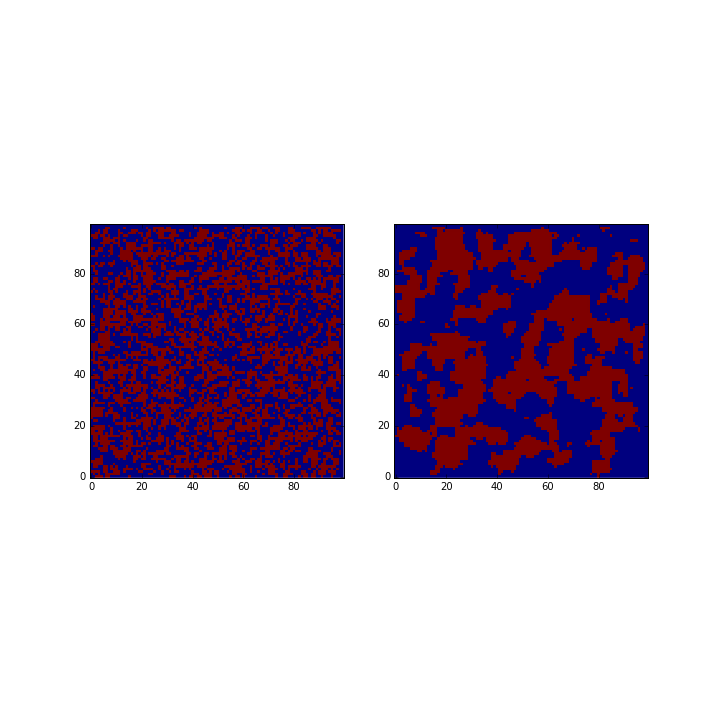
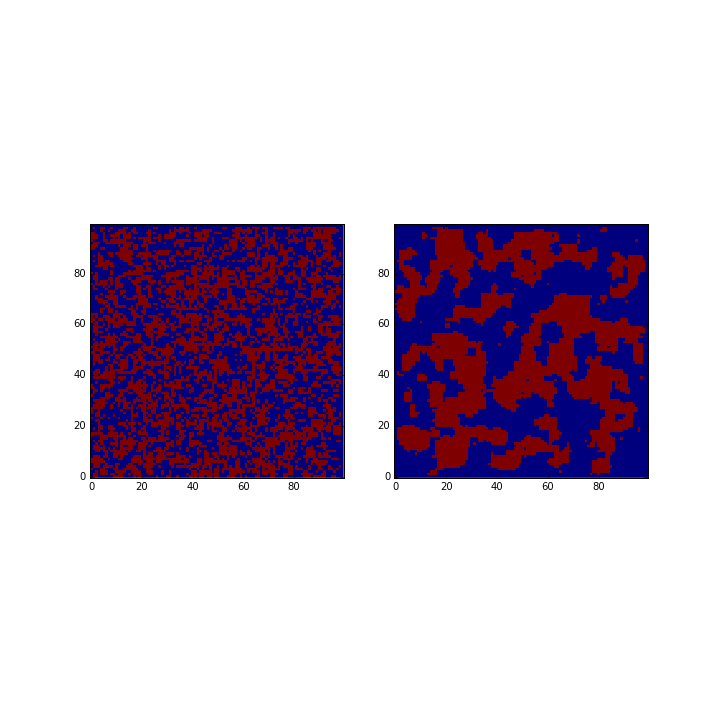
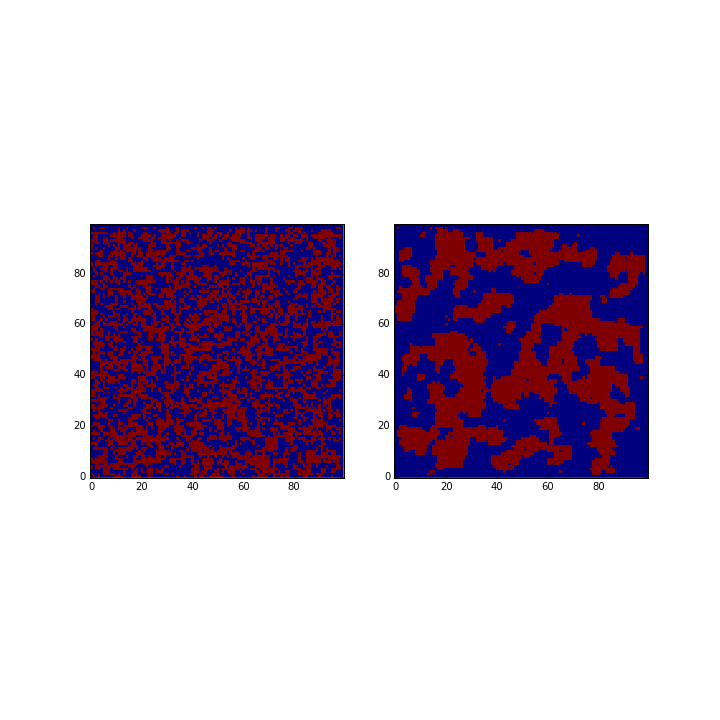
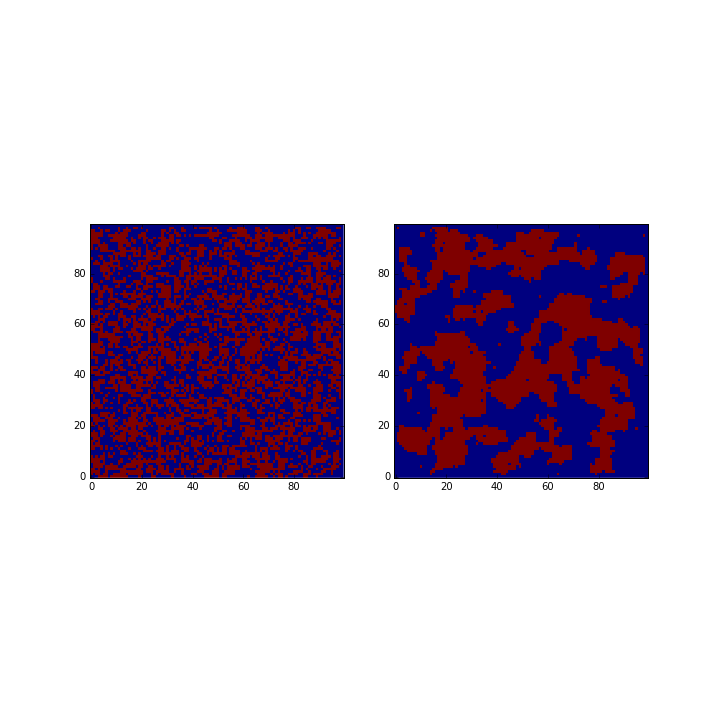
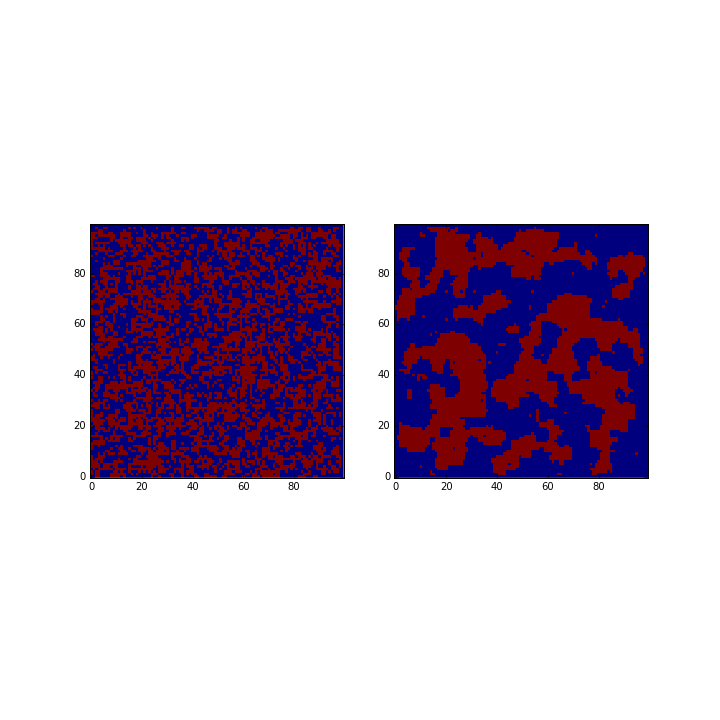
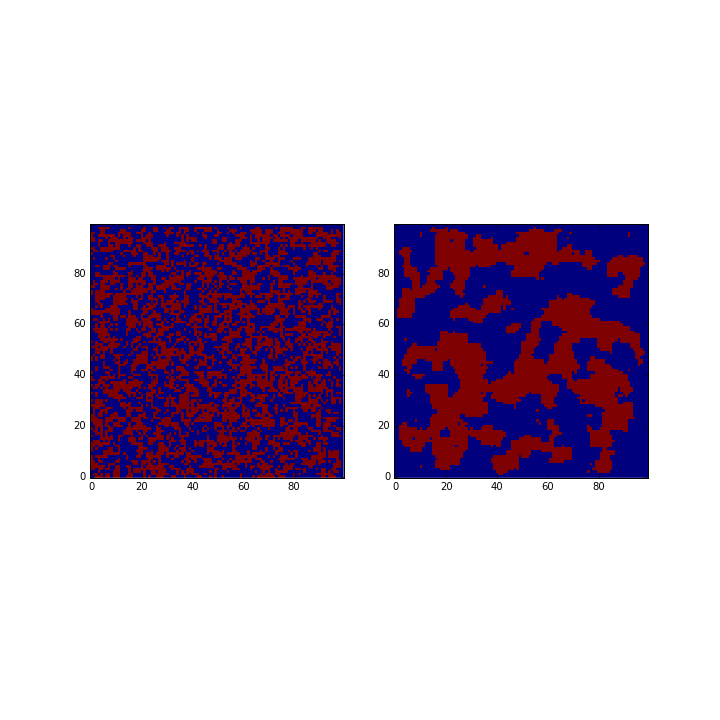
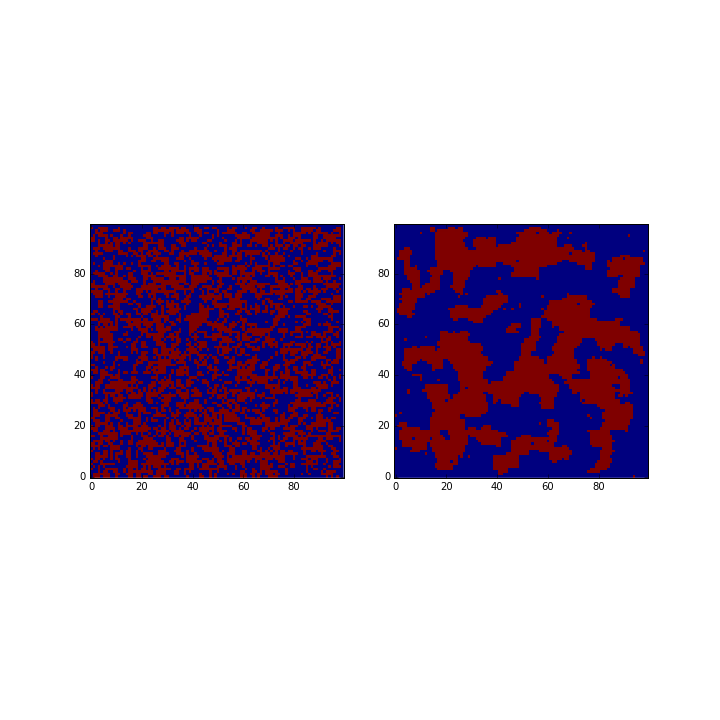
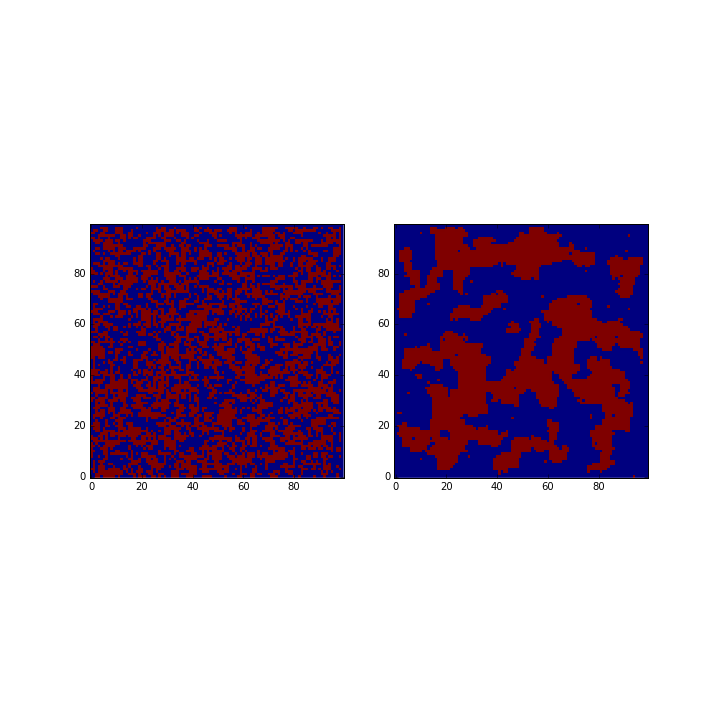
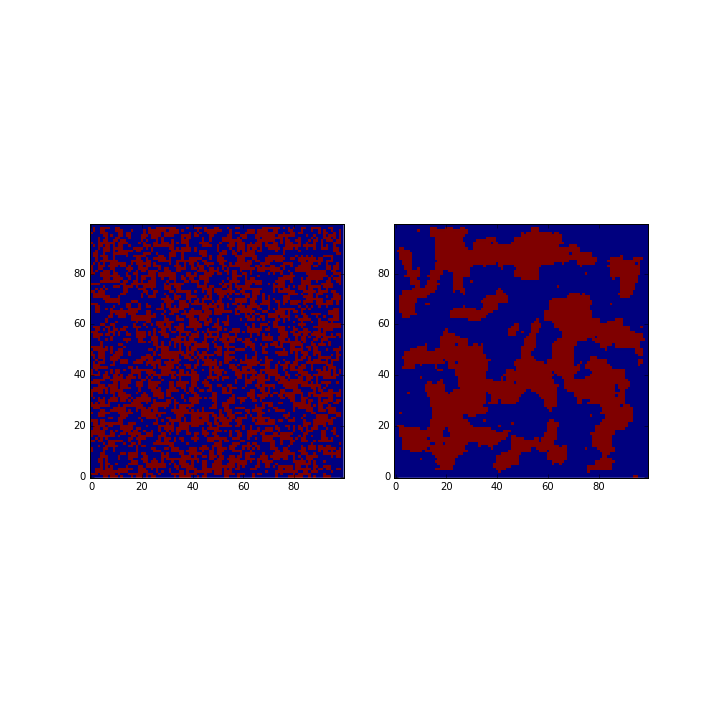
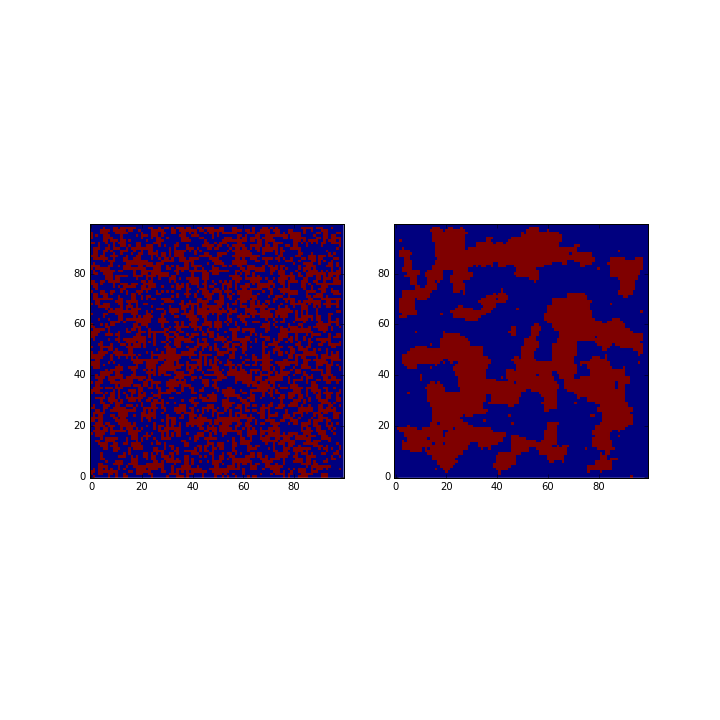
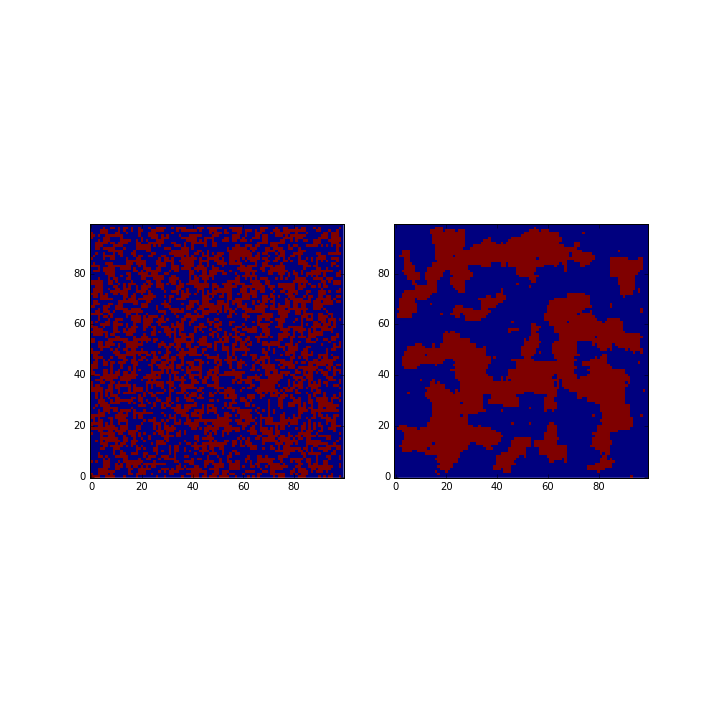
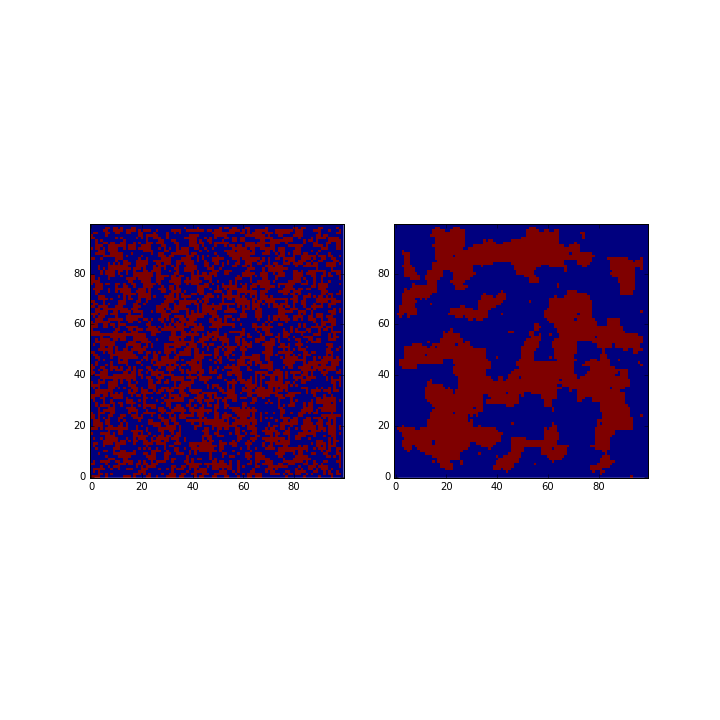
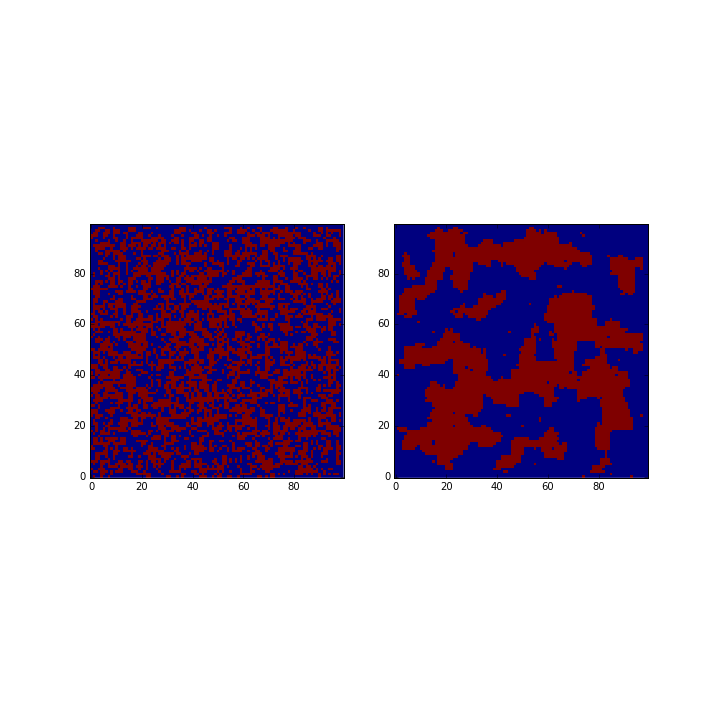
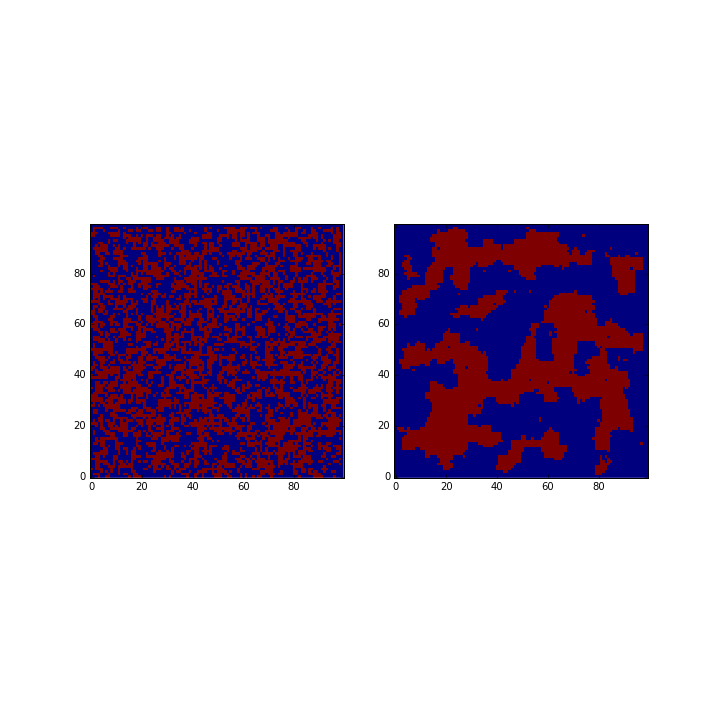
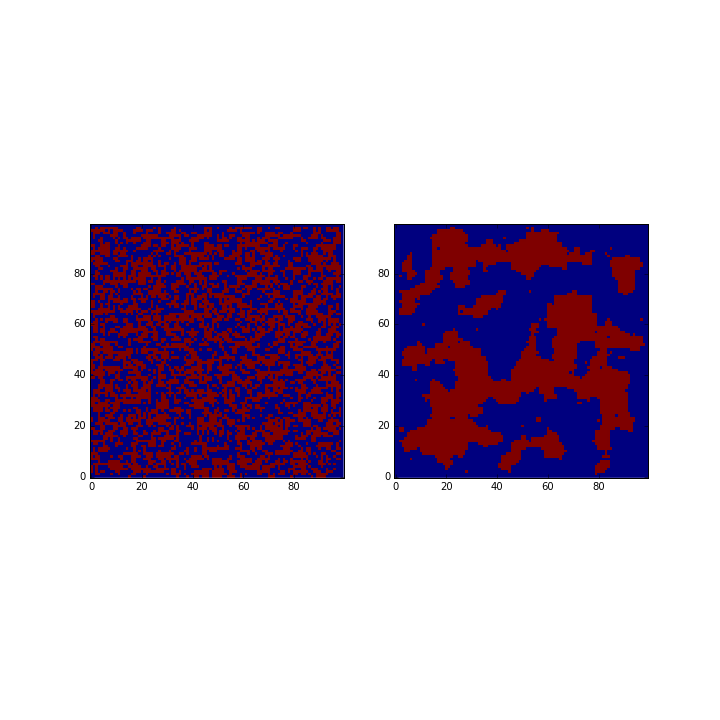
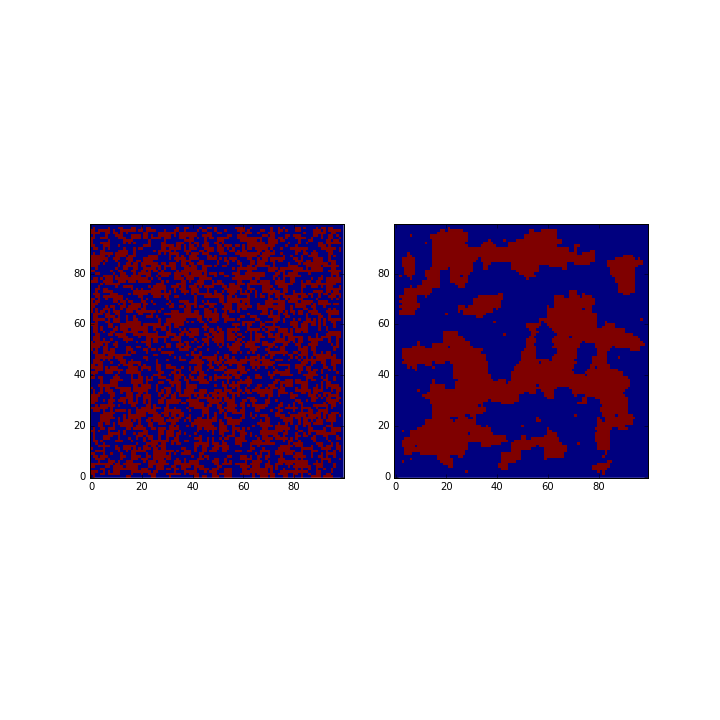
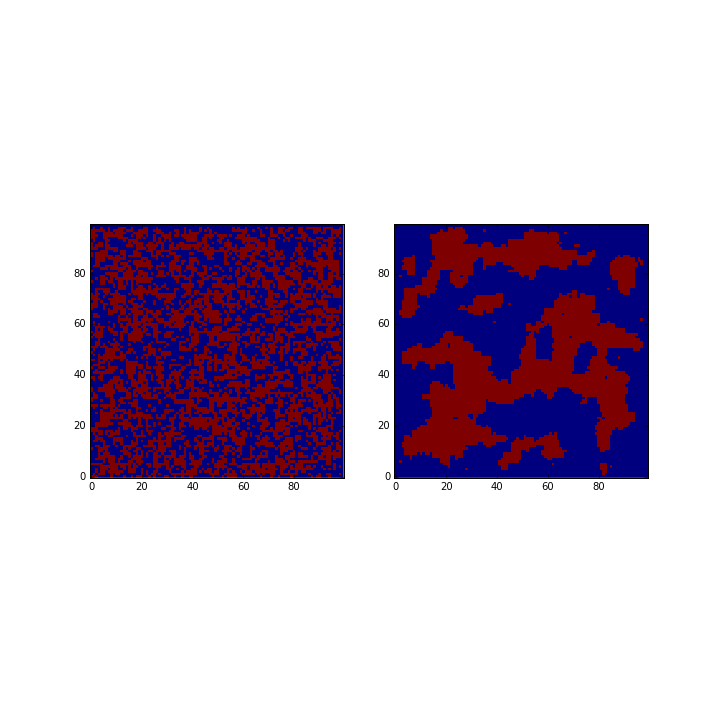
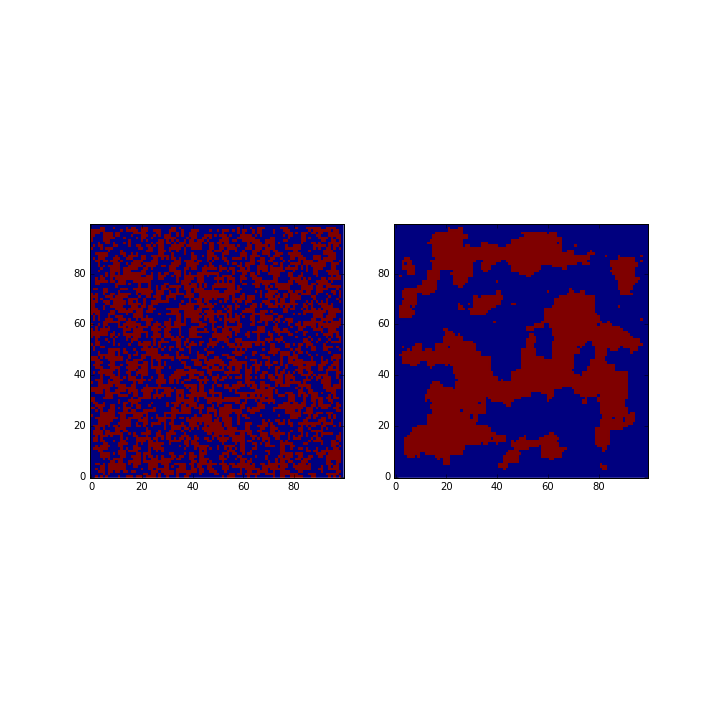
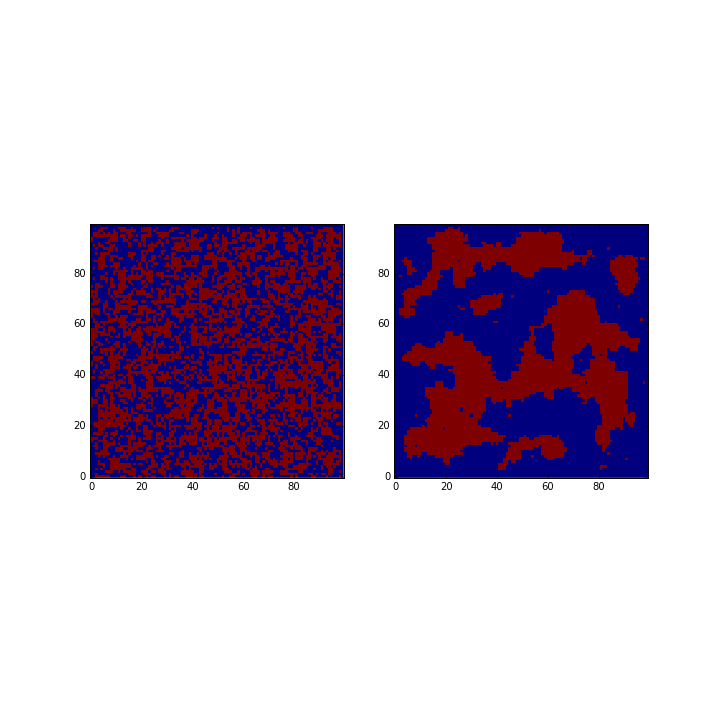
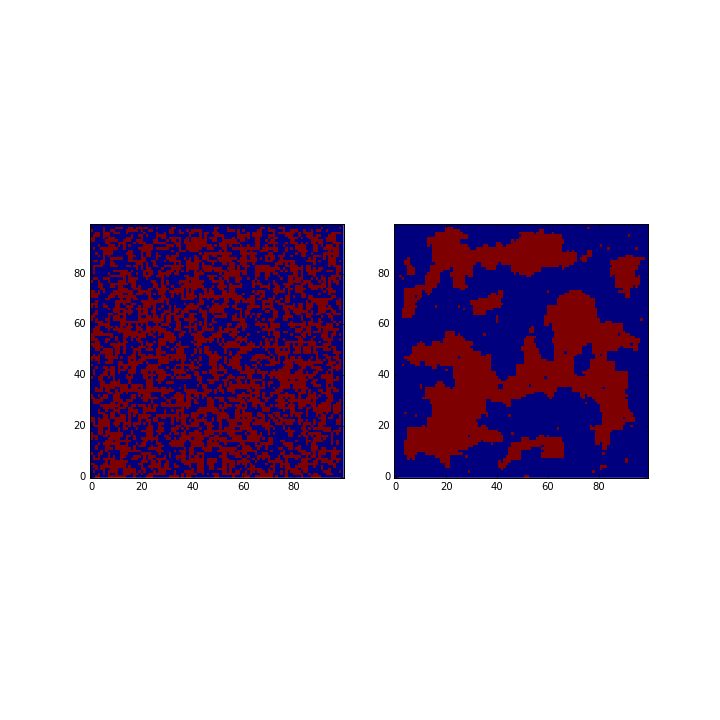
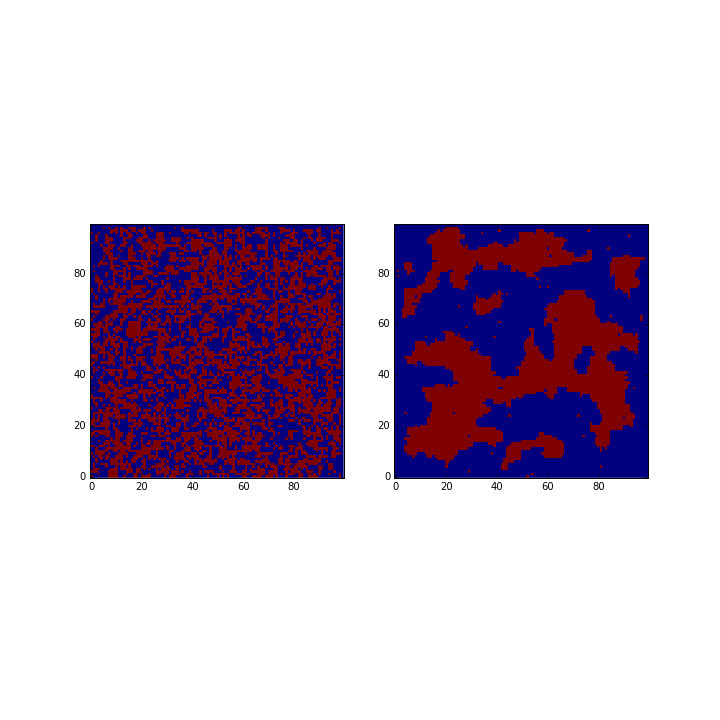
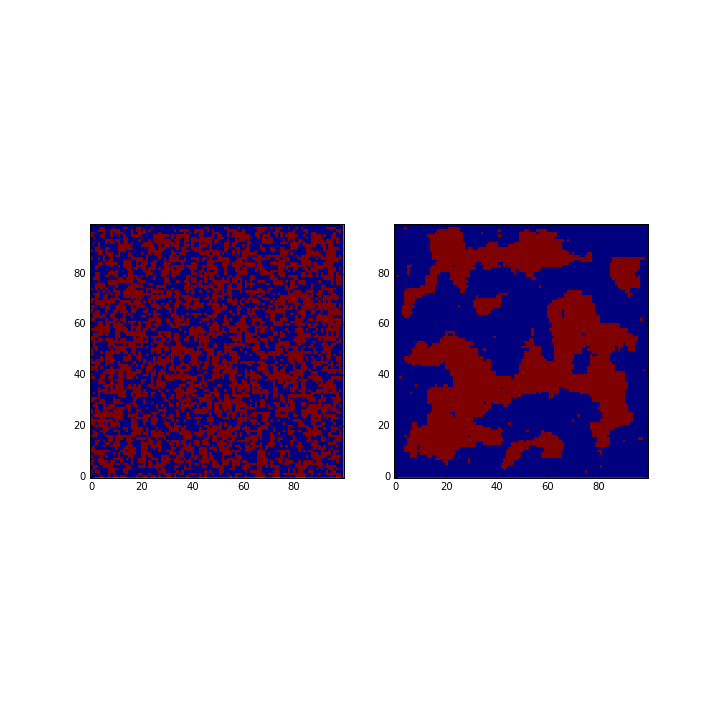
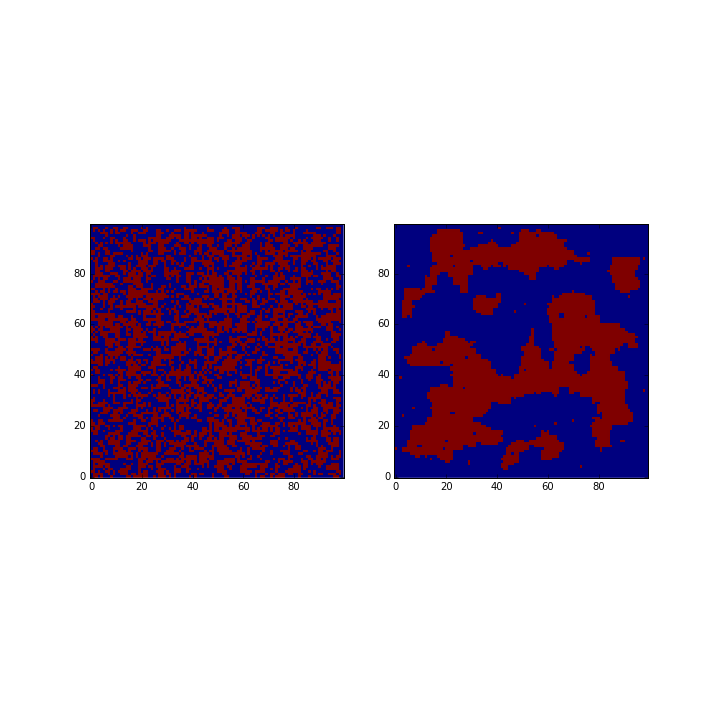
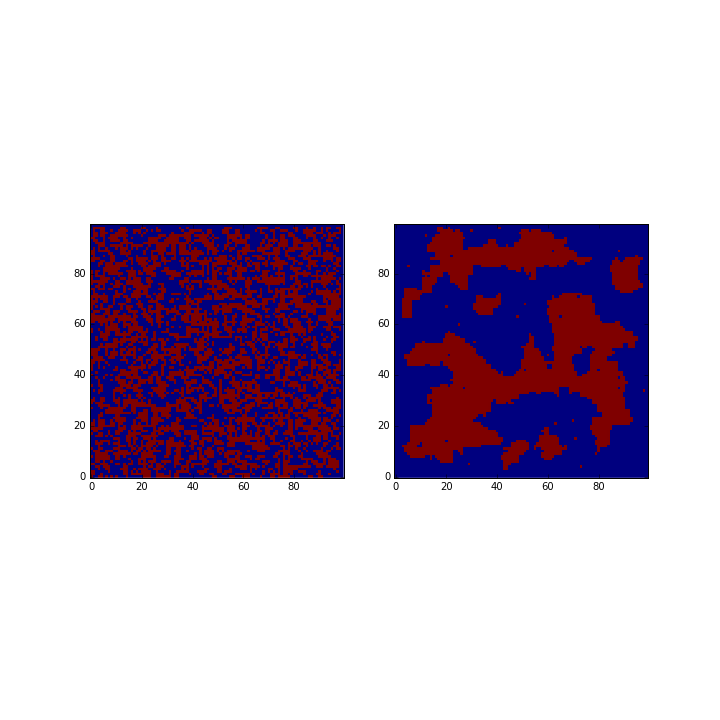
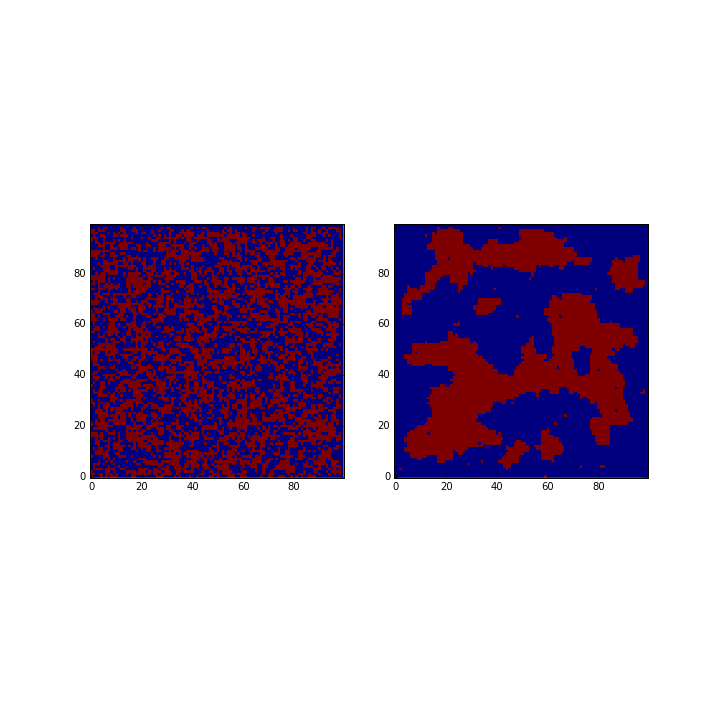
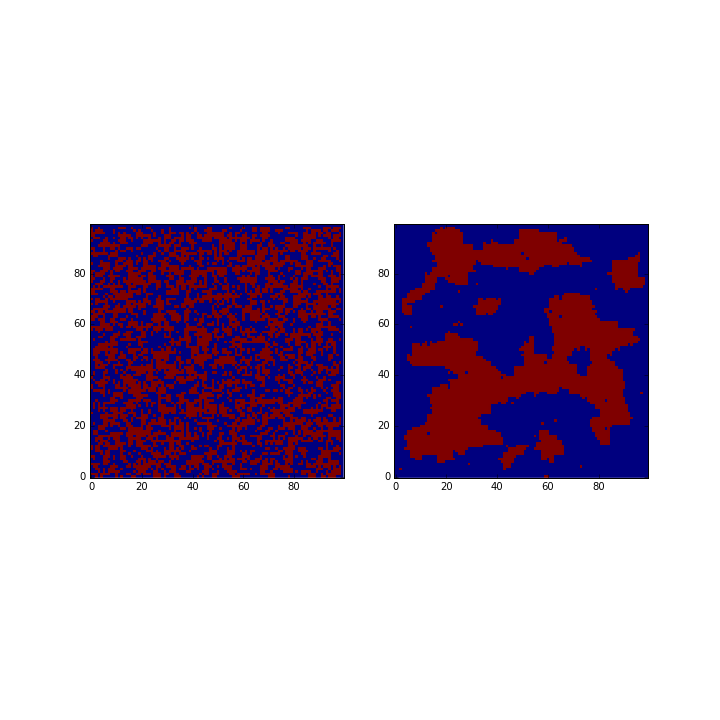
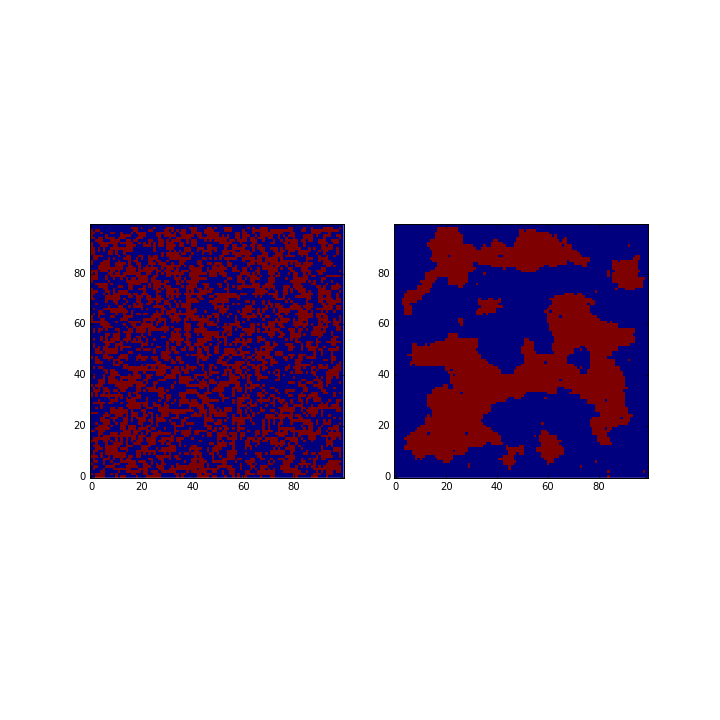
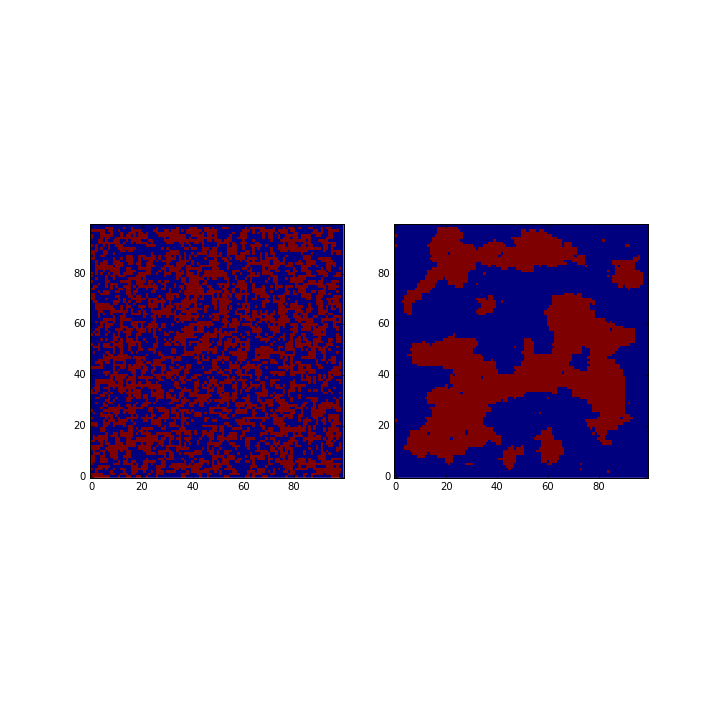
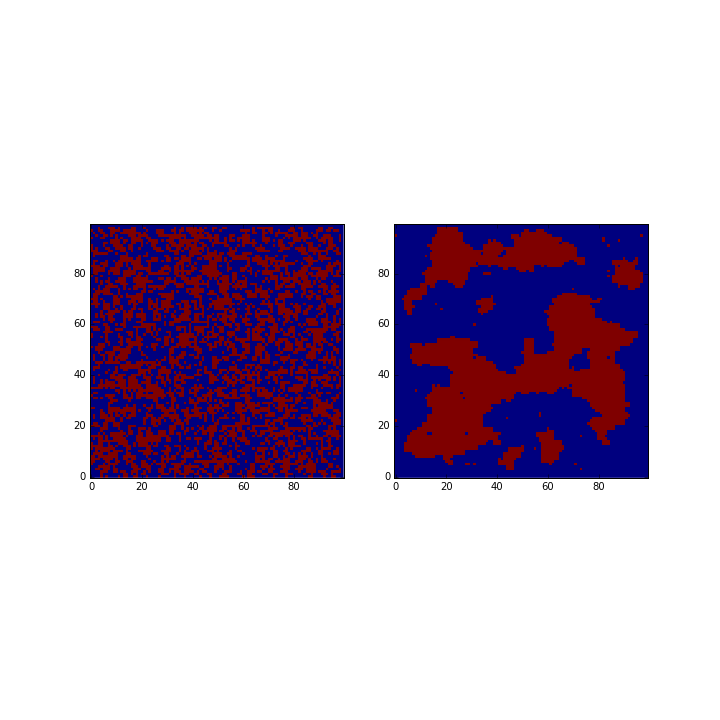
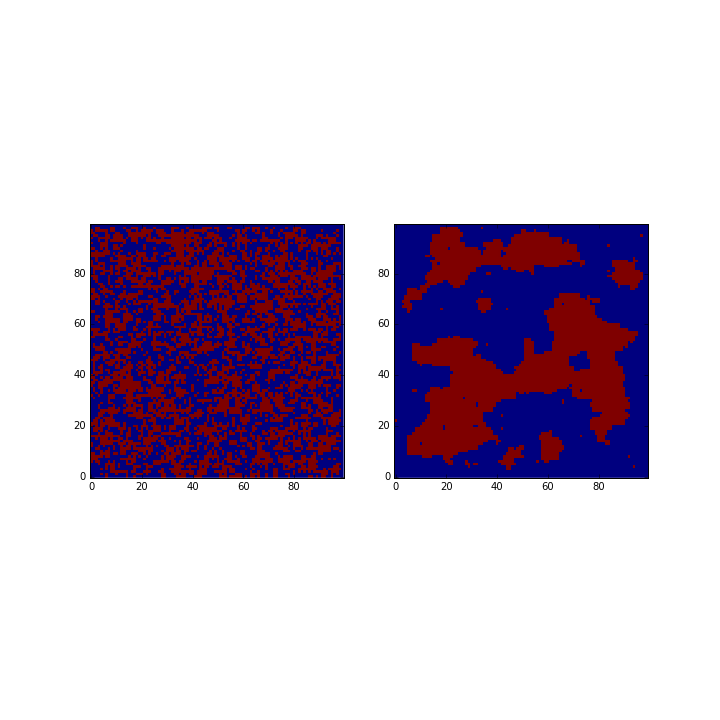
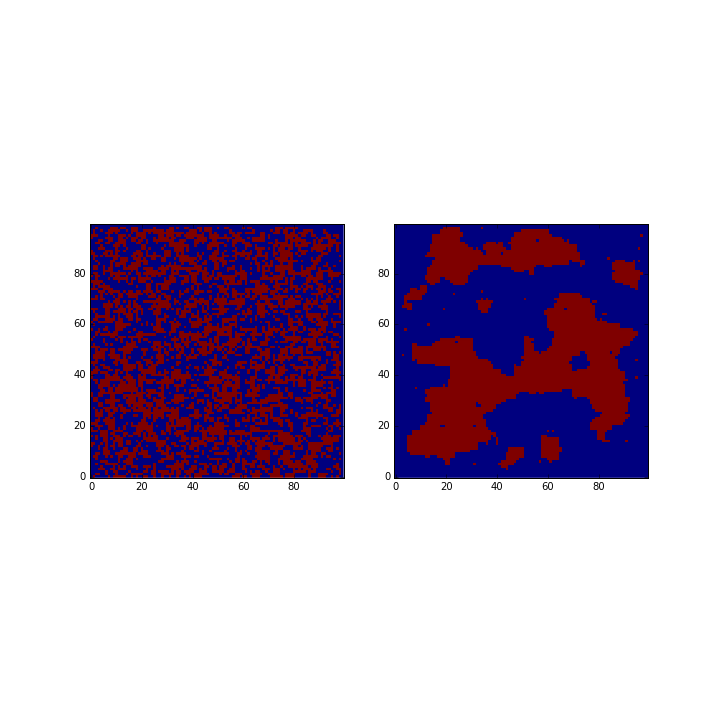
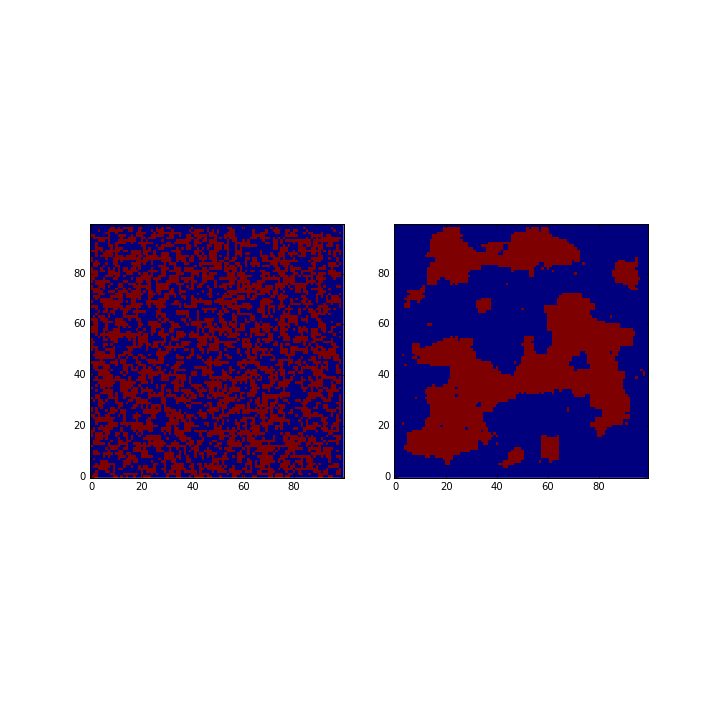
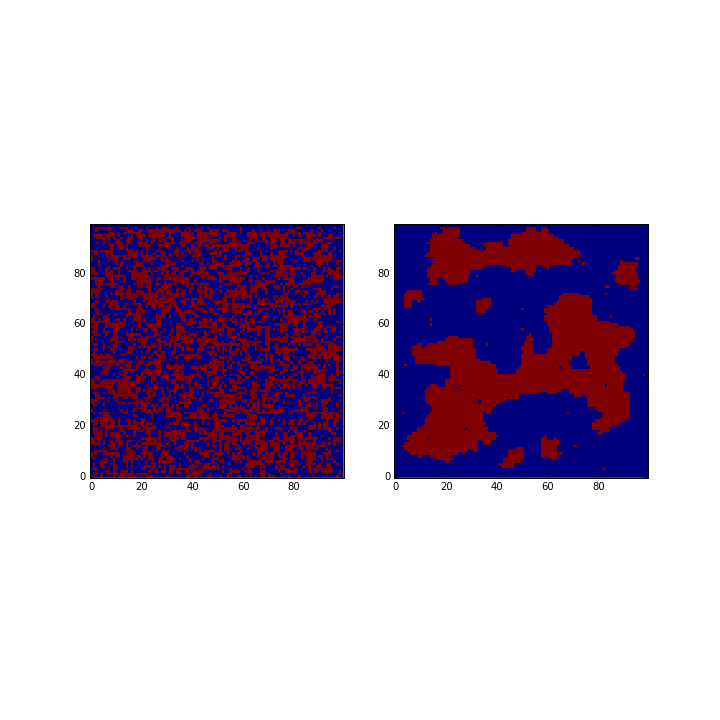
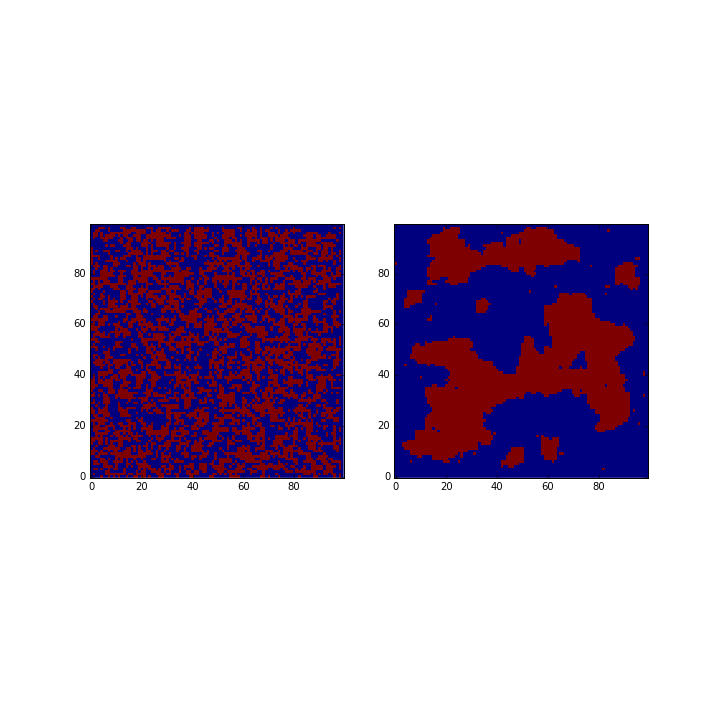
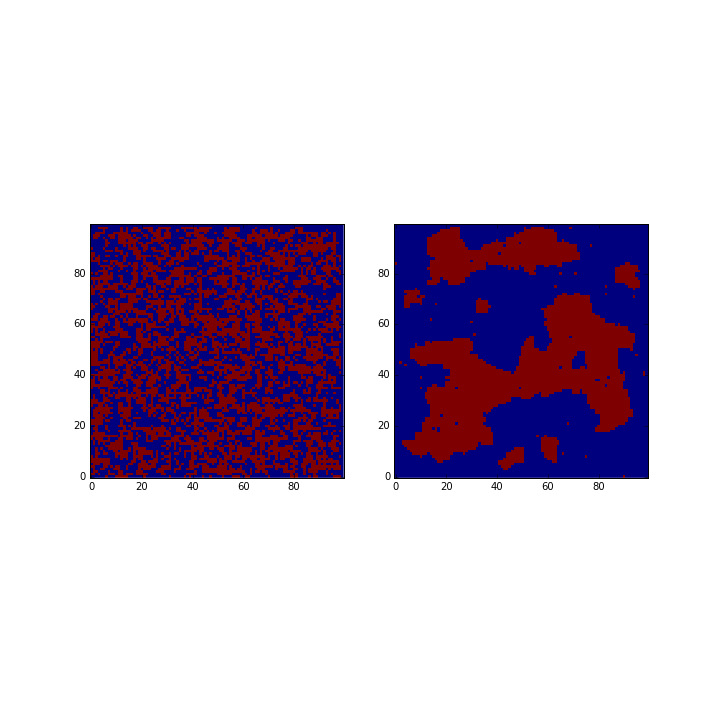
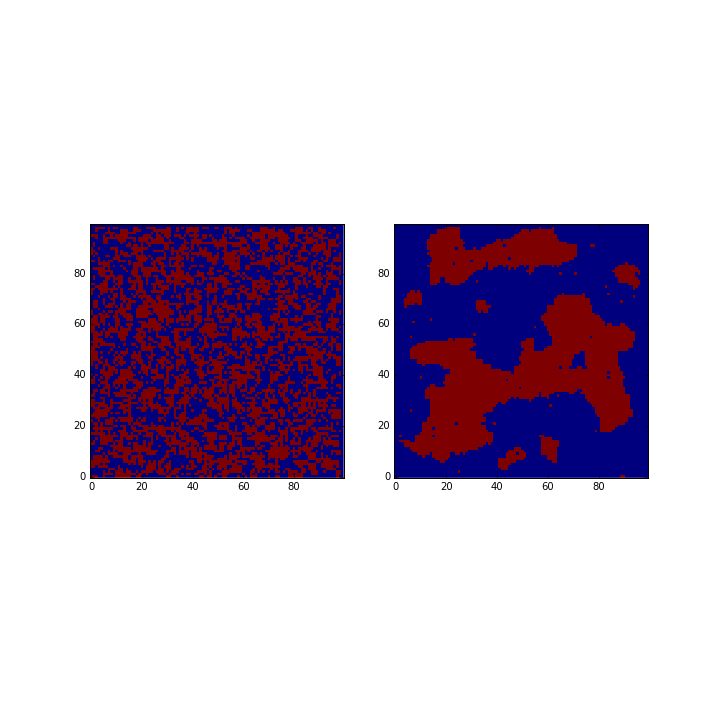
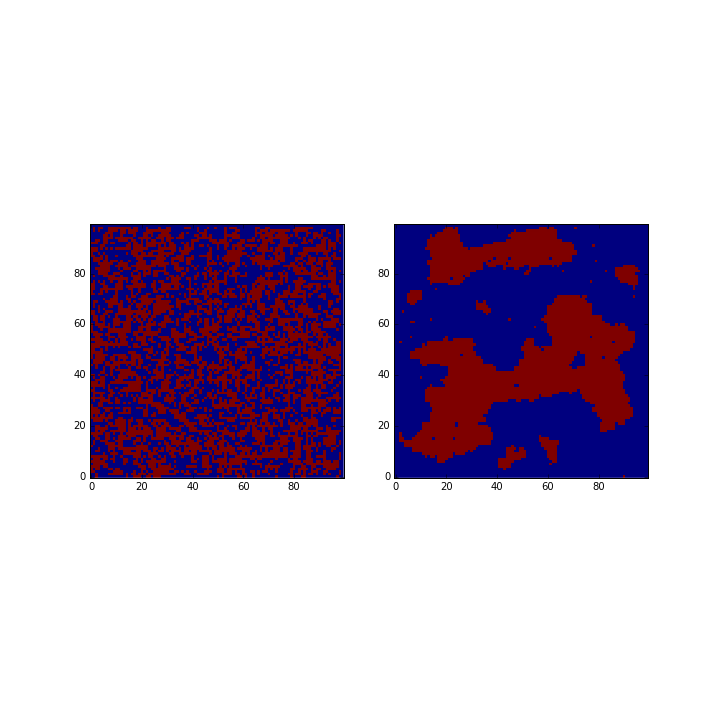
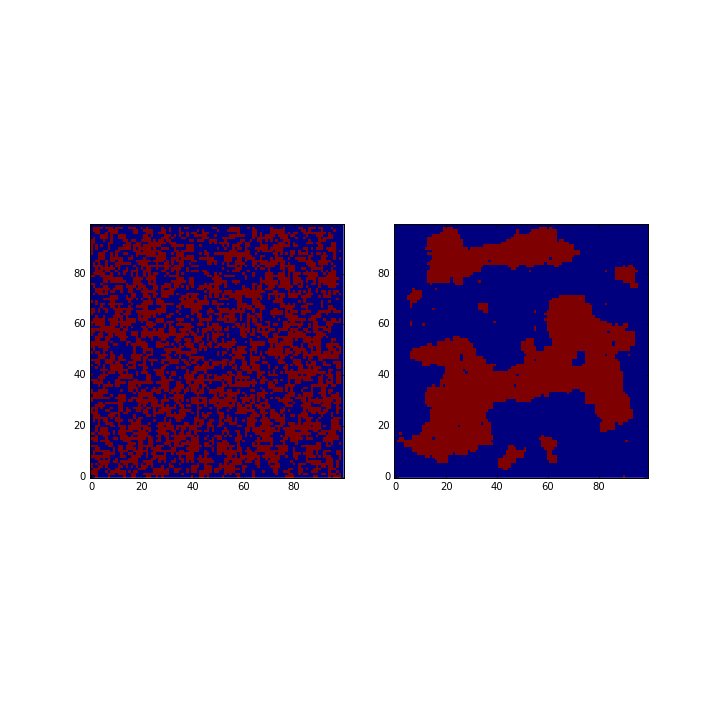
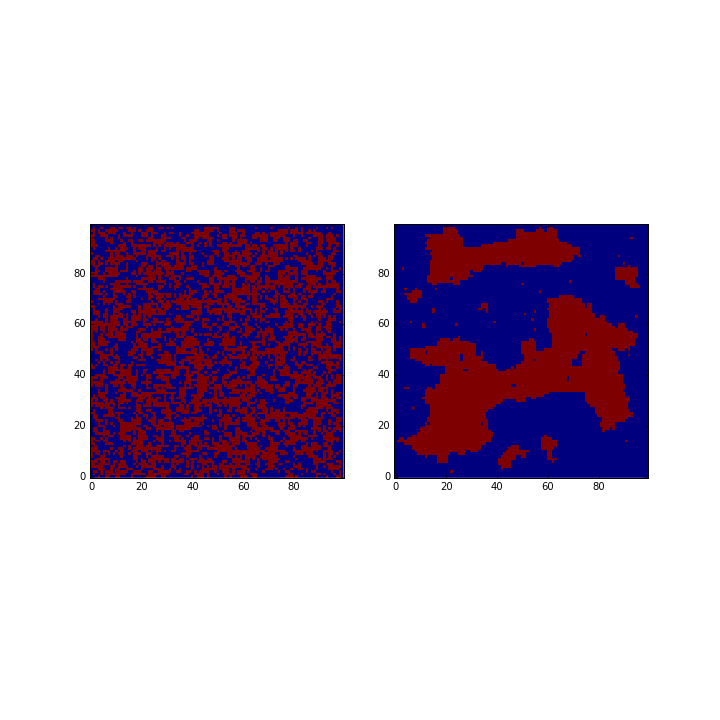
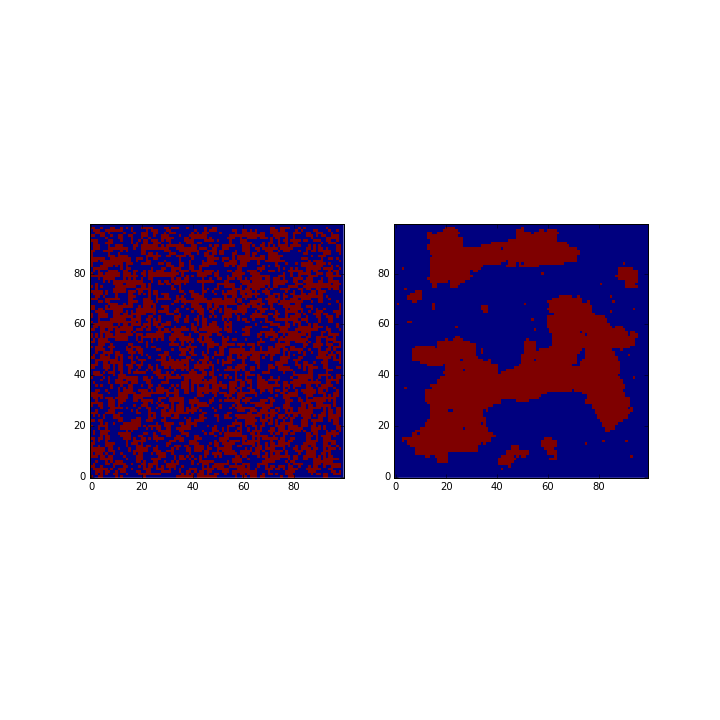
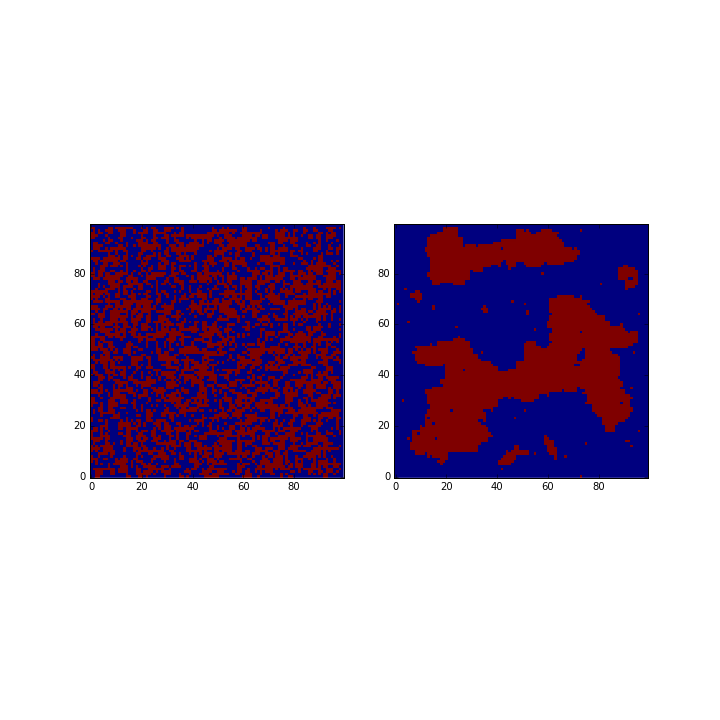
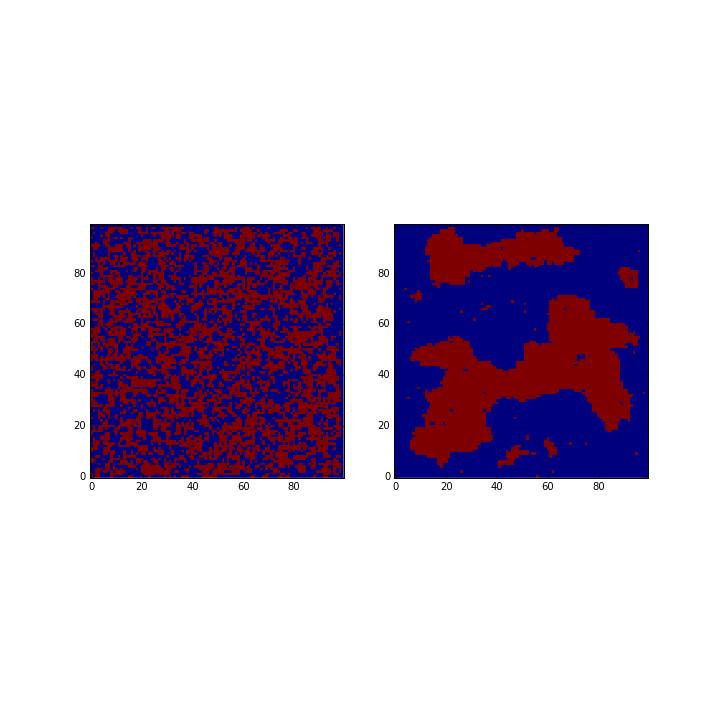
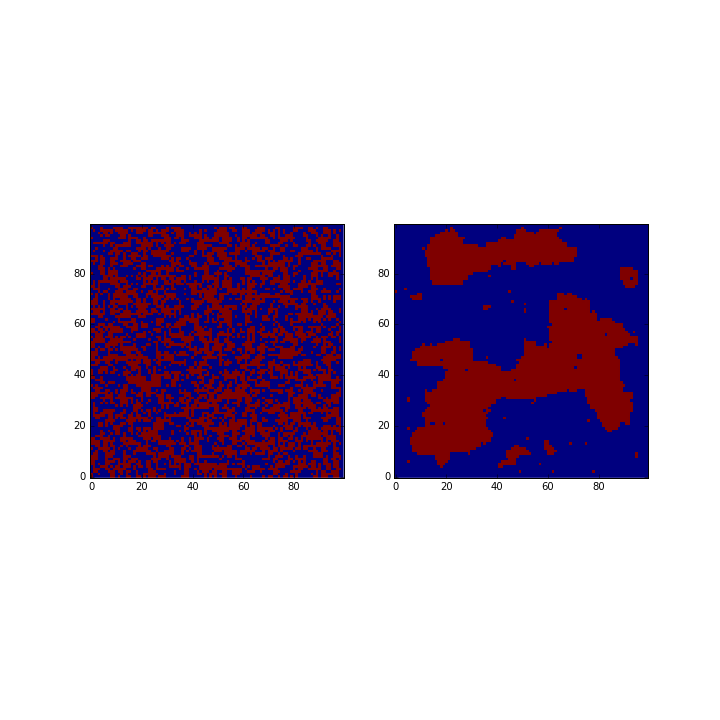
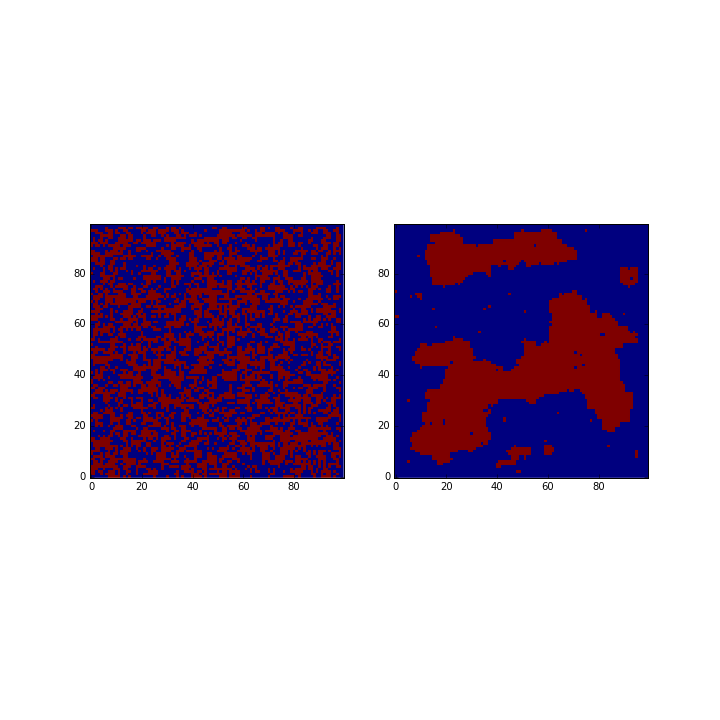
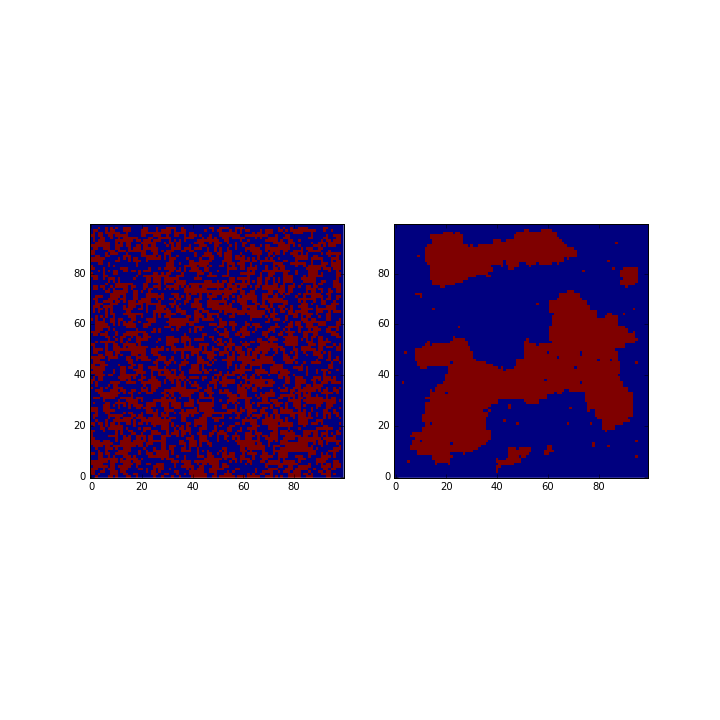
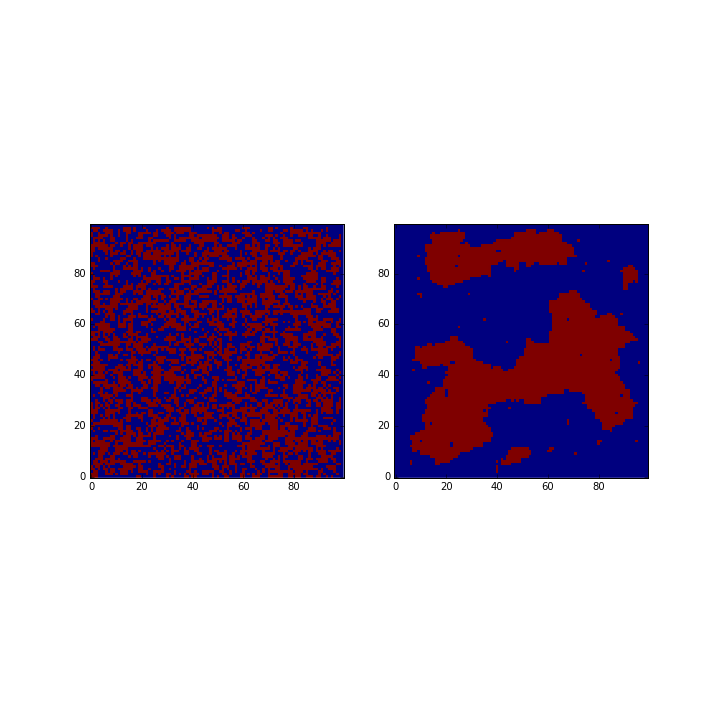
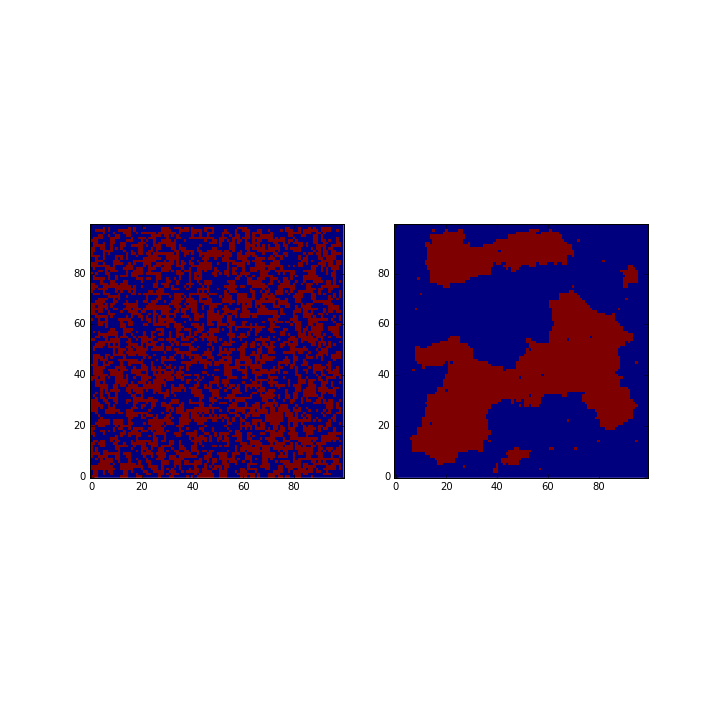
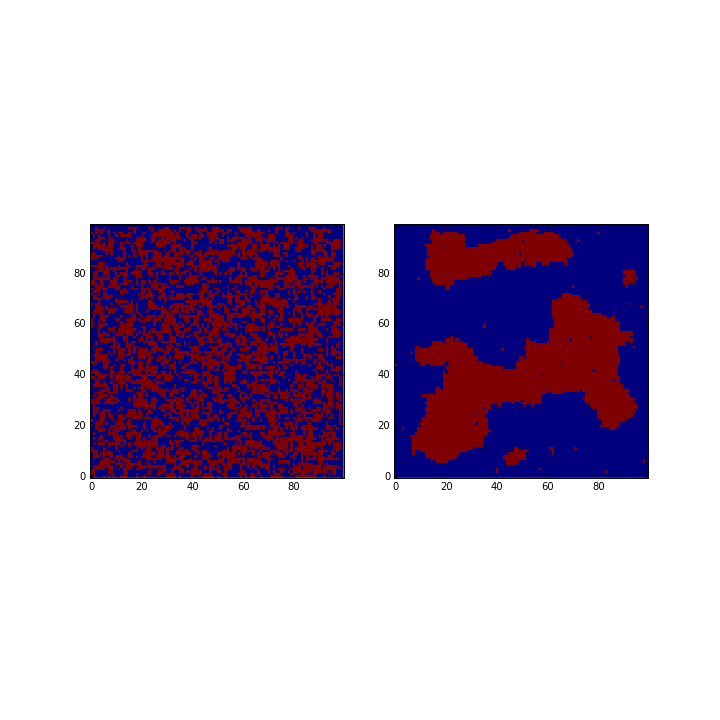
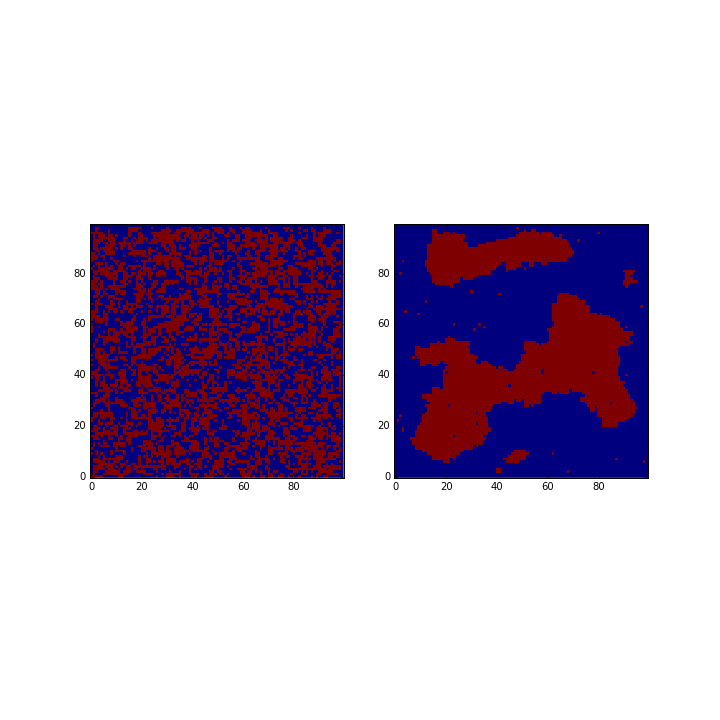
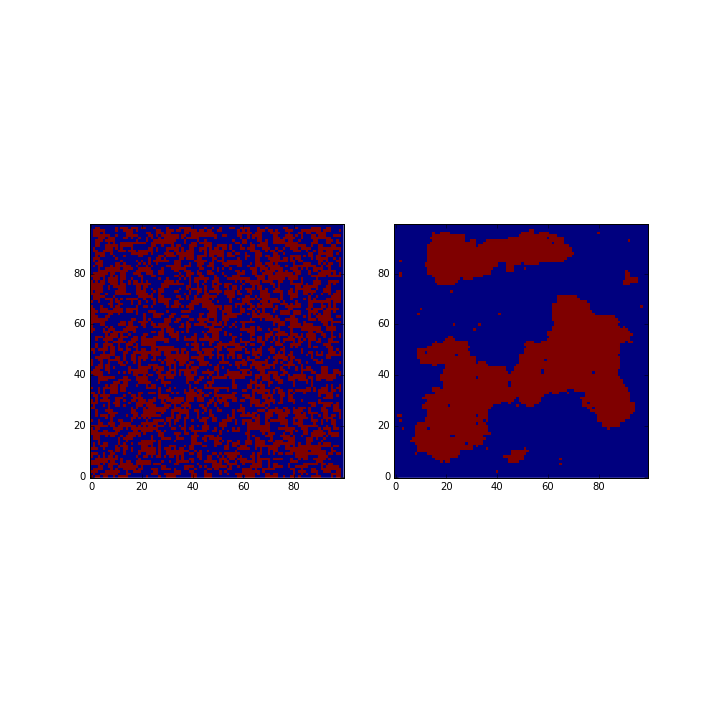
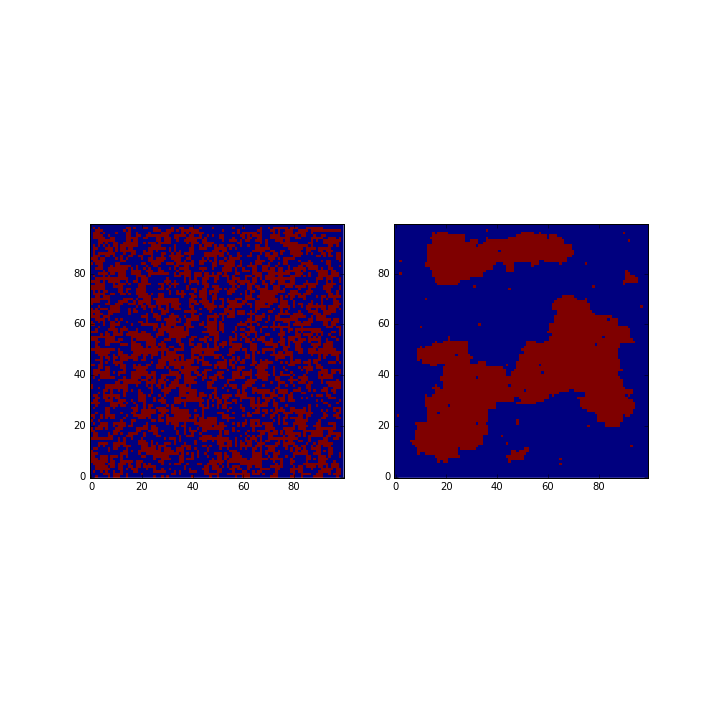
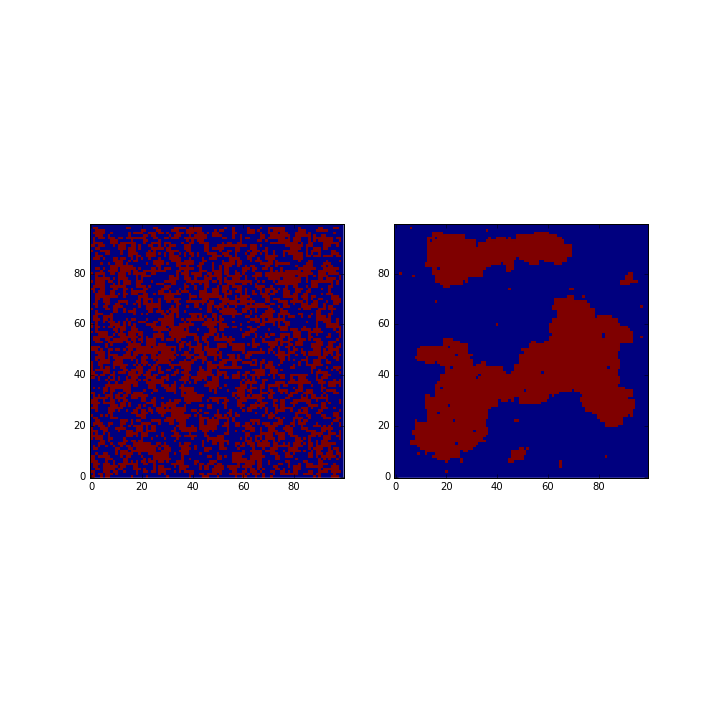
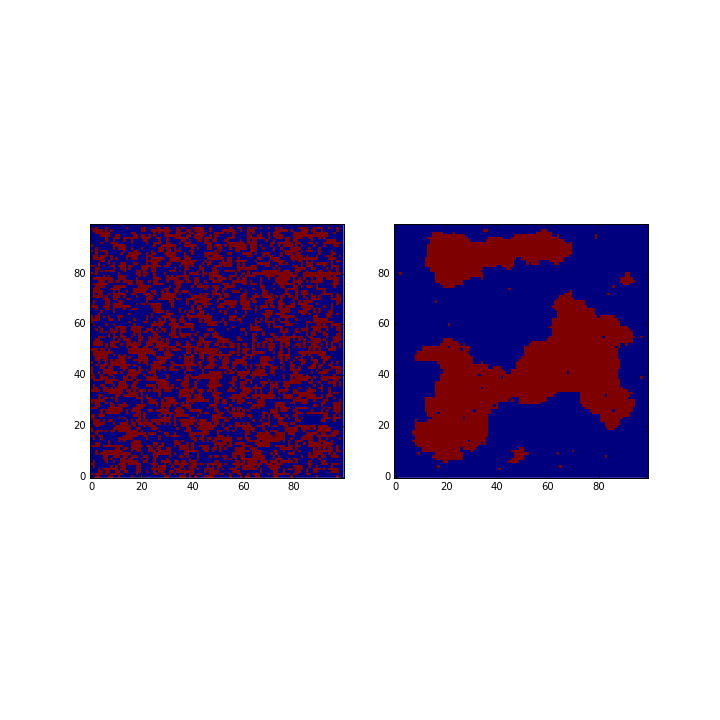
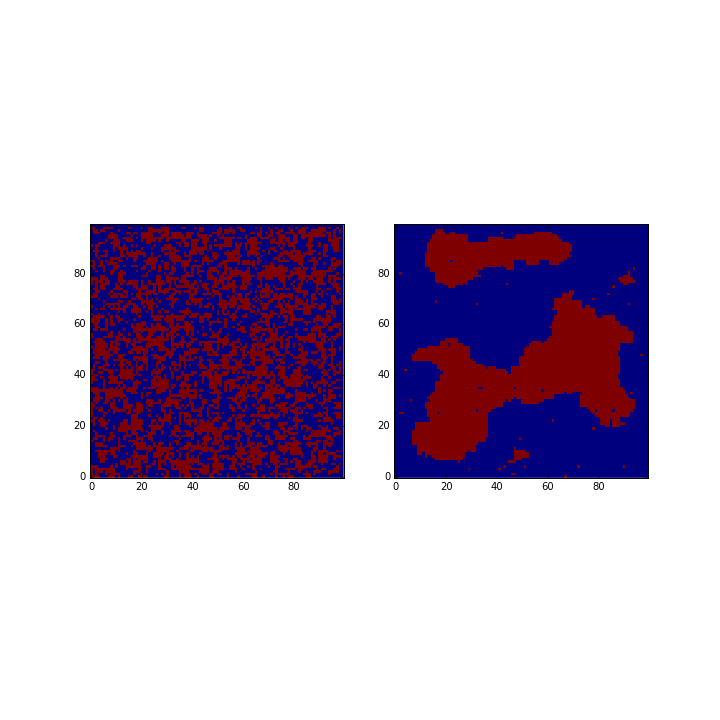
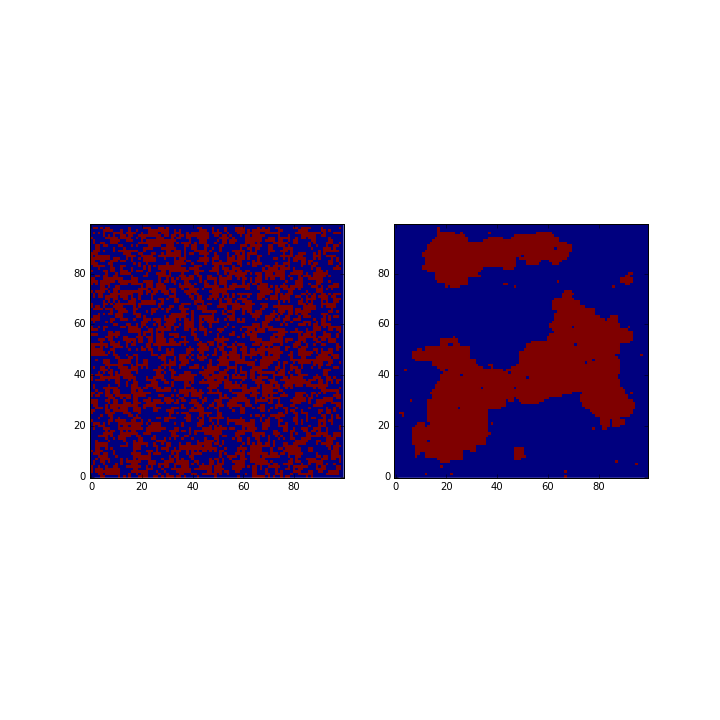
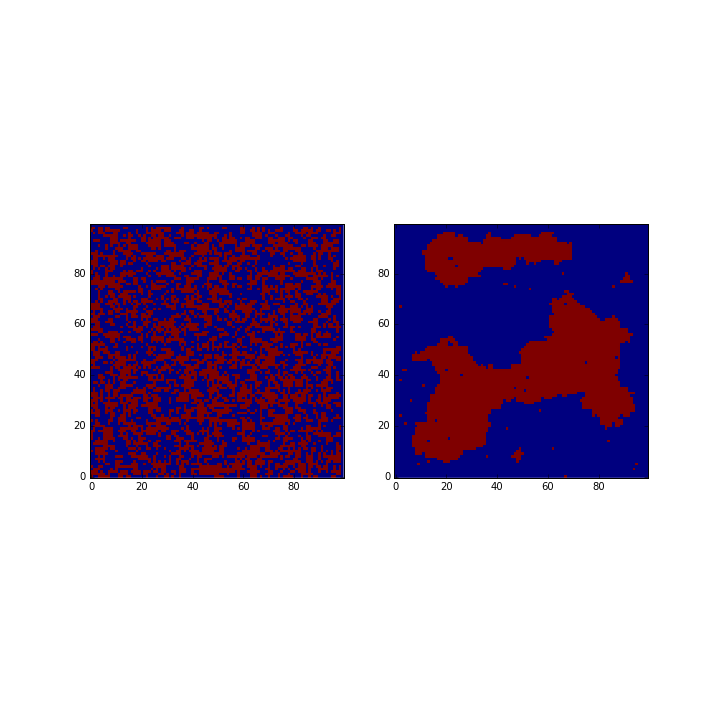
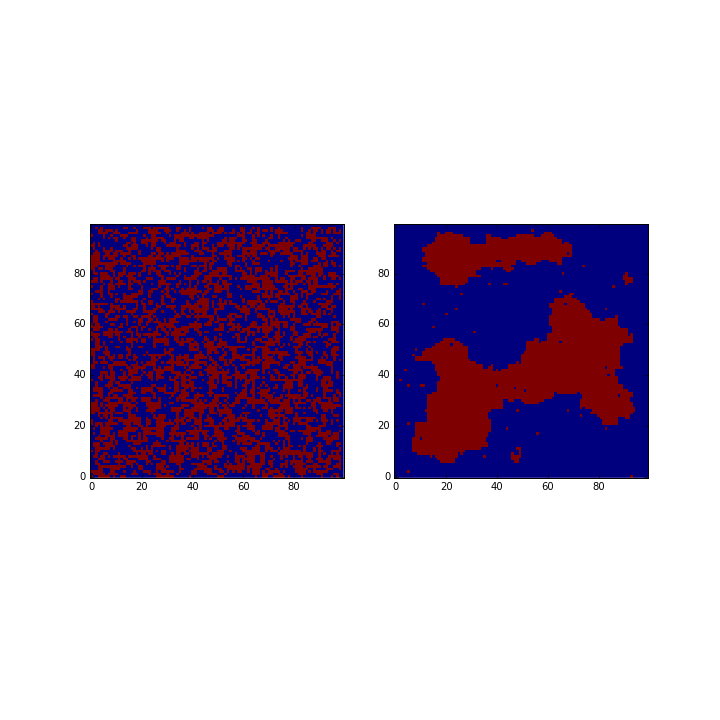
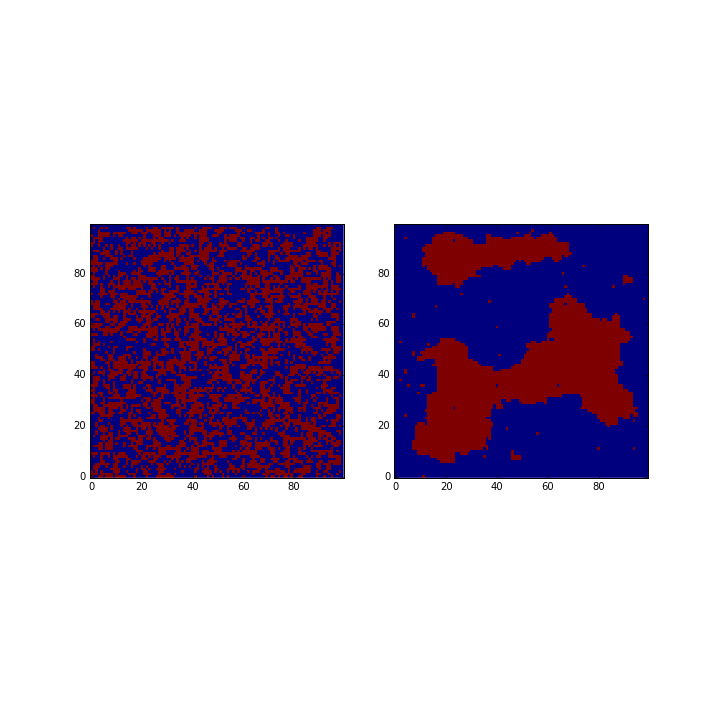
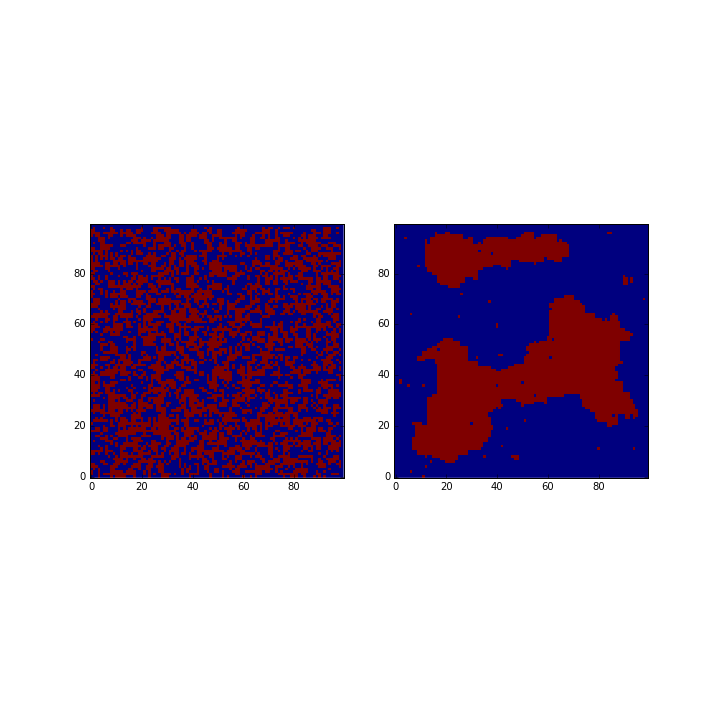
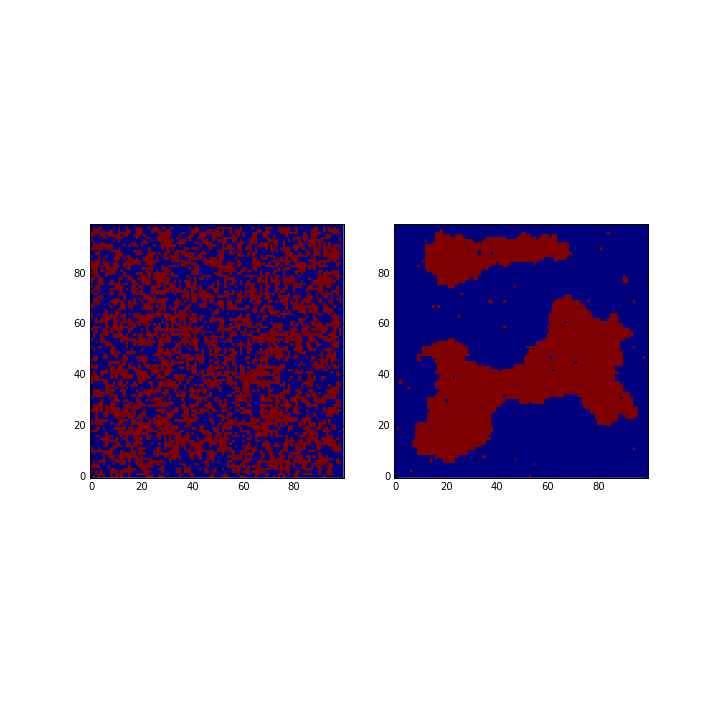
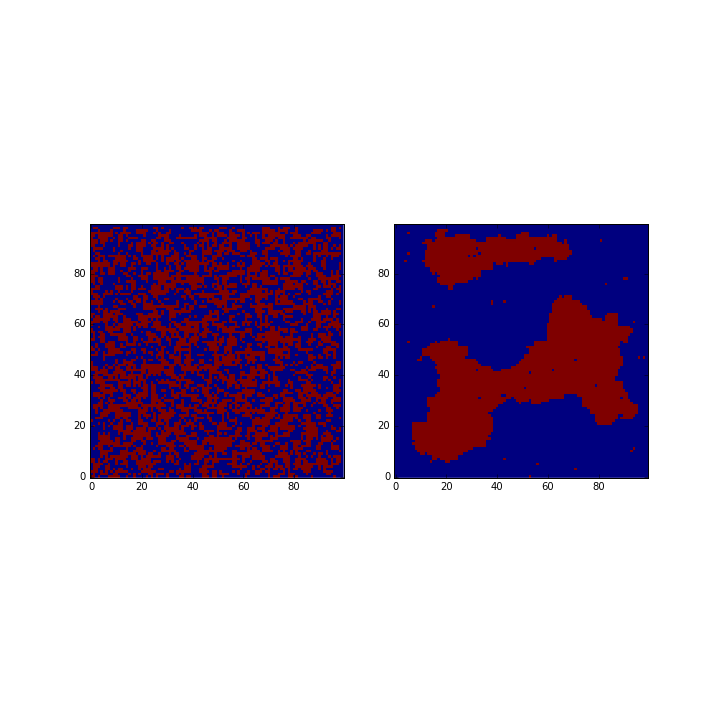
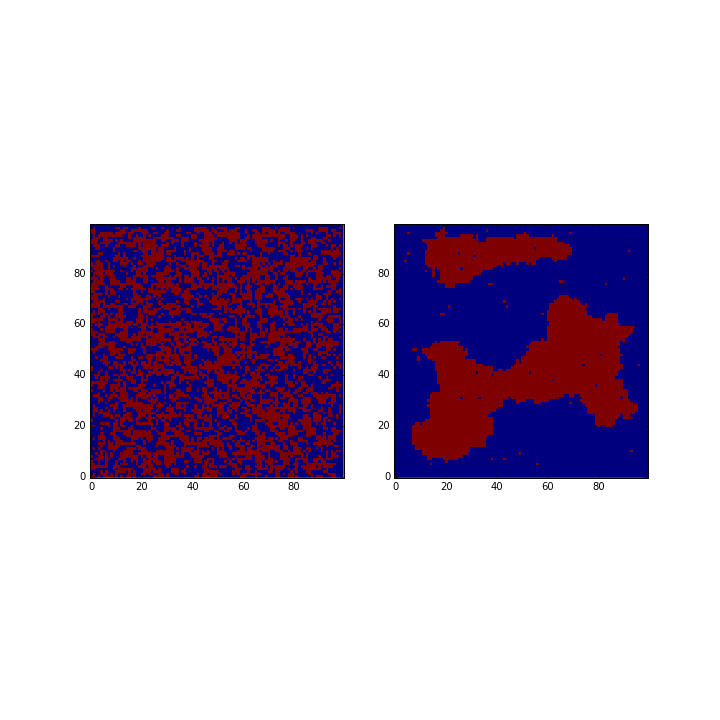
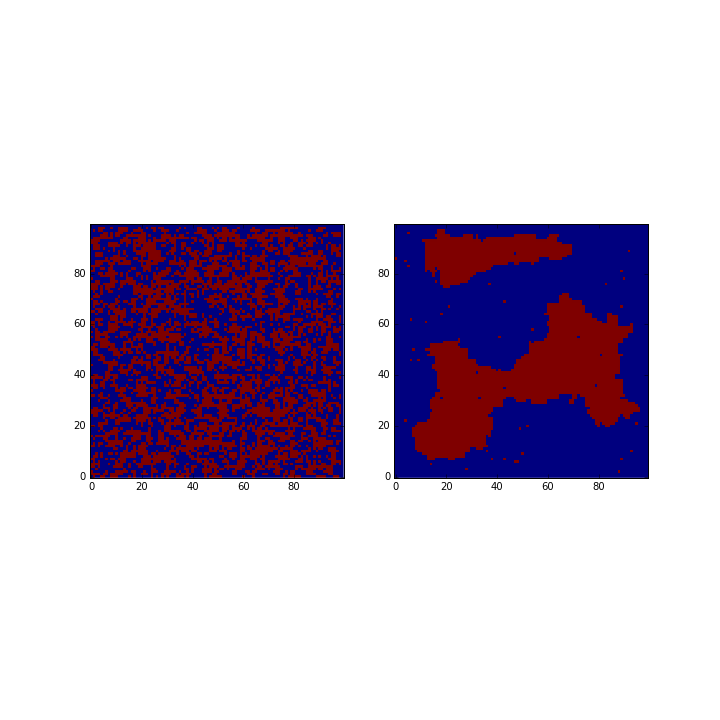
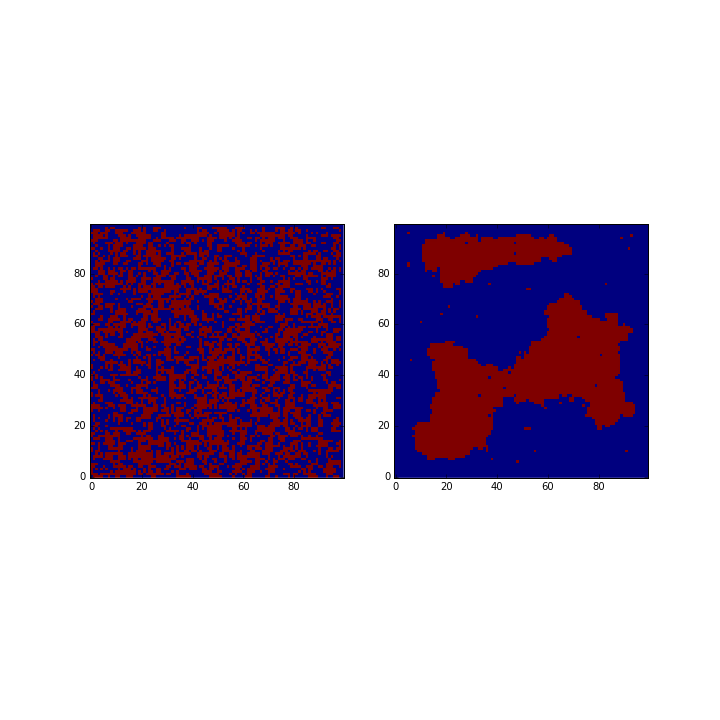
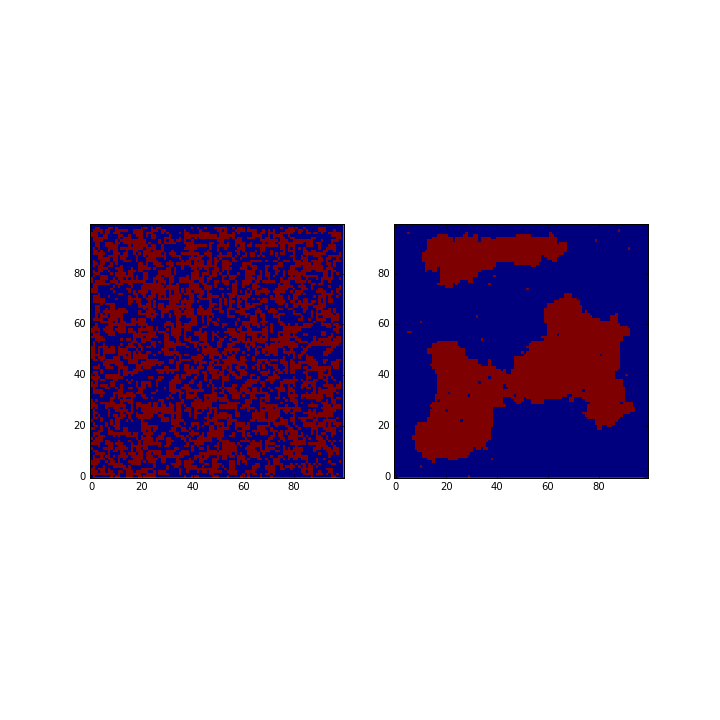
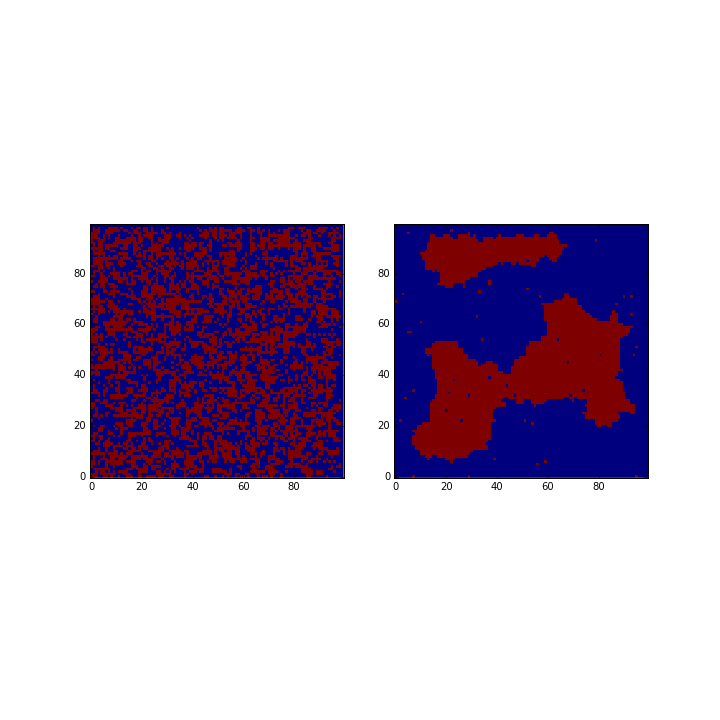
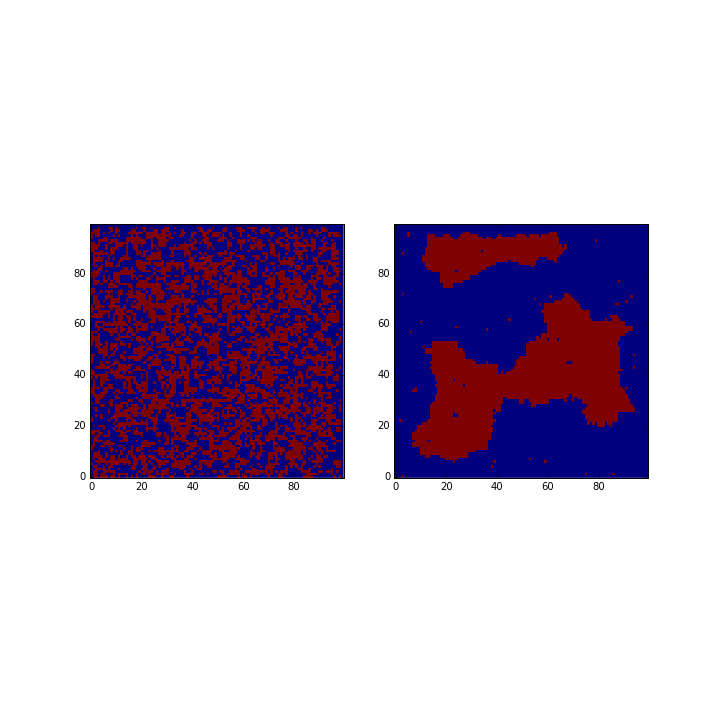
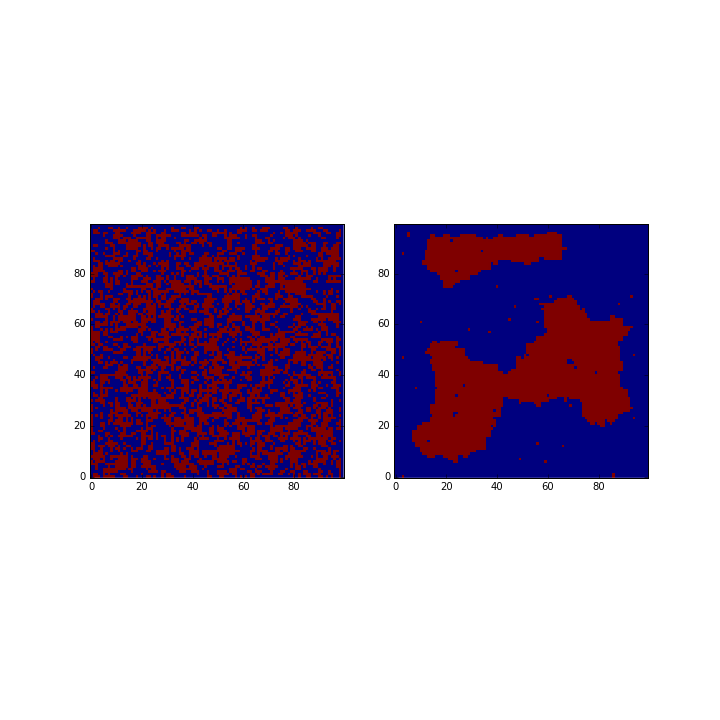
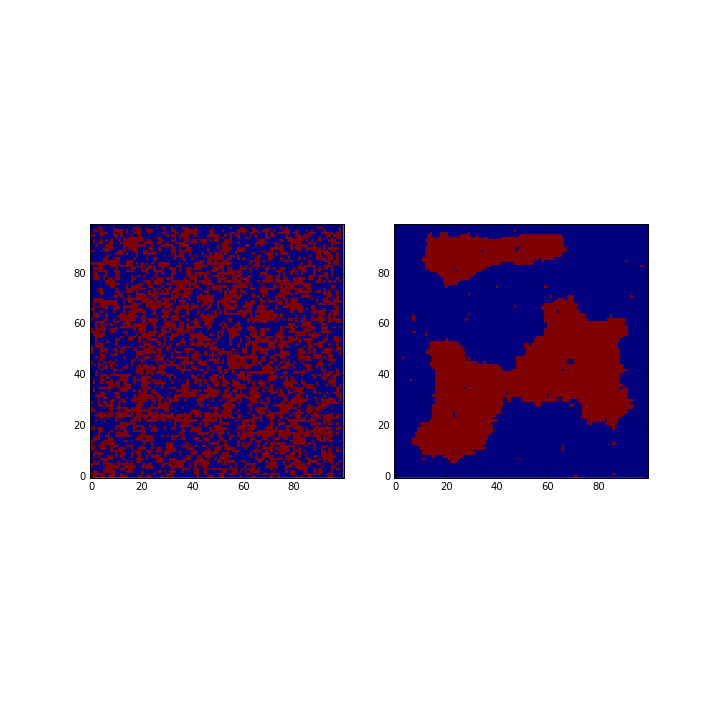
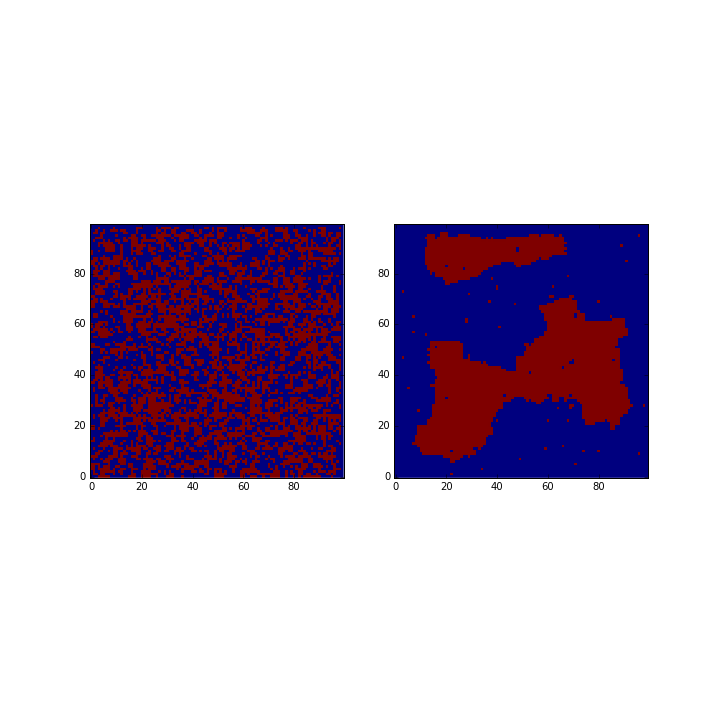
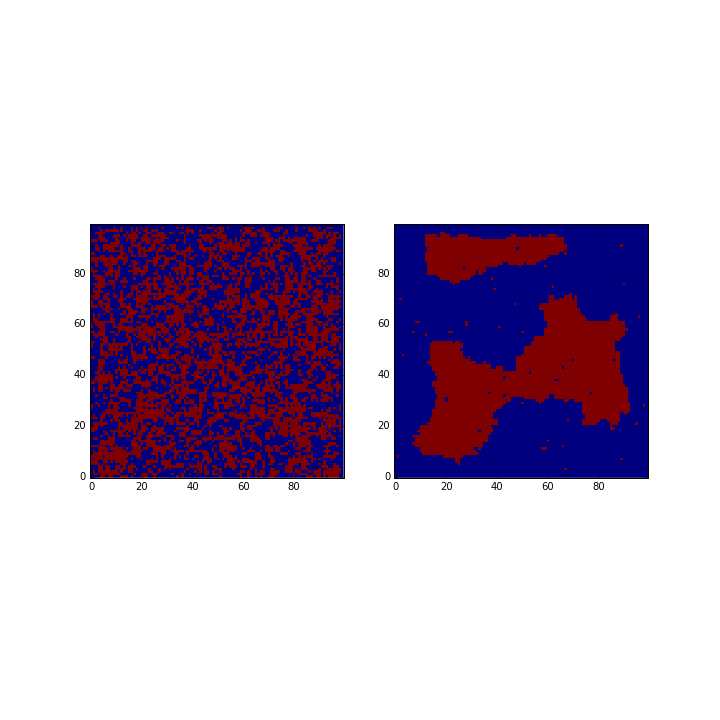
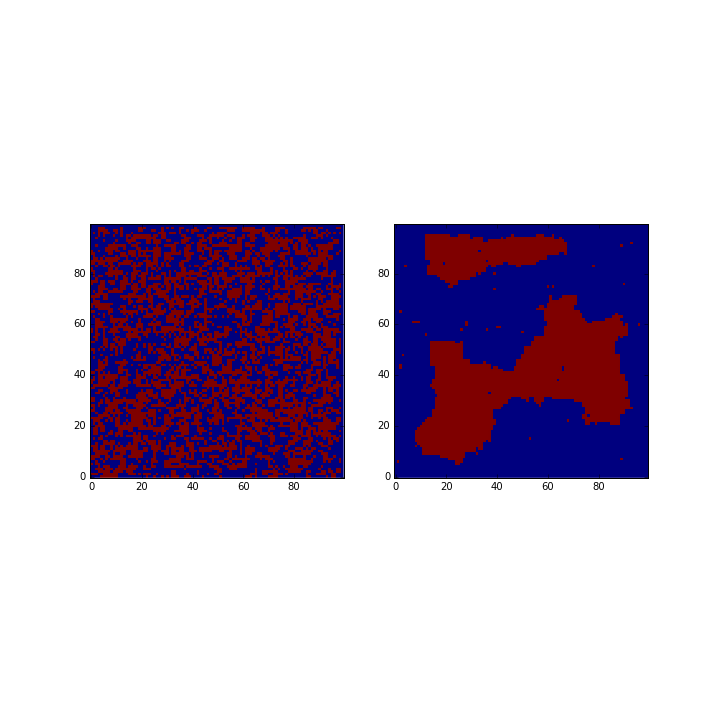
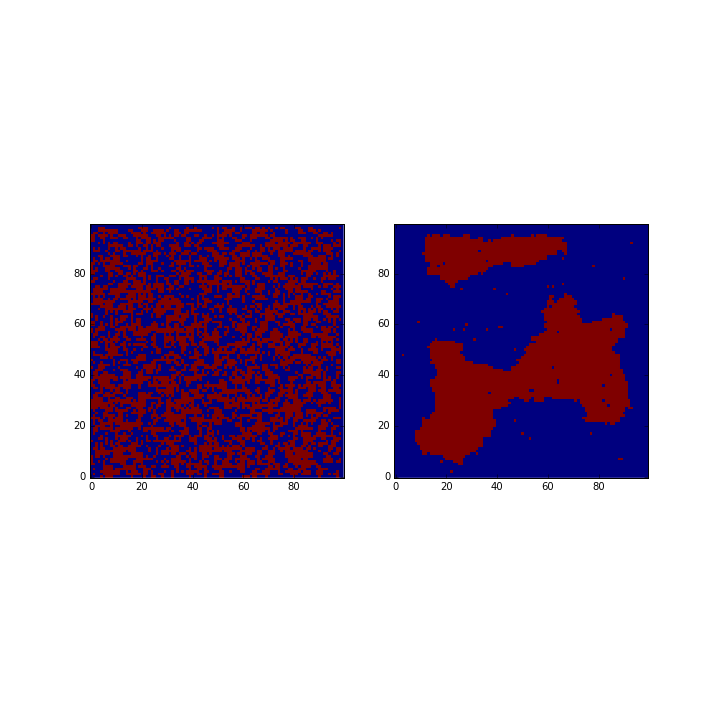
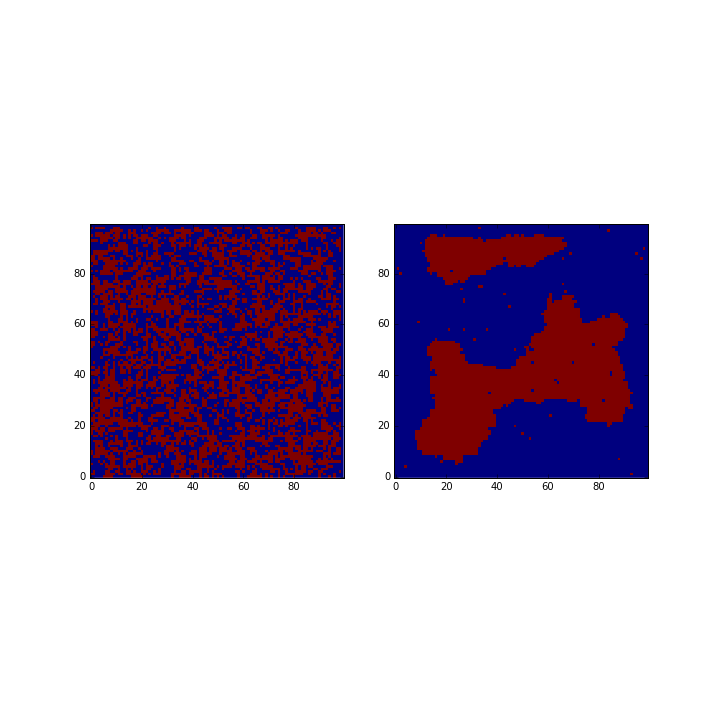
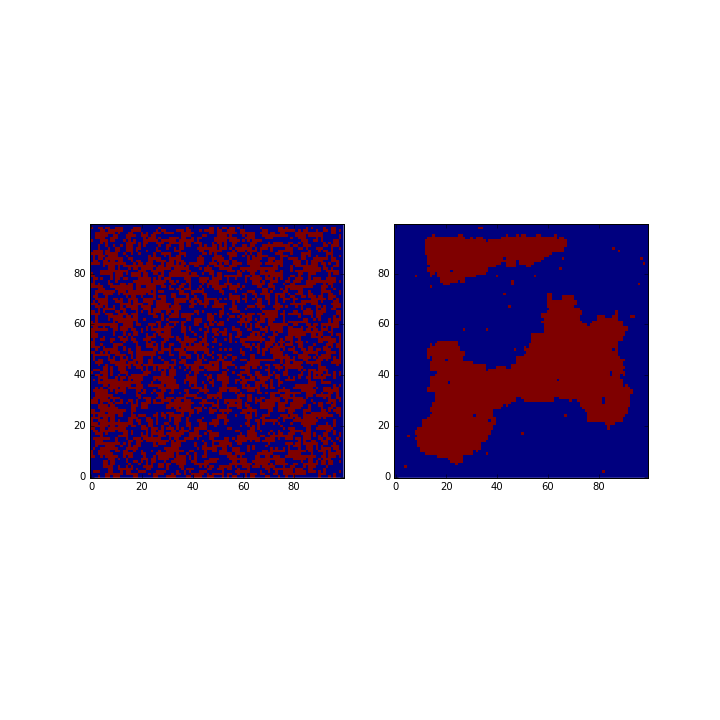
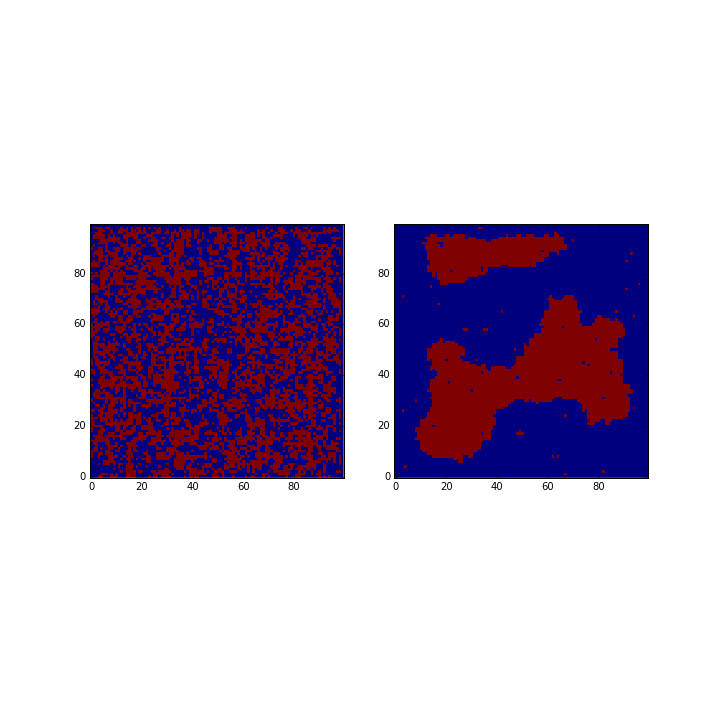
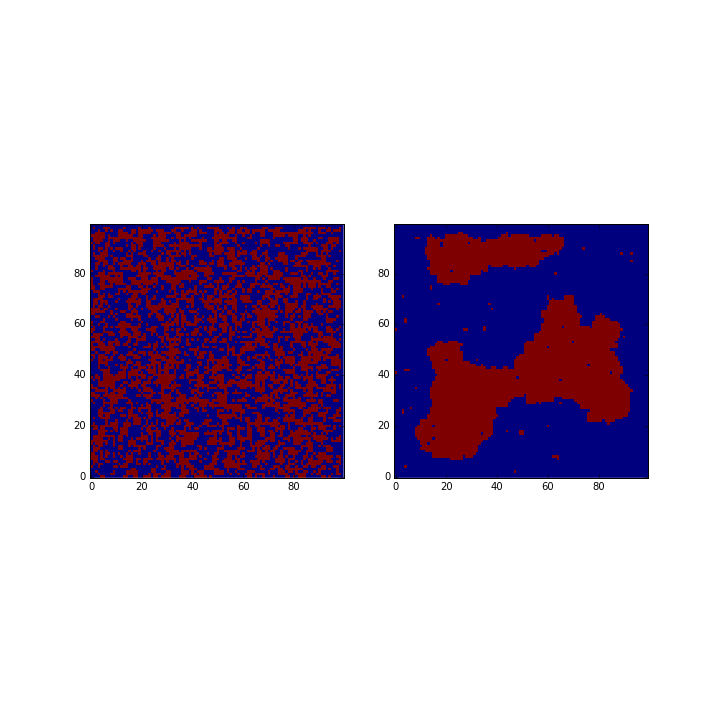
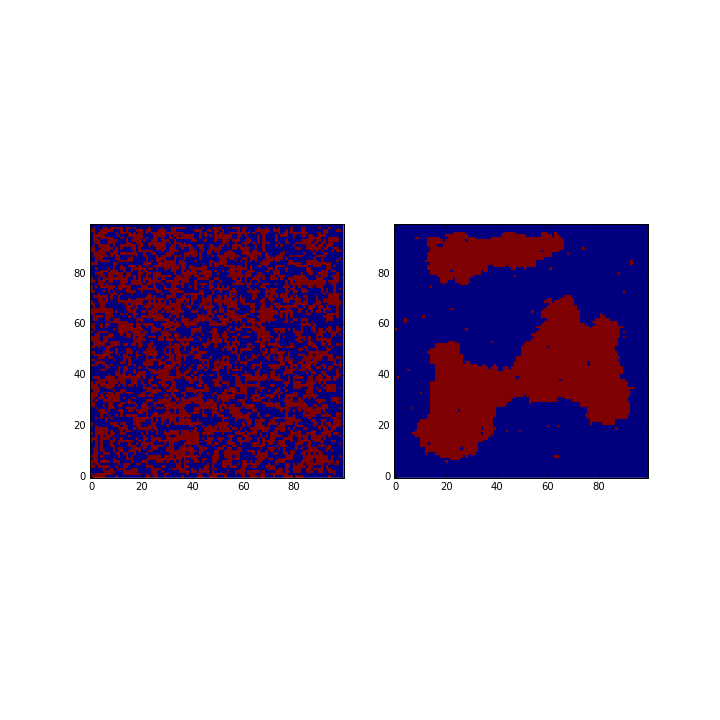
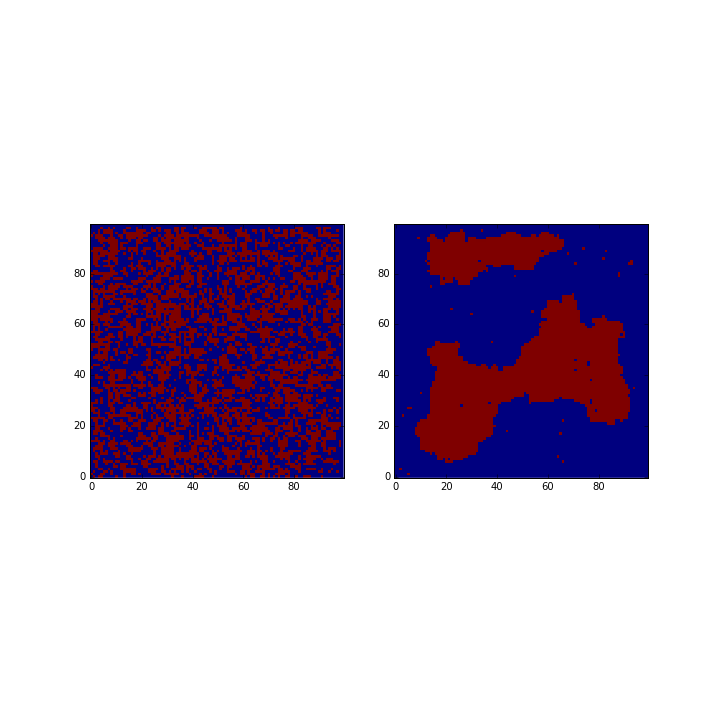
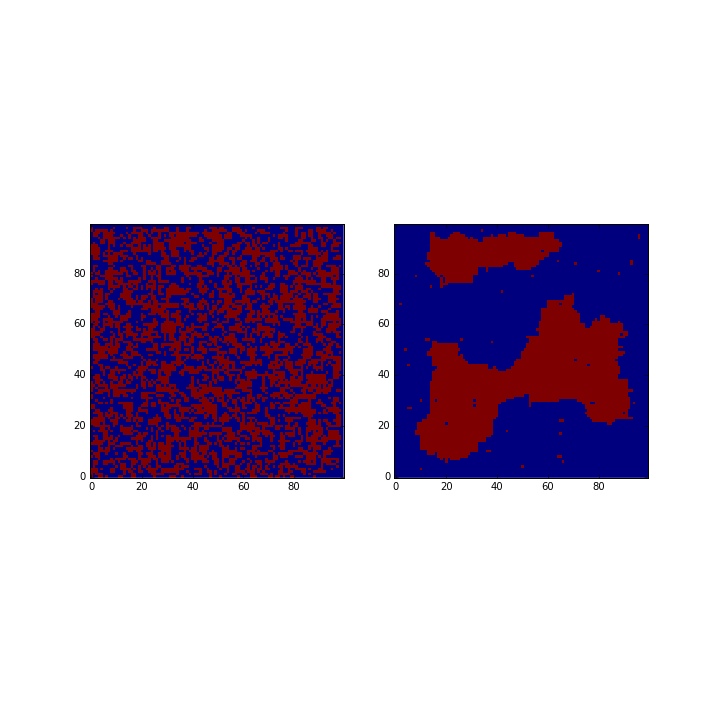
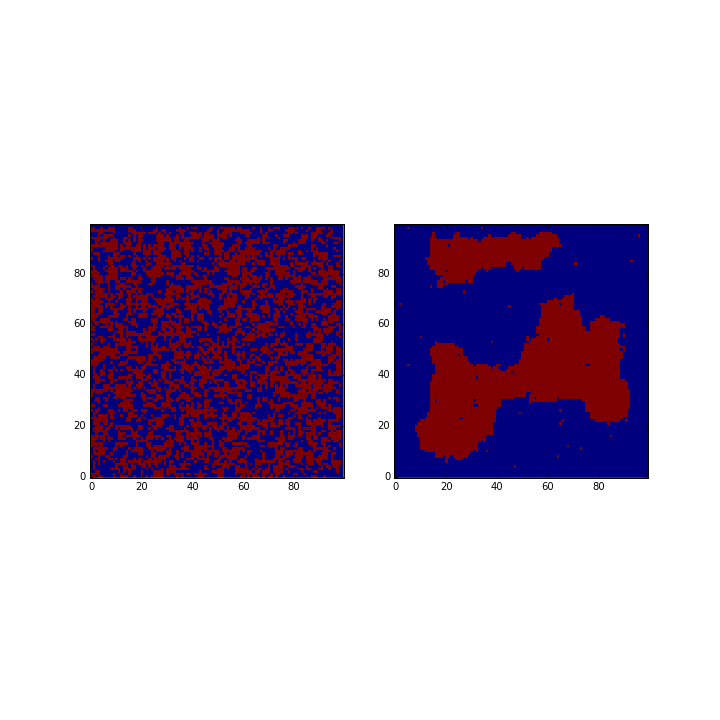
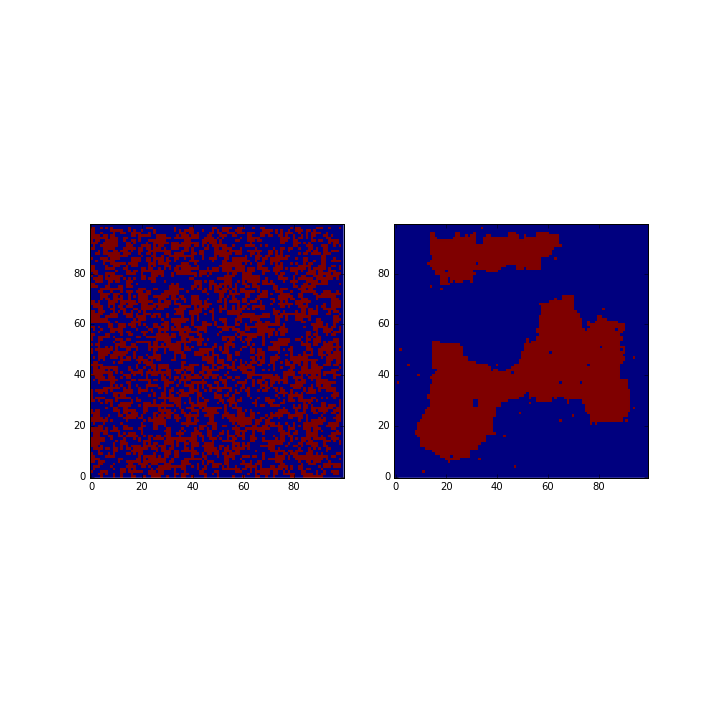
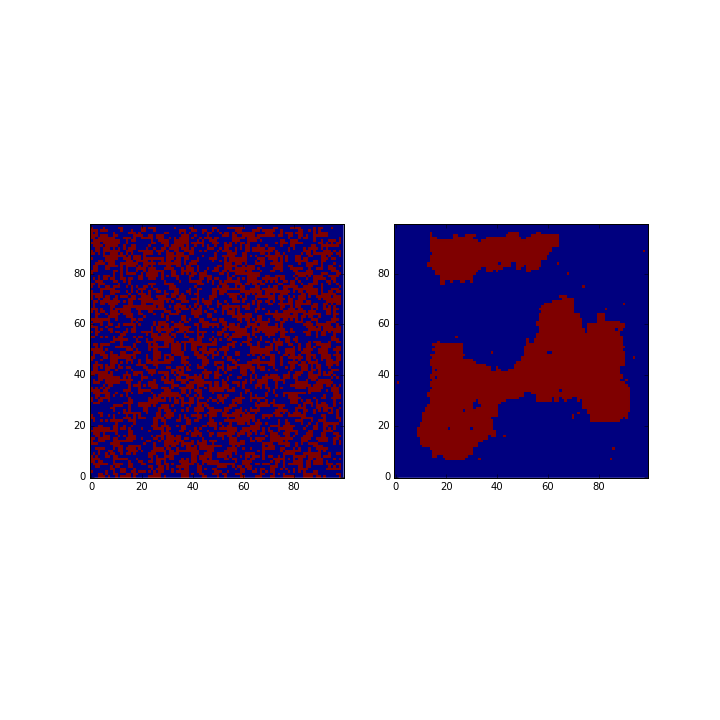
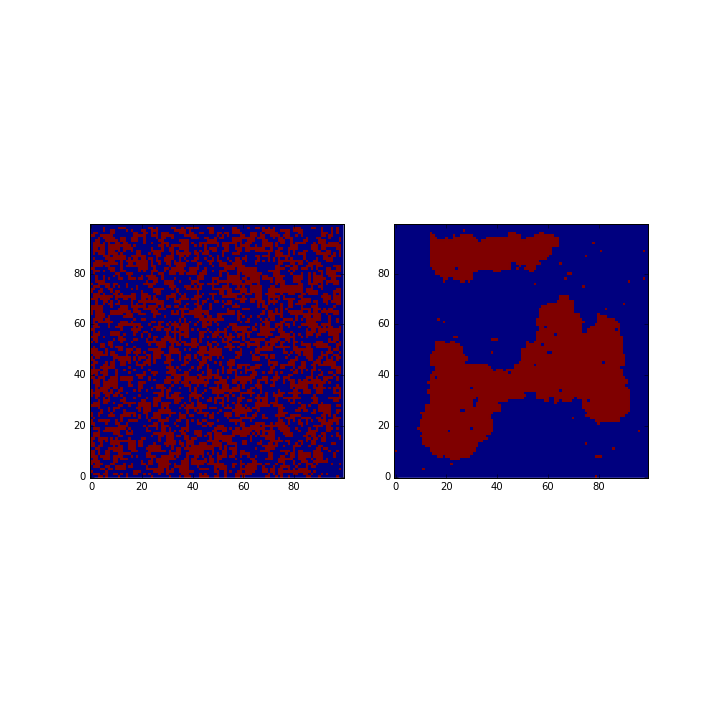
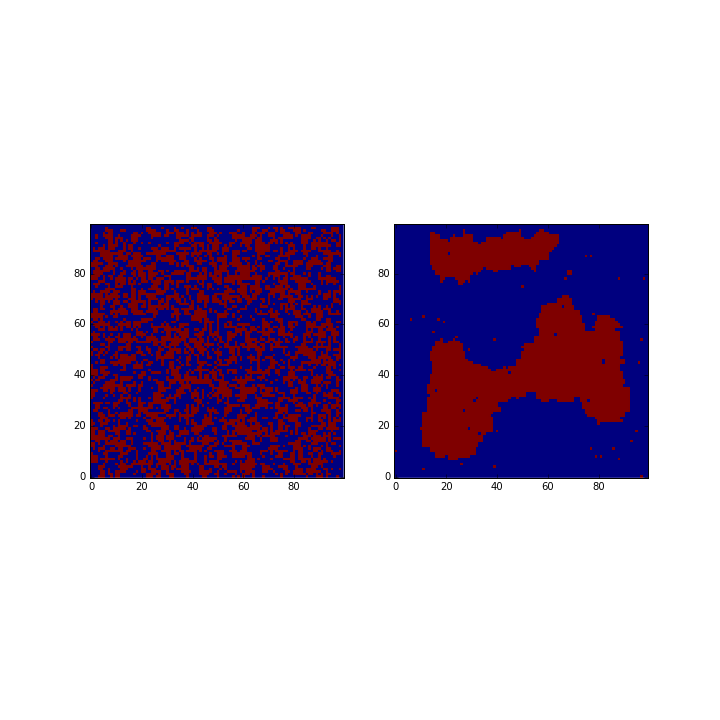
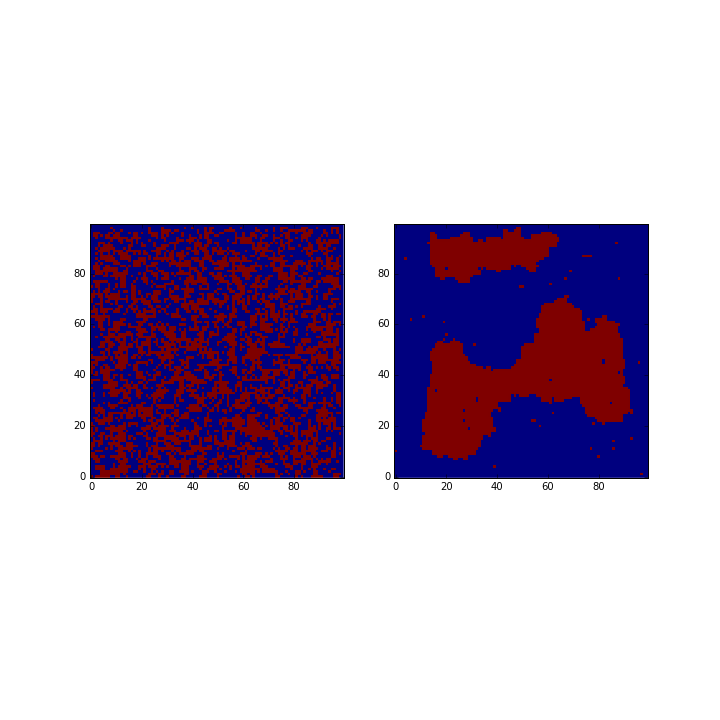
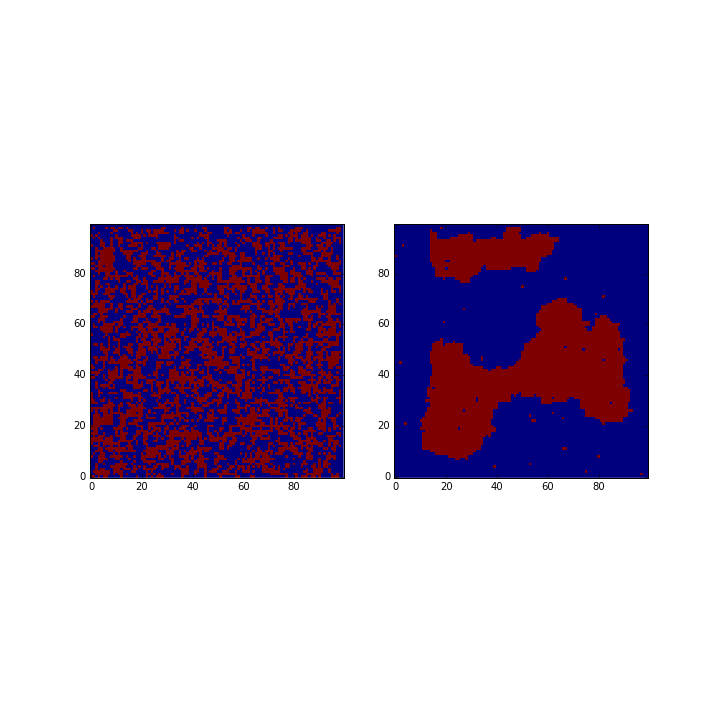
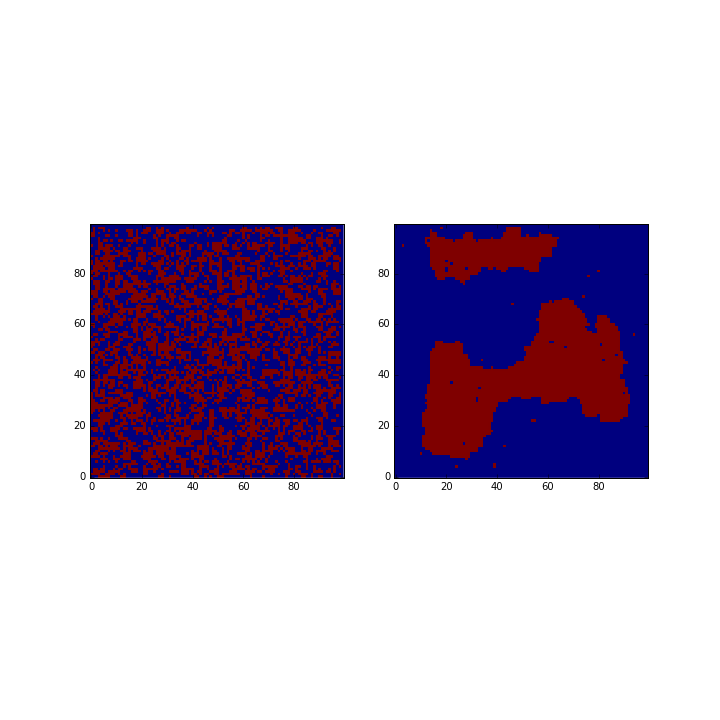
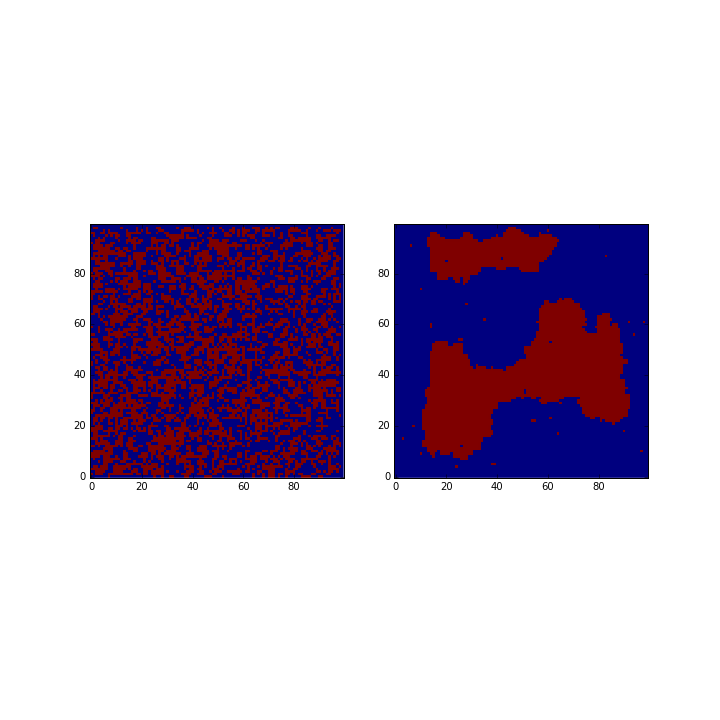
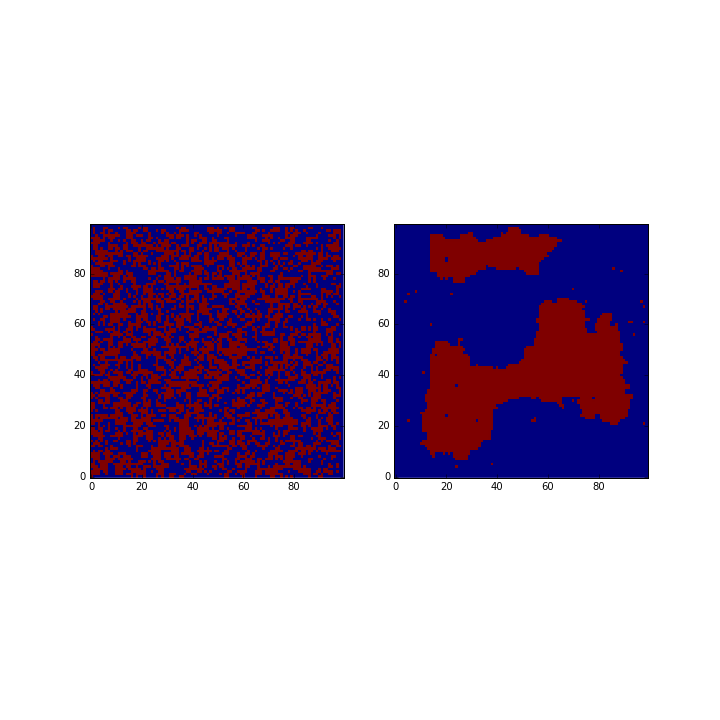
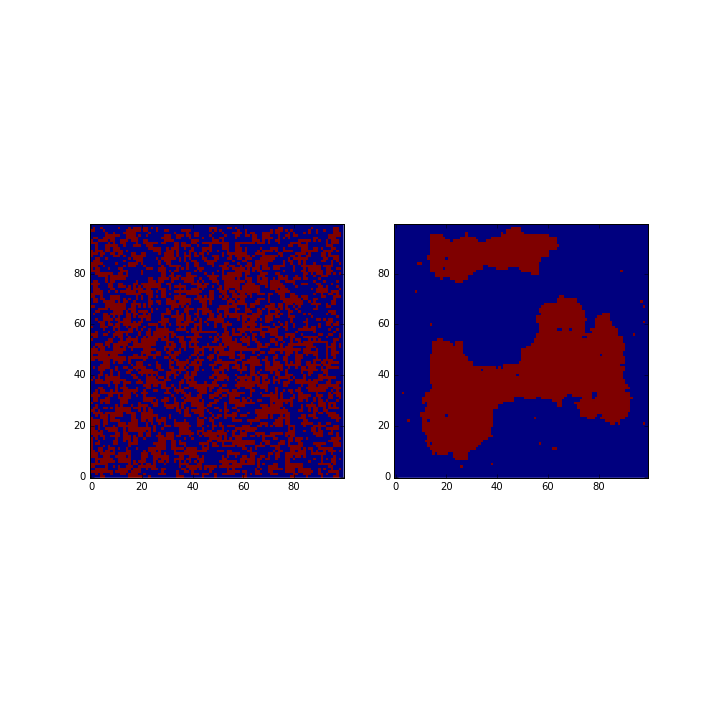

In [46]:
fig = pyplot.figure(figsize=(10,10))
pyplot.subplot(1, 2, 1)
img1 = pyplot.imshow(states_0_2[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

pyplot.subplot(1, 2, 2)
img2 = pyplot.imshow(states_0_7[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

# Animate
def animate(i):
    img1.set_array(states_0_2[i])
    img2.set_array(states_0_7[i])

animation.FuncAnimation(fig, animate, frames=NMC, interval=200)

En injectant différentes valeurs pour $\alpha$, nous constatons que les systèmes évoluent différement du système initial donné dans la leçon (où tous les spins étaient up).